In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import pickle

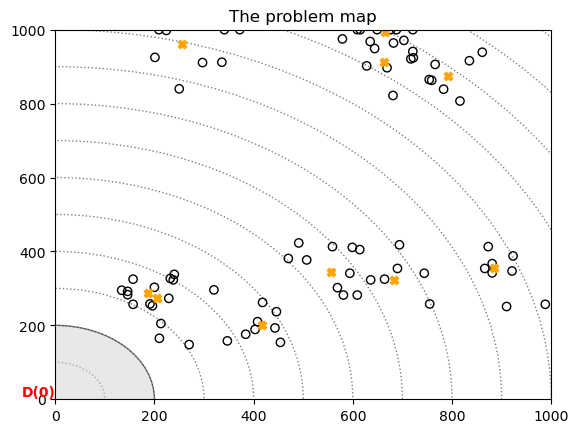

In [39]:
%run Model.ipynb

In [36]:
problems = load_problems("/Users/simonhusebo/Dokumenter/MASTERS CODE/data")

Initial Solution:           [(0, 0), (0, 0), (0, 0), (0, 0), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1)]


AttributeError: 'int' object has no attribute 'items'

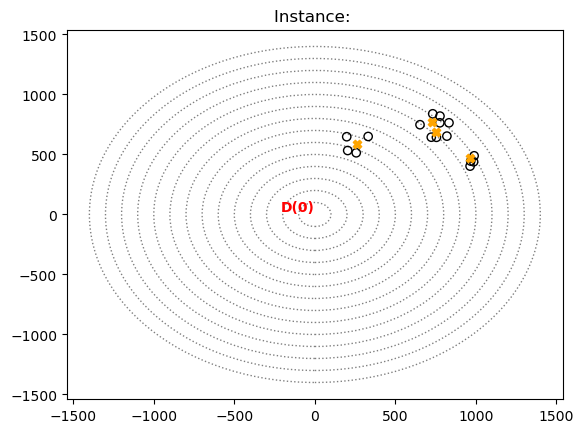

In [41]:
instance = 0
problem = problems[instance]
n_trips = problem['N_trips']
initial = initial_solution(problem,n_trips)
operators = [random_remove_greedy_insert,largest_trip_remove_greedy_insert,similarity_removal_greedy_insert,worst_removal_greedy_insert,smallest_trip_removal_greedy_insert,random_remove_kregret_insert,largest_trip_remove_kregret_insert,similarity_removal_kregret_insert,worst_removal_kregret_insert,smallest_trip_removal_kregret_insert,clustering_removal_kncs_greedy_insert,clustering_removal_krd_greedy_insert,clustering_removal_kncs_kregret_insert,clustering_removal_krd_kregret_insert]
weights = [1/4,1/4,1/4,1/16,1/16]
show_the_map(problem, title = instance+1)


In [337]:
#sol,cost,n_feasible,cost_movement = simple_sim_annealing(inital,problem,operators,probabilities)

In [338]:
best_solution,processed_best,best_cost,best_costs,costs,all_weights,all_scores,all_used,final_improvement,unique,accept_list, deltas = ALNS(initial,problem,operators,15000)

Starting ALNS
Initial solution: ([(0, 0), (0, 0), (0, 0), (0, 0), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1)], [], [])
Initial cost: 167500
Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Escape at 3752
Iteration 4000
Iteration 5000
Iteration 6000
Escape at 6904
Iteration 7000
Iteration 8000
Escape at 8405
Iteration 9000
Escape at 9906
Iteration 10000
Iteration 11000
Escape at 11407
Iteration 12000
Escape at 12908
Iteration 13000
Iteration 14000
Escape at 14409
Best cost: 66371.71


In [339]:
processed_best

([(11, 0),
  (11, 1),
  (10, 0),
  (10, 1),
  (9, 0),
  (9, 1),
  (12, 0),
  (12, 1),
  (15, 0),
  (15, 1),
  (14, 0),
  (14, 1),
  (0, 0),
  (5, 0),
  (18, 0),
  (18, 1),
  (20, 1),
  (4, 0),
  (0, 0),
  (13, 0),
  (13, 1),
  (16, 0),
  (16, 1),
  (17, 0),
  (17, 1),
  (19, 0),
  (19, 1),
  (7, 0),
  (7, 1),
  (6, 0),
  (6, 1),
  (0, 0),
  (20, 0),
  (5, 1),
  (8, 0),
  (8, 1),
  (1, 0),
  (0, 0)],
 [3, 1, 3, 1],
 [[], [(4, 320.88999999999953)], [], [(1, 416.9000000000002)]])

In [340]:
feasible_trips(processed_best,problem)

(True,
 [(13, 0),
  (13, 1),
  (16, 0),
  (16, 1),
  (17, 0),
  (17, 1),
  (19, 0),
  (19, 1),
  (7, 0),
  (7, 1),
  (6, 0),
  (6, 1),
  (20, 0),
  (11, 0),
  (11, 1),
  (10, 0),
  (10, 1),
  (9, 0),
  (9, 1),
  (12, 0),
  (12, 1),
  (15, 0),
  (15, 1),
  (14, 0),
  (14, 1),
  (5, 0),
  (5, 1),
  (8, 0),
  (8, 1),
  (1, 0),
  (18, 0),
  (18, 1),
  (20, 1),
  (4, 0)])

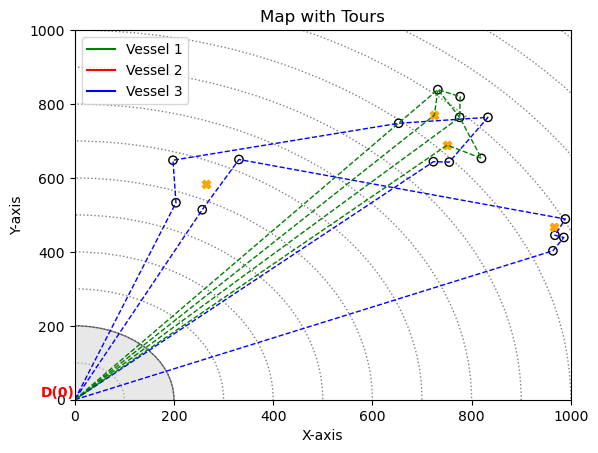

In [341]:
# Create the base map
ax = show_the_map(problem)

# Plot all trips on the map
ax = plot_all_trips(ax, processed_best, problem)

# Display the combined plot
plt.show()

[0, 5, 18, 18, 20, 4, 0]


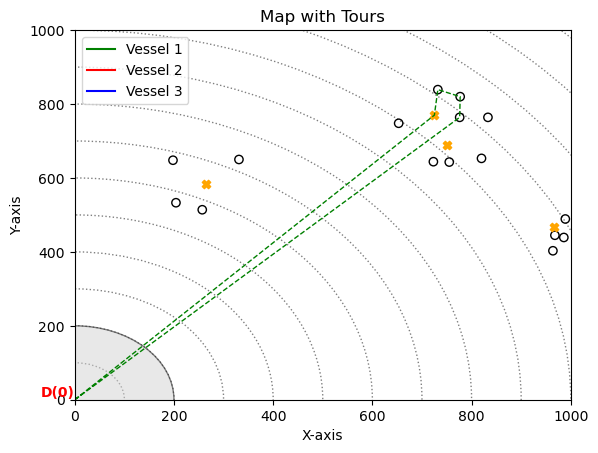

In [342]:
bx = show_the_map(problem)

bx = plot_some_trips(bx, processed_best, problem,1)

plt.show()

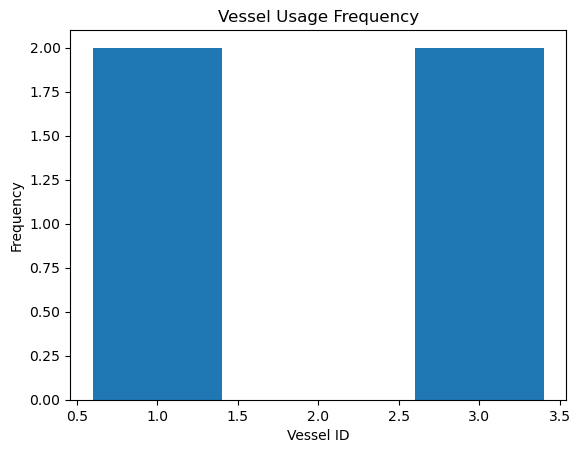

In [343]:
show_vessel_distribution(processed_best)

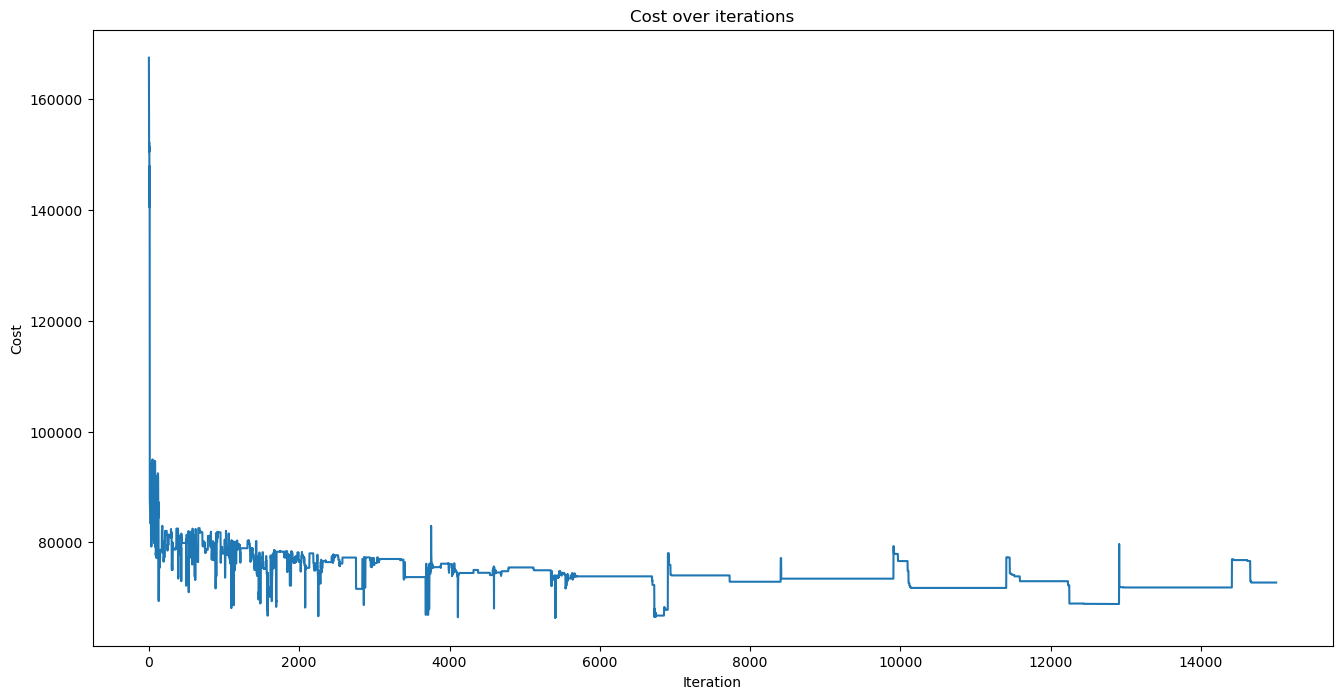

<Axes: title={'center': 'Cost over iterations'}, xlabel='Iteration', ylabel='Cost'>

In [344]:
plot_costs(costs)

In [345]:
plot_costs(best_costs)

<Axes: title={'center': 'Cost over iterations'}, xlabel='Iteration', ylabel='Cost'>

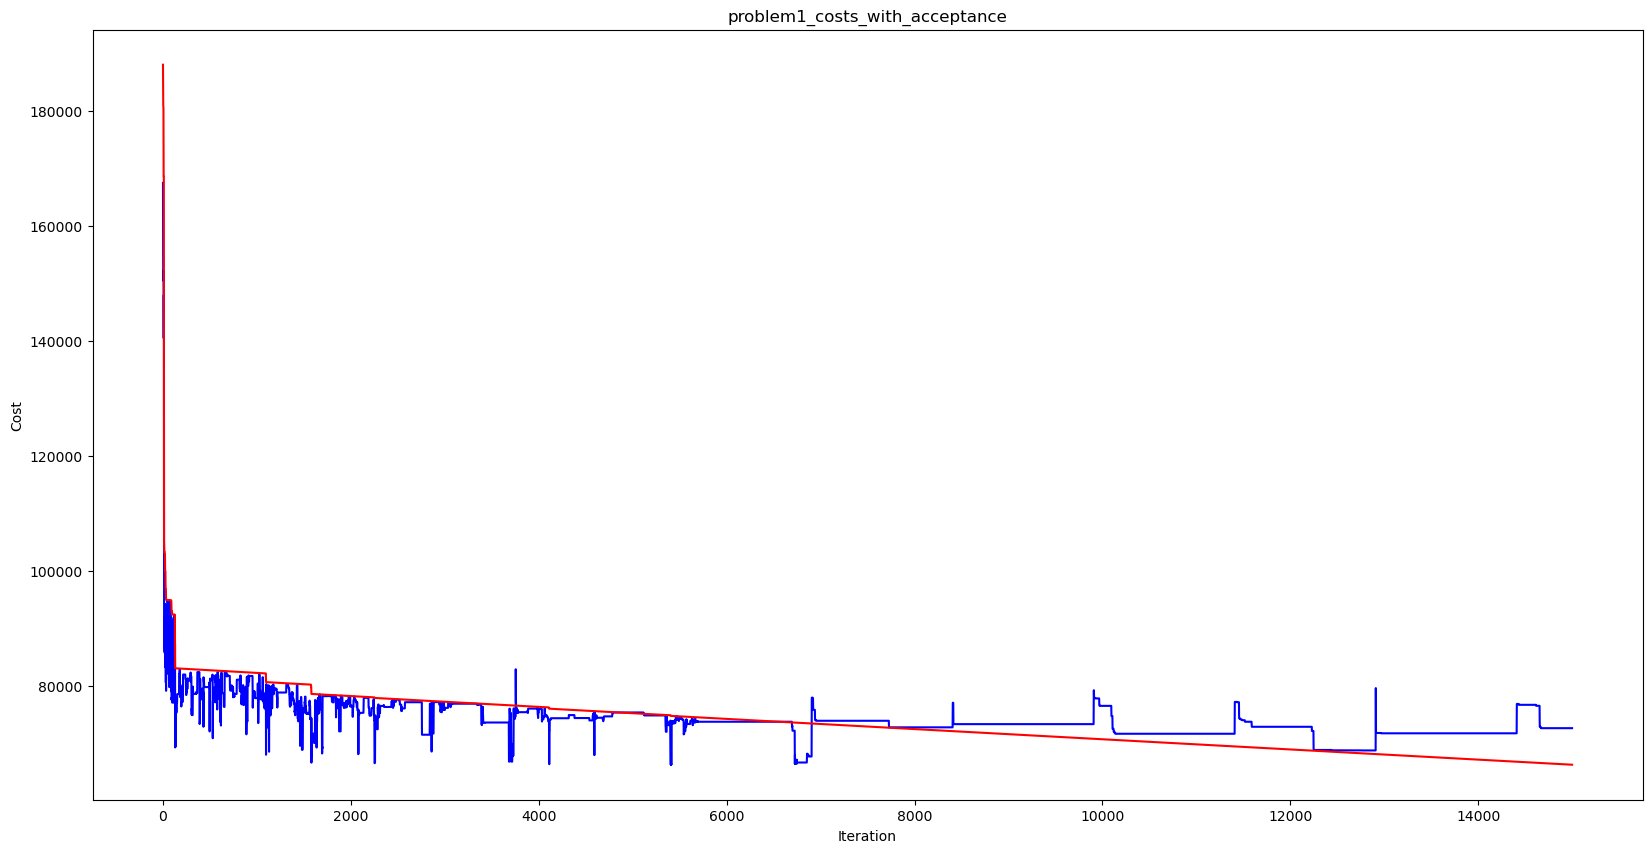

<Axes: title={'center': 'problem1_costs_with_acceptance'}, xlabel='Iteration', ylabel='Cost'>

In [346]:
multiple_plots(costs,accept_list,title='problem1_costs_with_acceptance')

In [347]:
test = accept_list

print(len(accept_list))

coefficients = np.polyfit(range(len(test)), test,2)
line = np.poly1d(coefficients)
plt.plot(range(len(test)), line(test), 'r-')
# Create the equation string
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
print(equation)

15000
y = 0.00x + -1.89


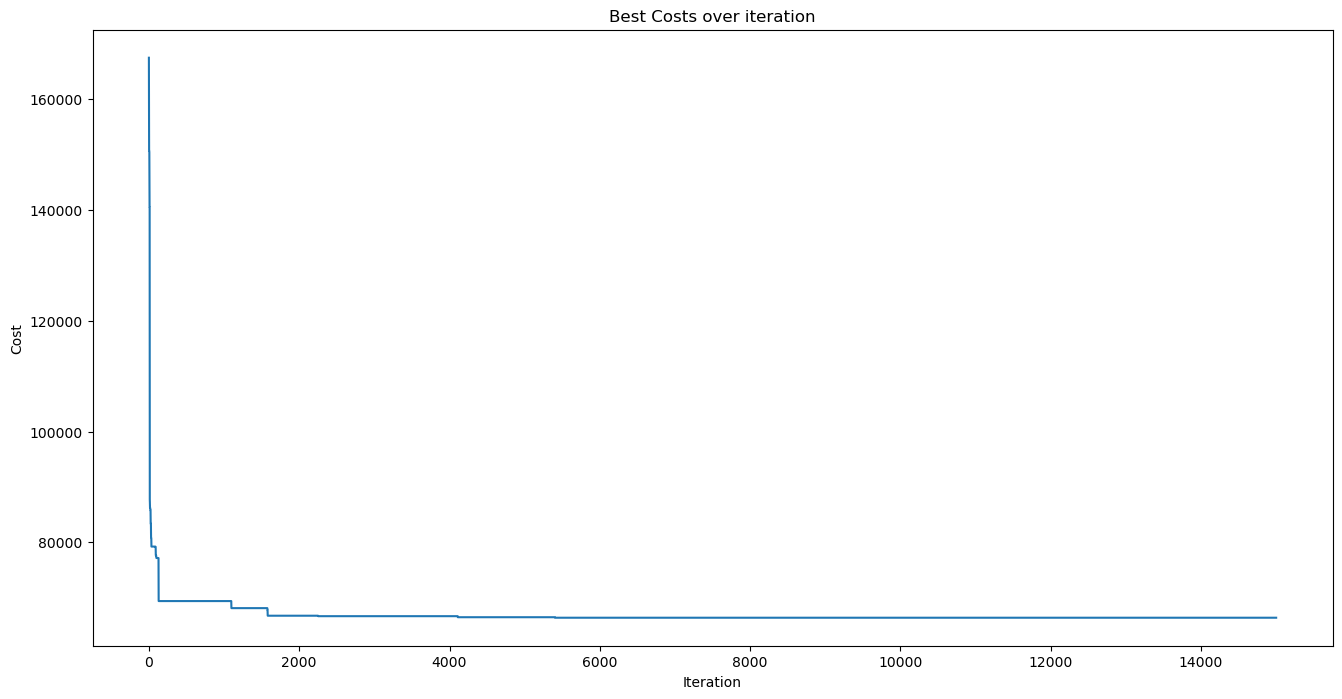

<Axes: title={'center': 'Best Costs over iteration'}, xlabel='Iteration', ylabel='Cost'>

In [348]:
plot_costs(best_costs,title='Best Costs over iteration')

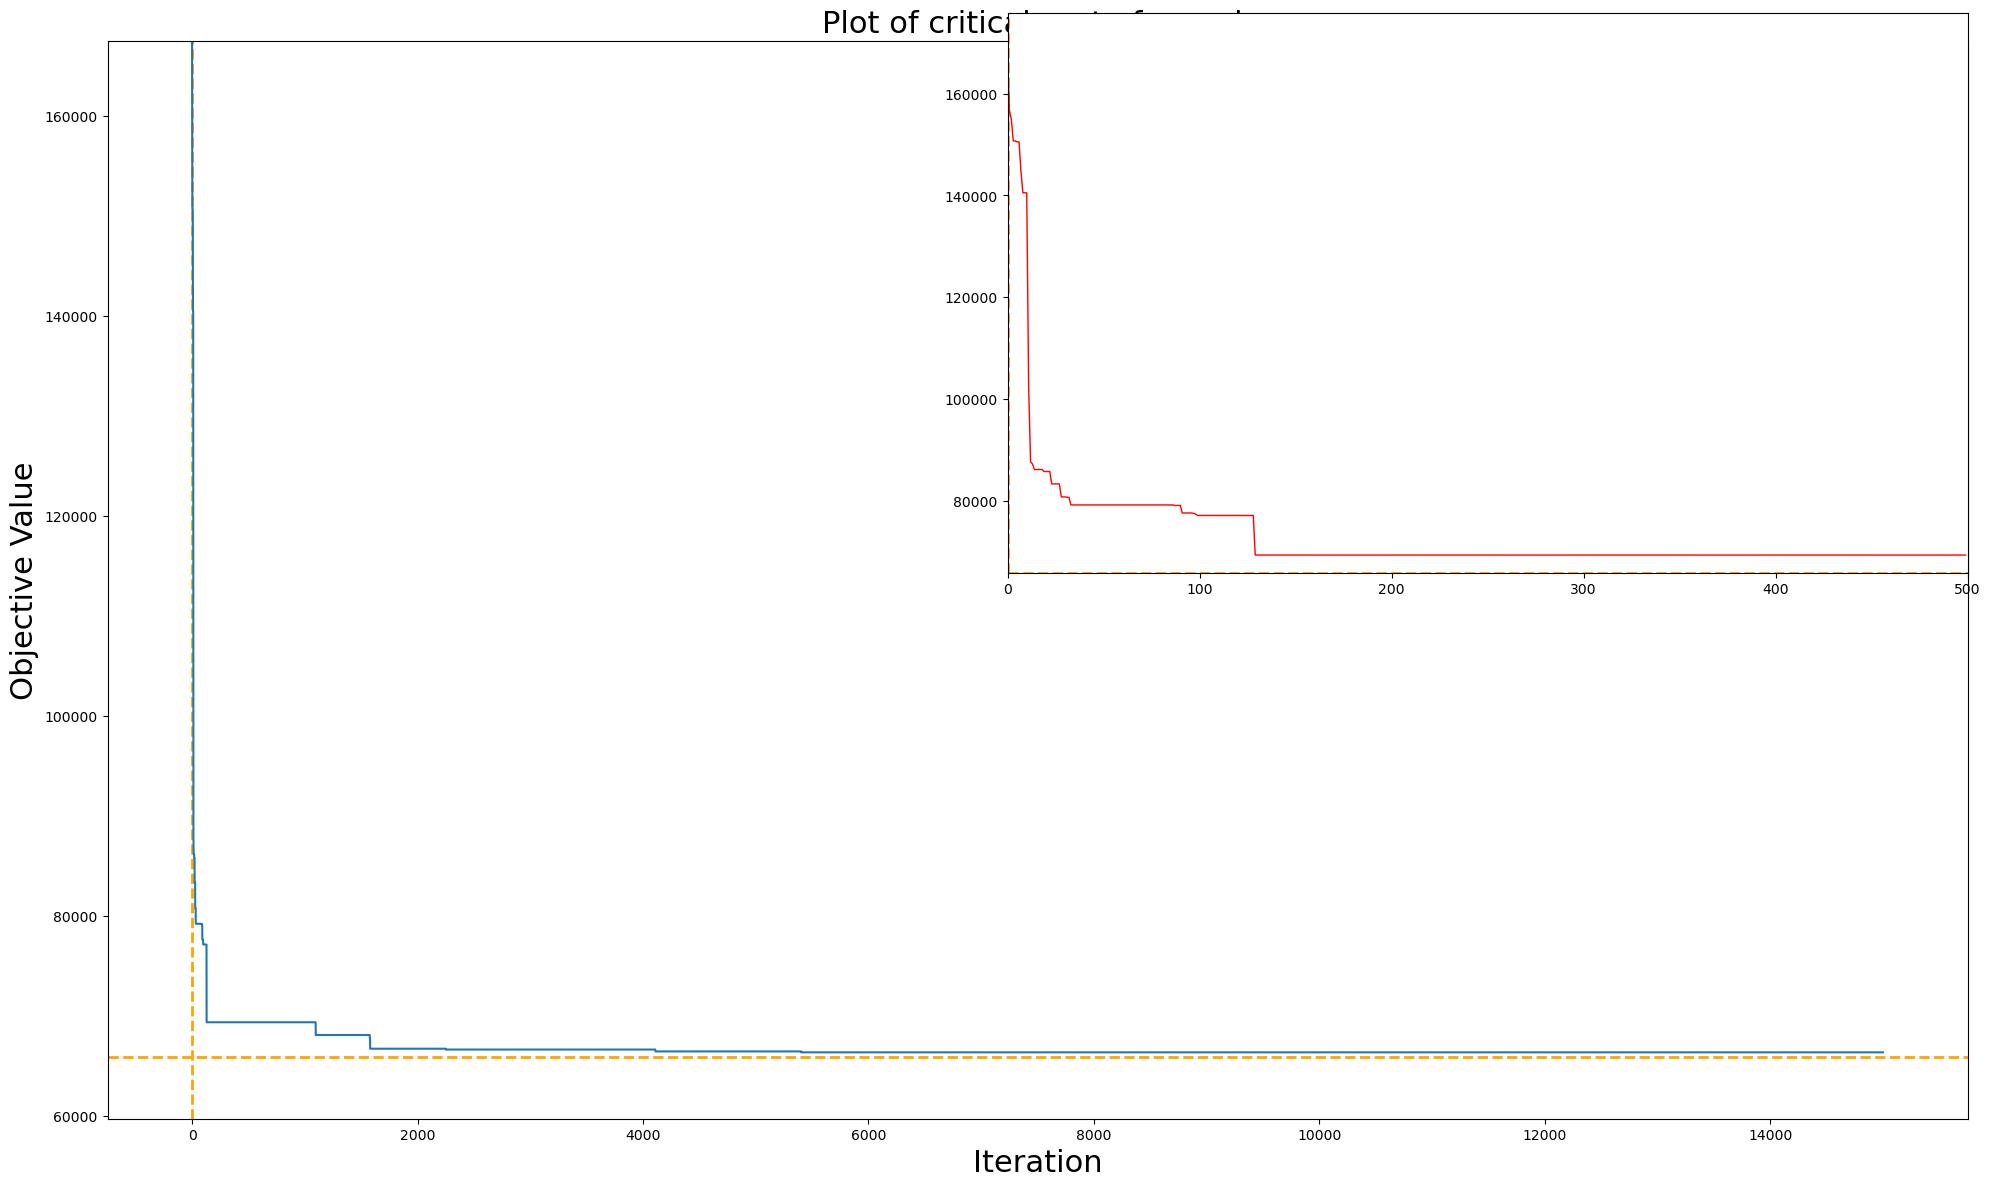

In [349]:
zoomed_plot_(best_costs,0,500)

In [354]:
print([x.__name__ for x in operators])

['random_remove_greedy_insert', 'largest_trip_remove_greedy_insert', 'similarity_removal_greedy_insert', 'worst_removal_greedy_insert', 'smallest_trip_removal_greedy_insert', 'random_remove_kregret_insert', 'largest_trip_remove_kregret_insert', 'similarity_removal_kregret_insert', 'worst_removal_kregret_insert', 'smallest_trip_removal_kregret_insert', 'clustering_removal_kncs_greedy_insert', 'clustering_removal_krd_greedy_insert', 'clustering_removal_kncs_kregret_insert', 'clustering_removal_krd_kregret_insert']


In [370]:
operators_scatter(deltas,operators,highlight=[9])

['smallest_trip_removal_kregret_insert']


In [226]:
all_weights[-1]

[0.1955884549149326,
 0.1982474618017591,
 0.1714520649838934,
 0.19827254842474823,
 0.1967826634237395,
 0.17360816614855698,
 0.18700095026681854,
 0.10853256441962253,
 0.19826442631648167,
 0.19113958818833643,
 5.2367352733921624e-23,
 2.3475456551785917e-26,
 2.0186125345513562e-29,
 6.572698617095717e-30]

In [227]:
s = 0
for w in all_weights[-1]:
    w = w/sum(all_weights[-1])
    s += w
print(s)

1.0


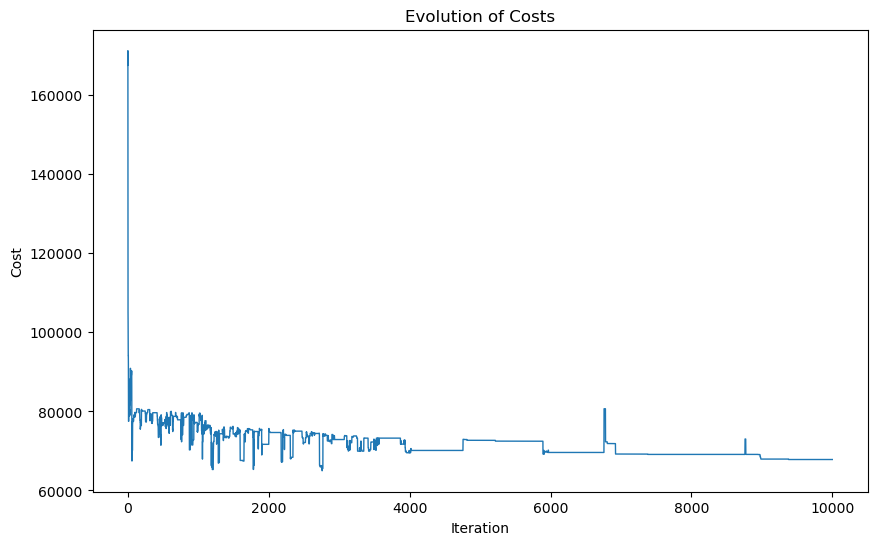

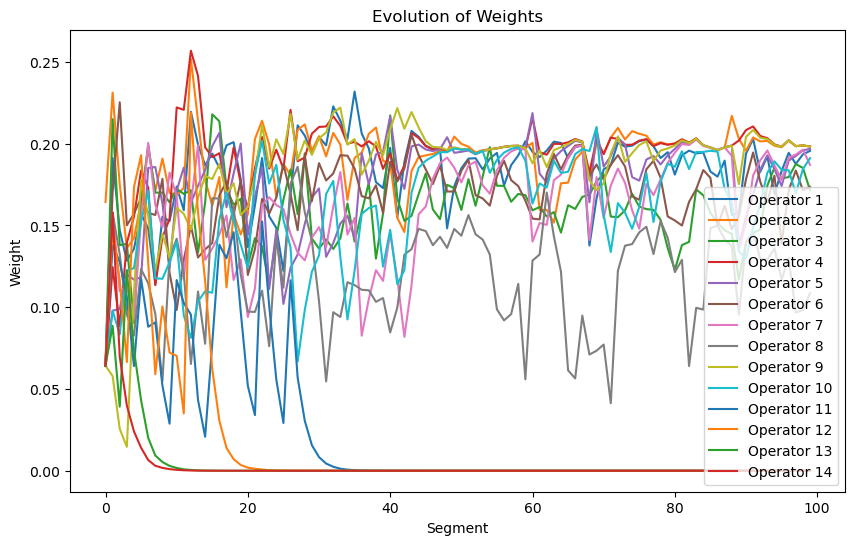

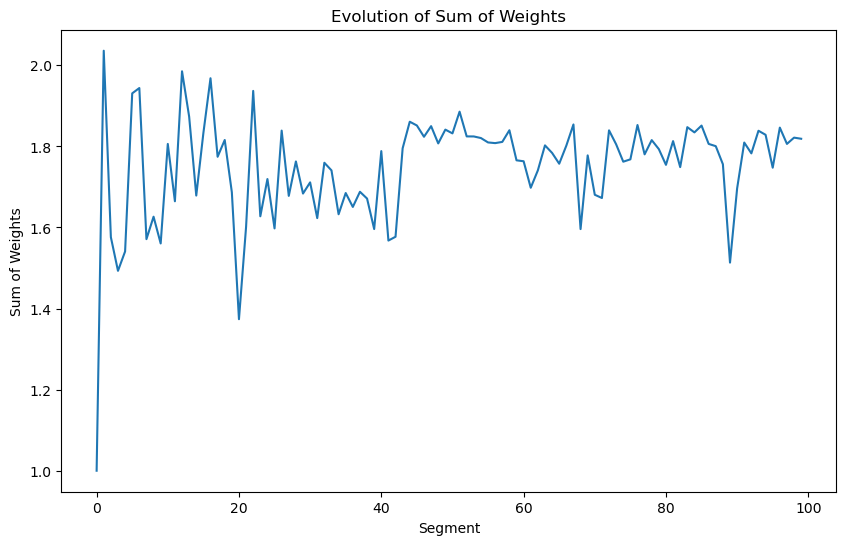

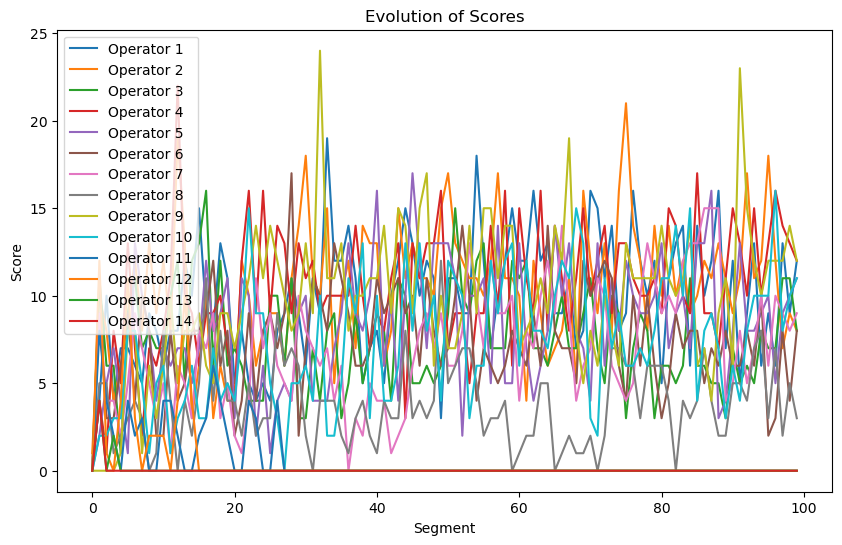

In [228]:
plot_output_lists(costs,all_weights,all_scores)

In [22]:
def multiple_ALNS_runs(problem,operators,n_runs):
    best_solution = 0
    best_cost = float('inf')
    best_run = []
    best_run_best_costs = []
    cost_lists = []
    best_costs_lists = []
    final_improve = []
    avg_cost = []
    t0 = time.time()
    for i in range(n_runs):
        print(f'Starting run {i+1}')
        initial = initial_solution(problem,problem['N_trips'])
        _,processed_best,cost,new_best,costs,_,_,_,final_improvement,_,_, _ = ALNS(initial,problem,operators,6000)
        cost_lists.append(costs)
        best_costs_lists.append(new_best)
        final_improve.append(final_improvement)
        avg_cost.append(cost)
        if cost<best_cost:
            best_solution = processed_best
            best_cost = cost
            best_run = costs
            best_run_best_costs = new_best
            
        
    t1 = time.time()-t0
    print(f'Finished {n_runs} runs in {t1:.2f} seconds')
    avg_cost = sum(avg_cost)/n_runs
    final_improve = sum(final_improve)/n_runs
    cost_lists = [sum(values) / len(values) for values in zip(*cost_lists)]
    best_costs_lists = [sum(values) / len(values) for values in zip(*best_costs_lists)]
    
    time_per_run = t1/n_runs
    
    
    return best_solution,avg_cost,best_cost,best_run,best_run_best_costs,best_costs_lists,cost_lists,final_improve,time_per_run

In [23]:
def RunAll(problems,operators,n_runs):
    results = {}
    for i in range(len(problems)):
        problem = problems[i]
        print(f'Starting problem {i+1}')
        best_solution,avg_cost,best_cost,best_run,best_run_best_costs,best_costs_lists,cost_lists,final_improve,time_per_run = multiple_ALNS_runs(problem,operators,n_runs)
        results[i+1]=(best_solution,avg_cost,best_cost,best_run,best_run_best_costs,best_costs_lists,cost_lists,final_improve,time_per_run)
    return results

In [24]:
results = RunAll(problems,operators,1)

Starting problem 1
Starting run 1
Initial Solution:           [(0, 0), (0, 0), (0, 0), (0, 0), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1)]
Starting ALNS
Initial solution: ([(0, 0), (0, 0), (0, 0), (0, 0), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1)], [], [])
Initial cost: 167500
Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Escape at 4819
Iteration 5000
Best cost: 67300.58
Finished 1 runs in 139.22 seconds
Starting problem 2
Starting run 1
Initial Solution:           [(0, 0), (0, 0), (0, 0), (0, 0), (5

/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Iteration 1000


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Iteration 2000
Escape at 2040


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Iteration 3000


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Escape at 3541


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Iteration 4000


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8

Iteration 5000
Escape at 5042
Best cost: 350808.92000000004
Finished 1 runs in 316.80 seconds
Starting problem 19
Starting run 1
Initial Solution:           [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1), (21, 0), (21, 1), (22, 0), (22, 1), (23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1), (29, 0), (29, 1), (30, 0), (30, 1), (31, 0), (31, 1), (32, 0), (32, 1), (33, 0), (33, 1), (34, 0), (34, 1), (35, 0), (35, 1), (36, 0), (36, 1), (37, 0), (37, 1), (38, 0), (38, 1), (39, 0), (39, 1), (40, 0), (40, 1), (41, 0), (41, 1), (42, 0), (42, 1), (43, 0), (43, 1), (44, 0), (44, 1), (45, 0), (45, 1), (46, 0), (46, 1), (47, 0), (47, 1), (48, 0), (48, 

/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (1

Iteration 1000


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Escape at 1552


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Iteration 2000
Iteration 3000
Escape at 3053


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Iteration 4000


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Escape at 4554


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Iteration 5000


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters

Best cost: 1517514.17
Finished 1 runs in 2114.51 seconds
Starting problem 28
Starting run 1
Initial Solution:           [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (21, 0), (21, 1), (22, 0), (22, 1), (23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1), (29, 0), (29, 1), (30, 0), (30, 1), (31, 0), (31, 1), (32, 0), (32, 1), (33, 0), (33, 1), (34, 0), (34, 1), (35, 0), (35, 1), (36, 0), (36, 1), (37, 0), (37, 1), (38, 0), (38,

/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (13) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_cluster

Iteration 1000


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Escape at 1895


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Iteration 2000


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Iteration 3000


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)
/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (14) found smaller than n_clusters 

Iteration 4000
Escape at 4010


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Iteration 5000


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Escape at 5511


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Best cost: 1491271.085
Finished 1 runs in 2176.09 seconds
Starting problem 29
Starting run 1
Initial Solution:           [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (21, 0), (21, 1), (22, 0), (22, 1), (23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1), (29, 0), (29, 1), (30, 0), (30, 1), (31, 0), (31, 1), (32, 0), (32, 1), (33, 0), (33, 1), (34, 0), (34, 1), (35, 0), (35, 1), (36, 0), (36, 1), (37, 0), (37, 1), (38, 0), (38

/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Iteration 1000


/var/folders/30/7pbwws6d1qlcxp_bych_1kpc0000gn/T/ipykernel_35873/437727452.py:26: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, tol = 0.001,max_iter=300).fit(coords)


Escape at 1769
Iteration 2000
Iteration 3000
Escape at 3270
Iteration 4000
Escape at 4771
Iteration 5000
Best cost: 1408812.1500000004
Finished 1 runs in 2233.75 seconds


In [25]:
keys = results.keys()



In [26]:
#with open('10k_n20_all.pkl', 'wb') as file:
#    pickle.dump(results, file)

#with open('/Users/simonhusebo/Dokumenter/MASTERS CODE/10k_n20_all.pkl', 'rb') as file:
#    loaded_data = pickle.load(file)

In [32]:
avg_costs = []
plots = []
keys = list(keys)
for i in range(0,len(keys),5):
    ks = keys[i:i+5]
    costs = sum([results[k][1] for k in ks])/5
    runs = [results[k][5] for k in ks]
    a = [sum(values) / len(values) for values in zip(*runs)]
    avg_costs.append(costs)
    plots.append(a)
    
    
    

Problem 1
Average cost: 78279.294


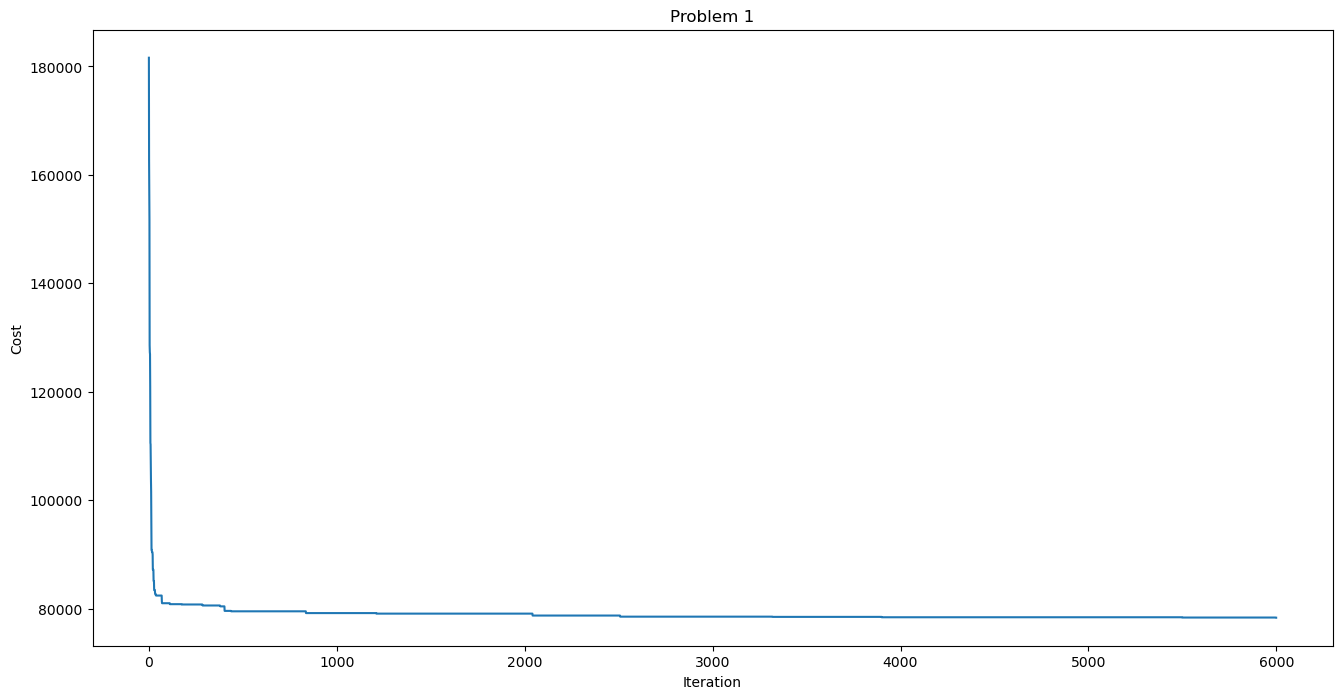

Problem 2
Average cost: 145630.98899999997


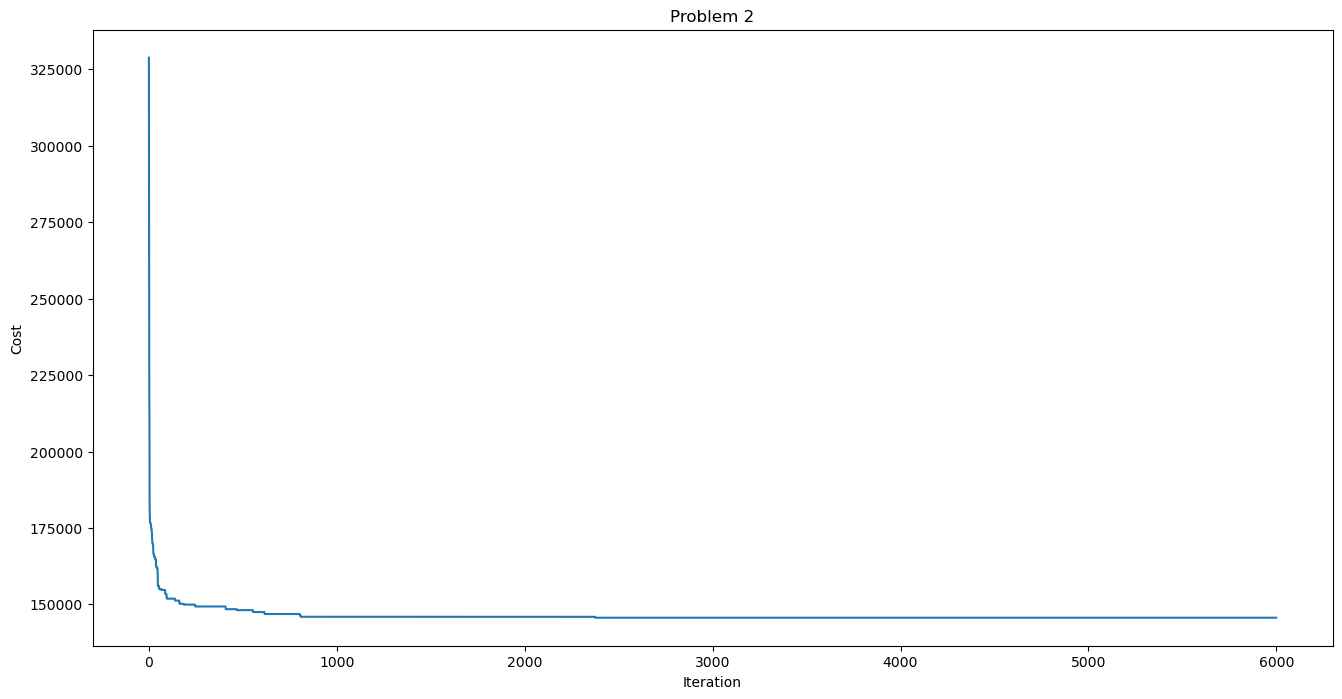

Problem 3
Average cost: 199496.51799999998


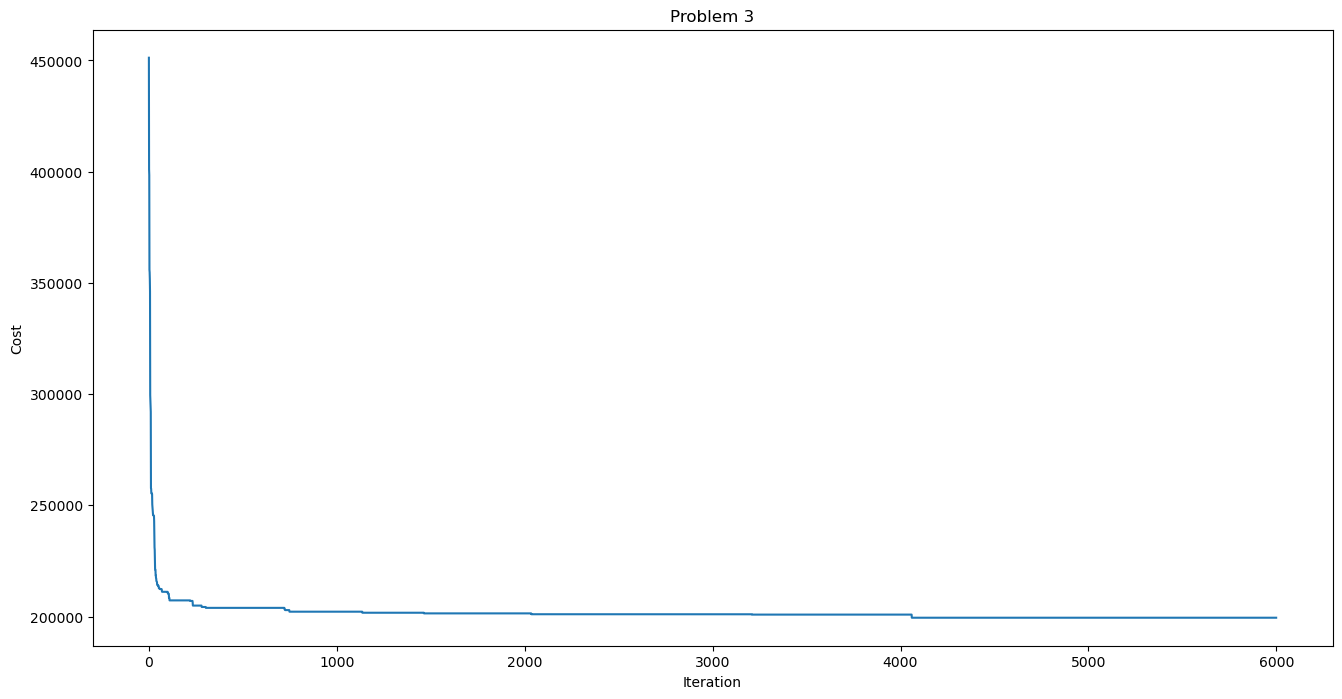

Problem 4
Average cost: 343579.755


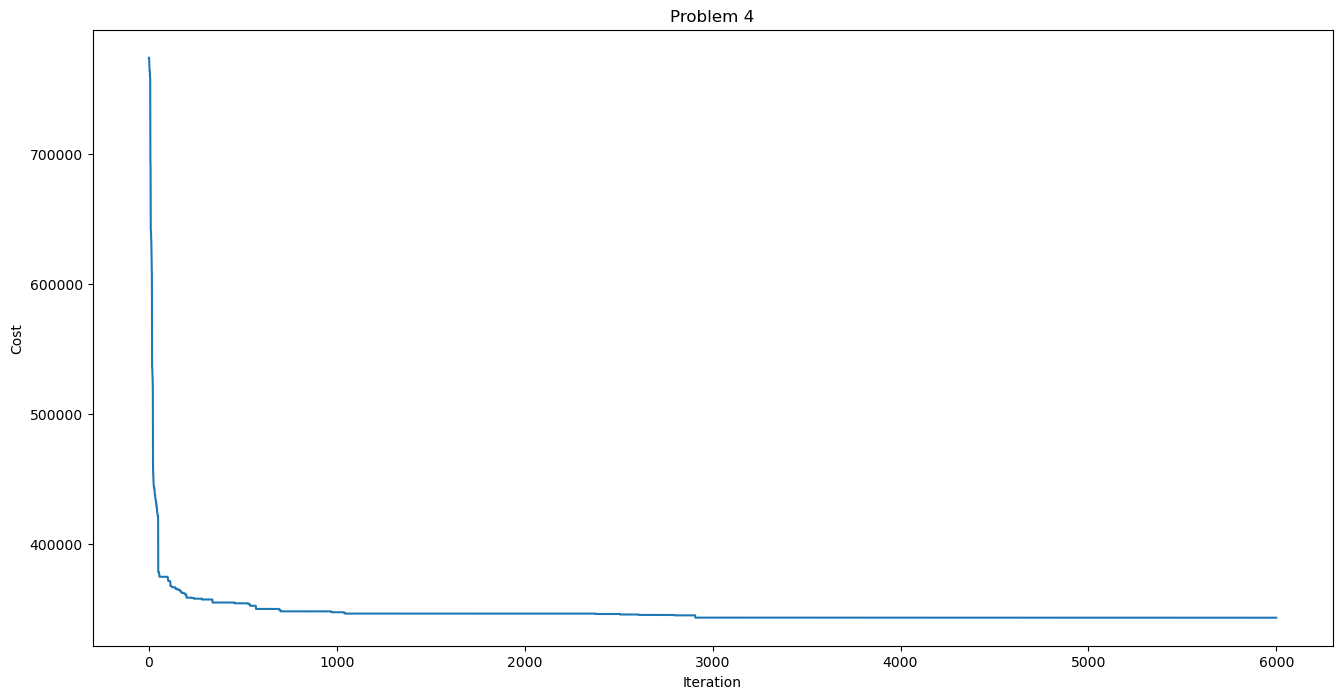

Problem 5
Average cost: 562366.171


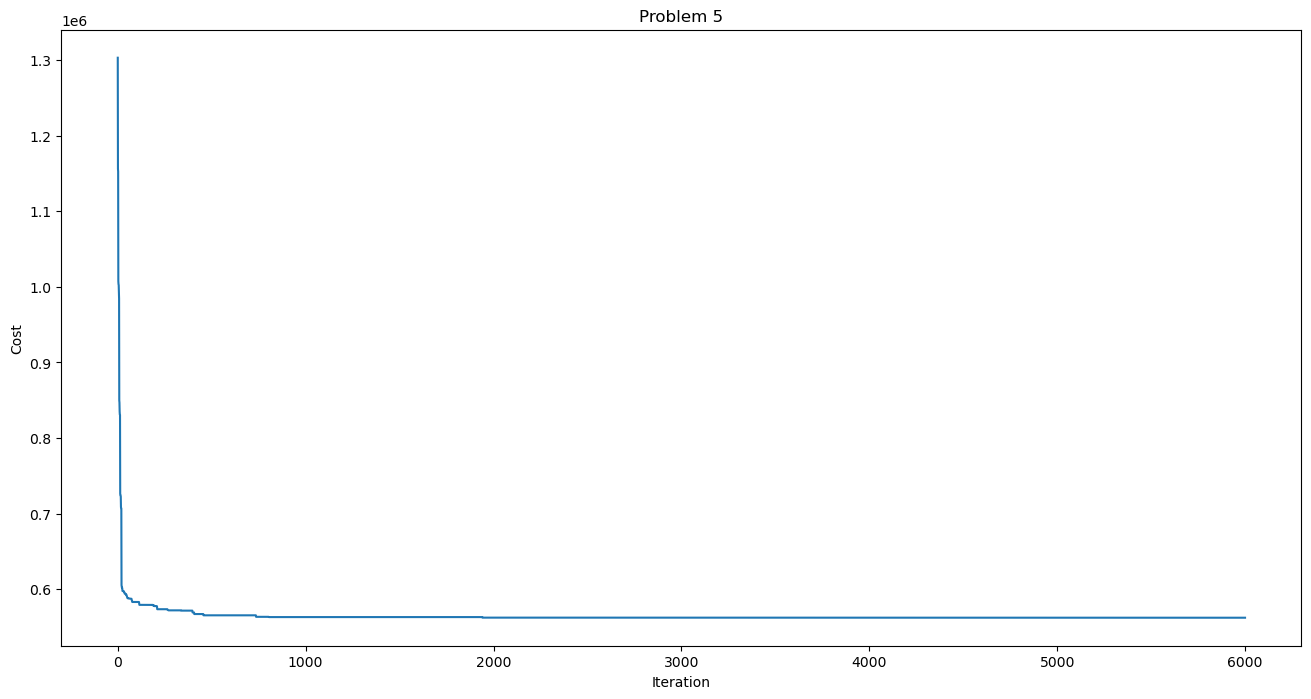

In [33]:
for k in range(5):
    print(f'Problem {k+1}')
    print(f'Average cost: {avg_costs[k]}')
    plot_costs(plots[k],title=f'Problem {k+1}')

Problem 1
Average cost: 67300.58
Best cost: 67300.58
Final improvement: 5499.0
Average time: 139.21882963180542


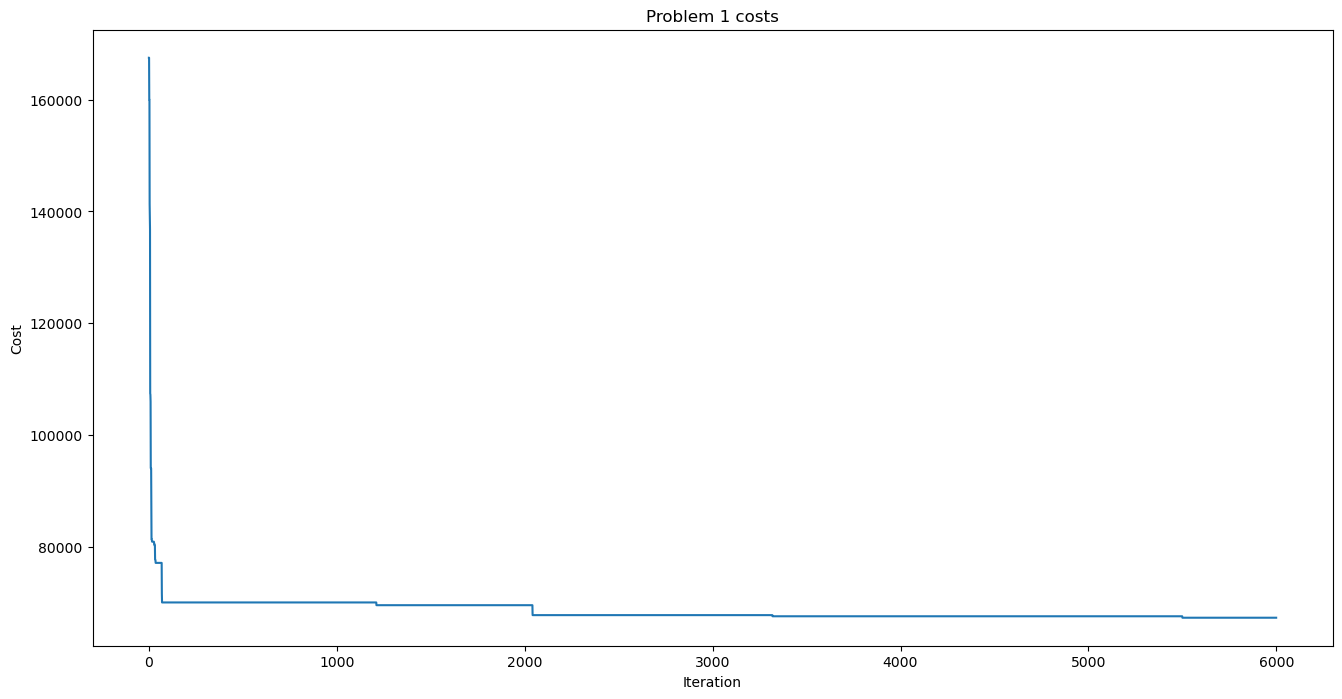

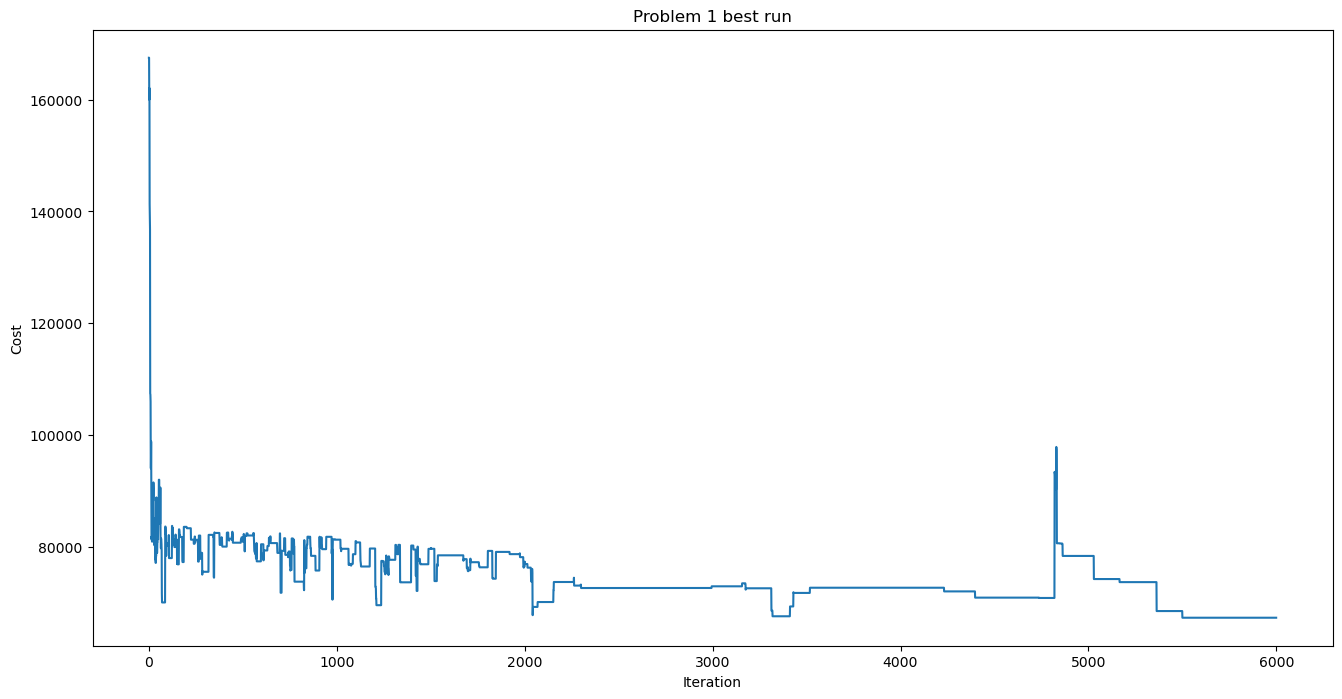

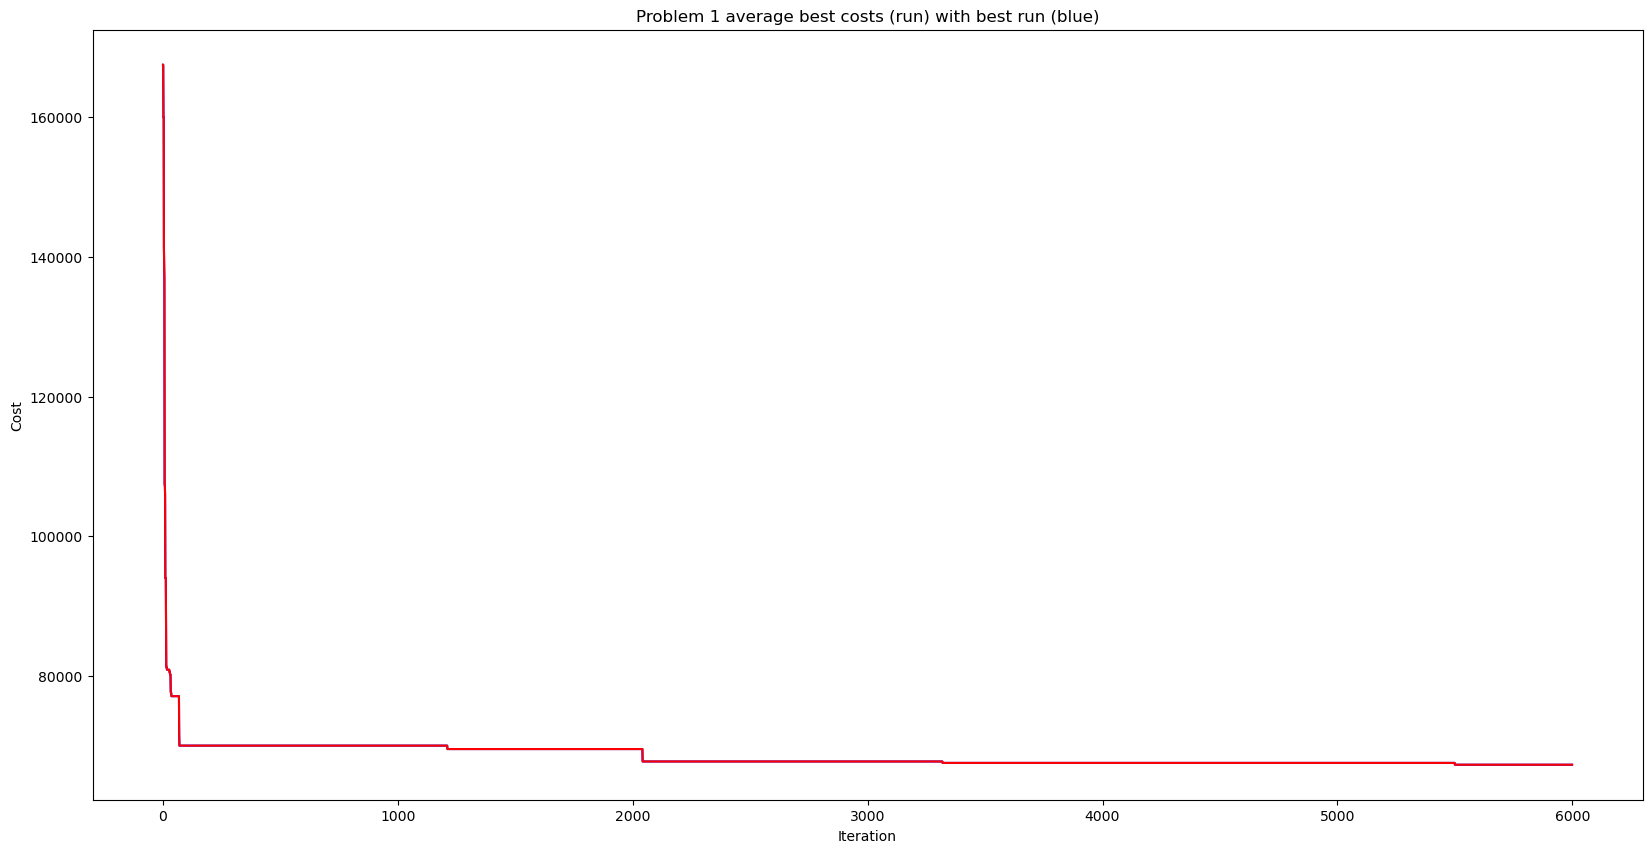



Problem 2
Average cost: 75477.16
Best cost: 75477.16
Final improvement: 2507.0
Average time: 138.0442831516266


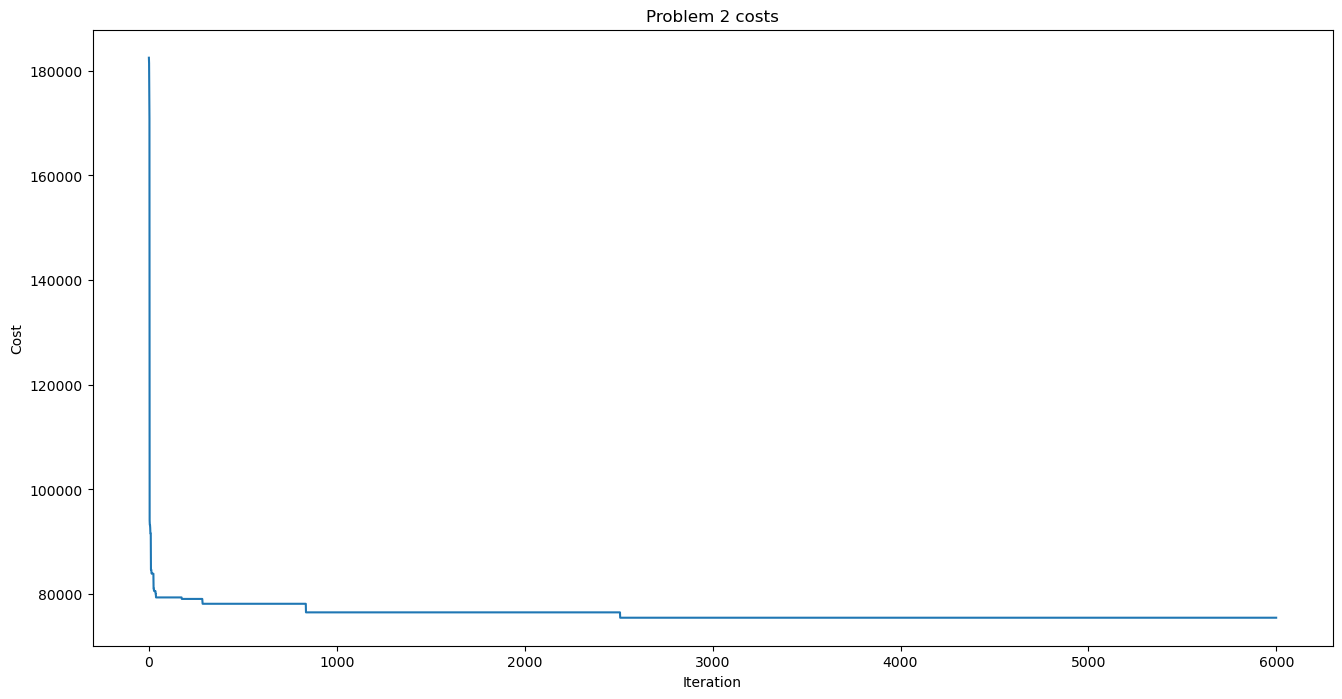

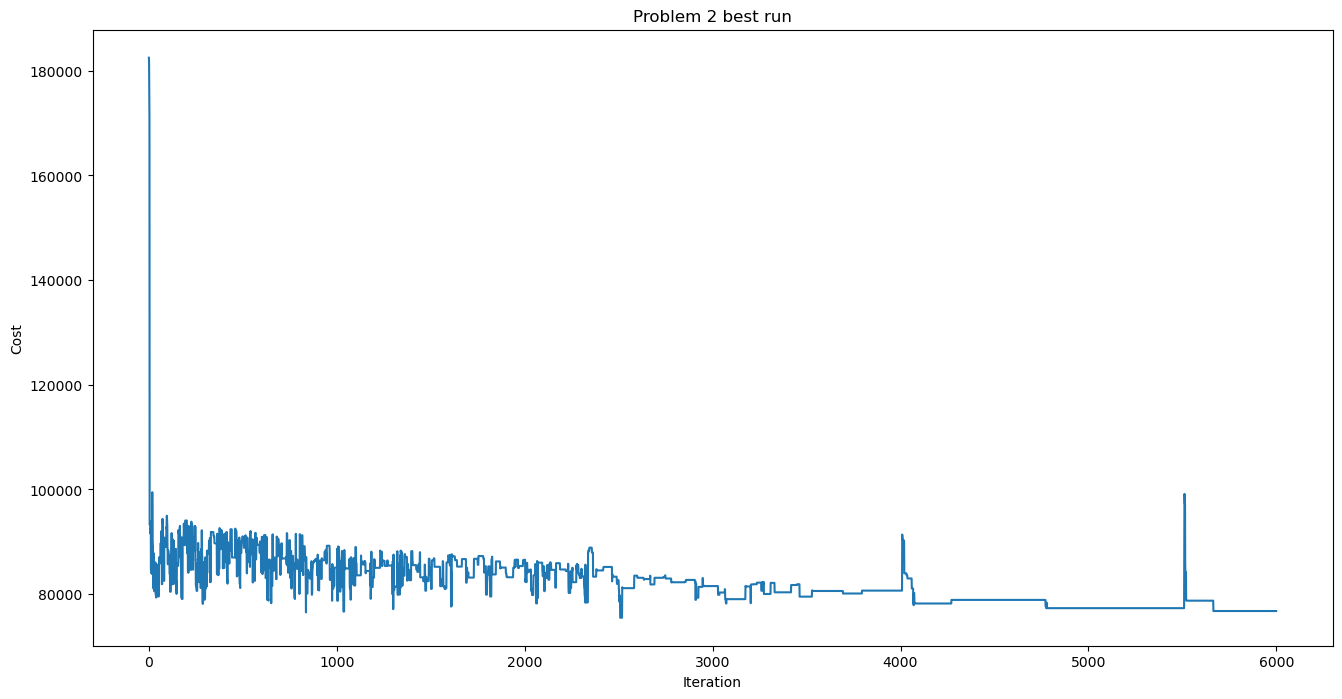

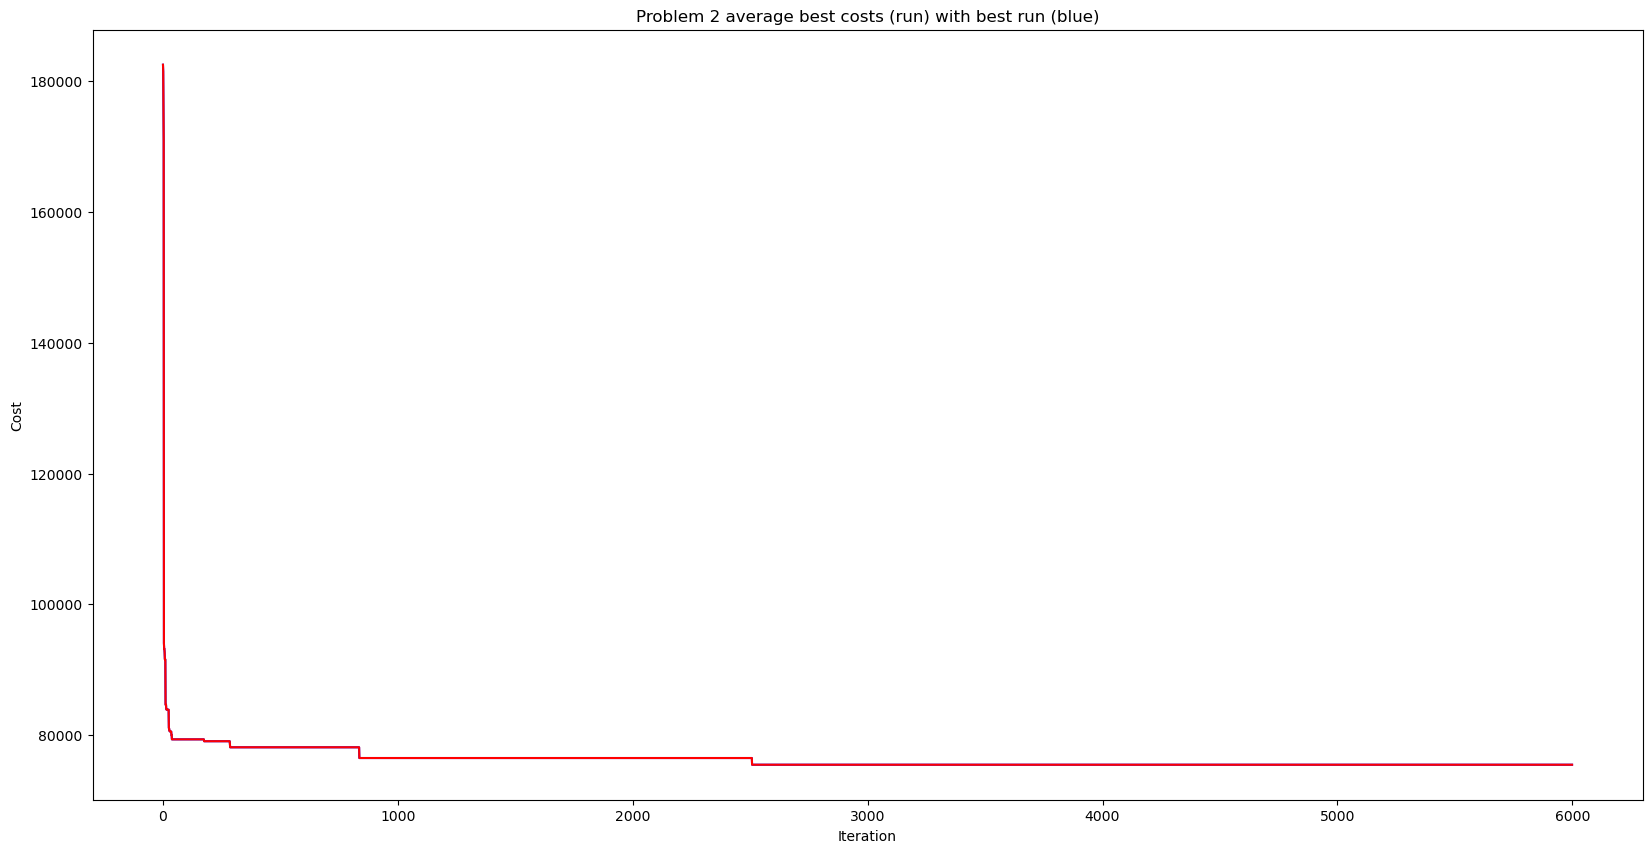



Problem 3
Average cost: 85007.62999999999
Best cost: 85007.62999999999
Final improvement: 437.0
Average time: 141.93973183631897


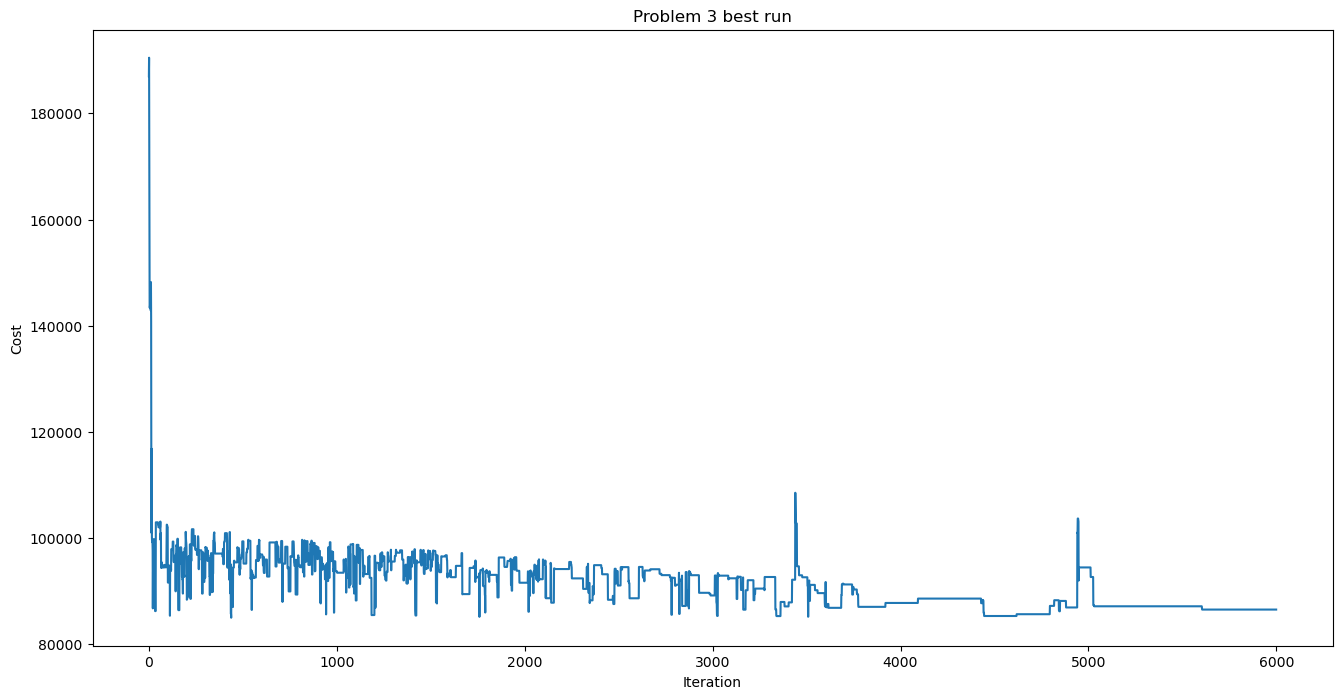

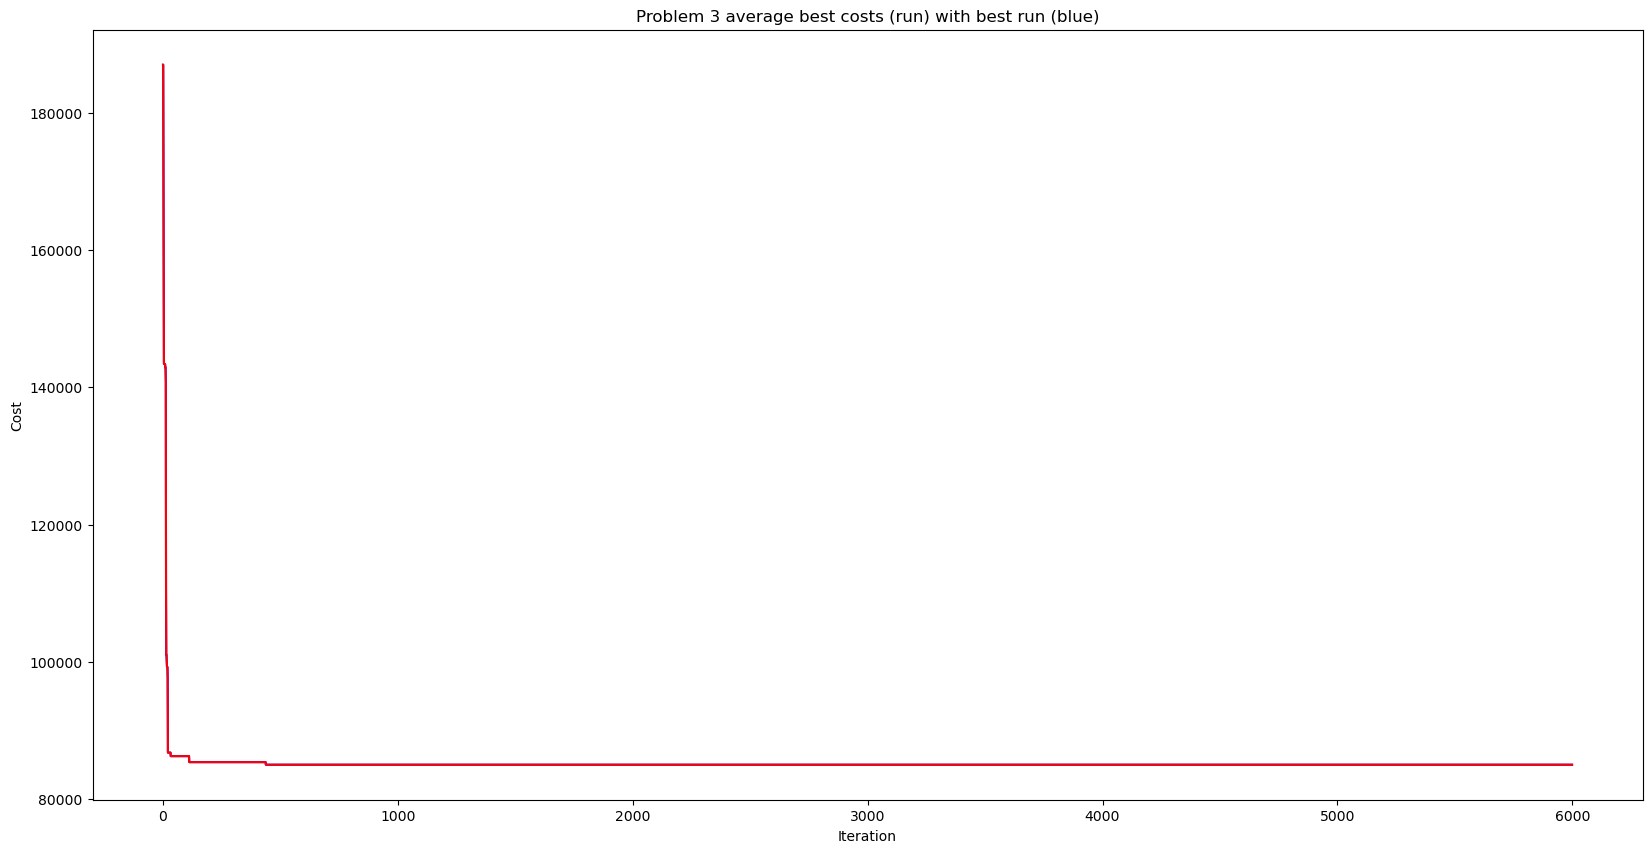



Problem 4
Average cost: 74840.57999999999
Best cost: 74840.57999999999
Final improvement: 3899.0
Average time: 153.6202998161316


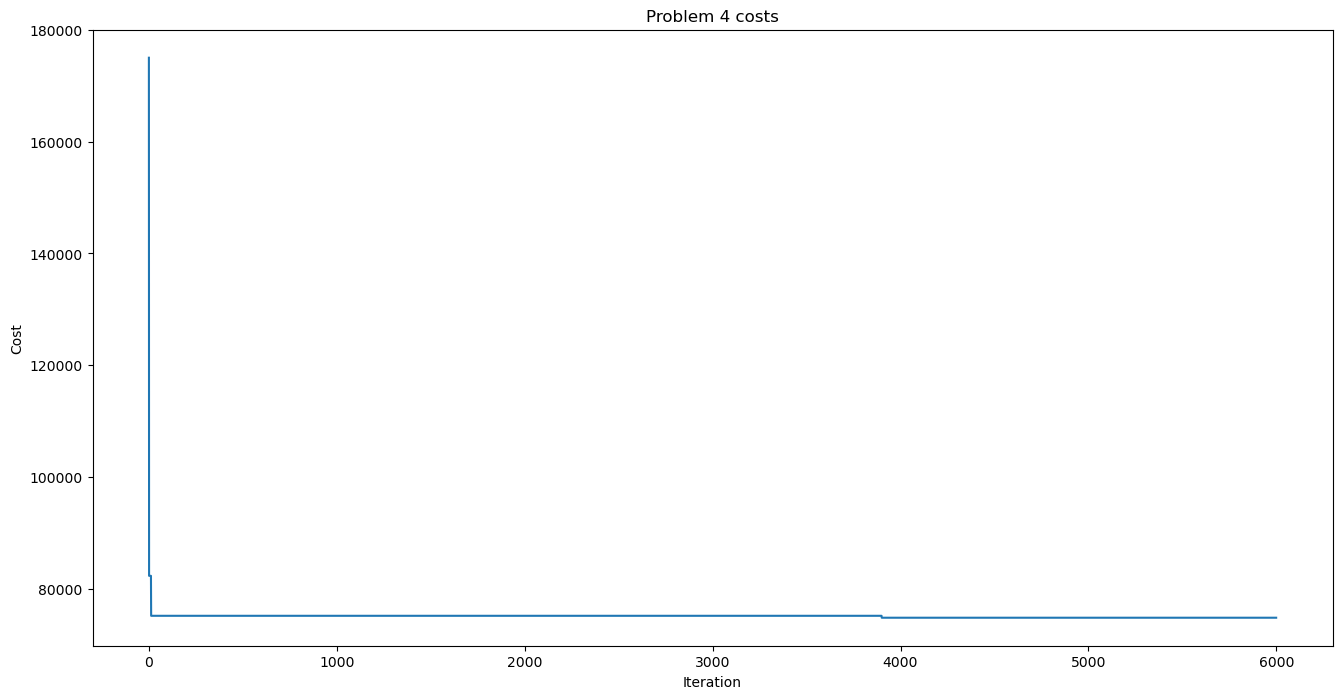

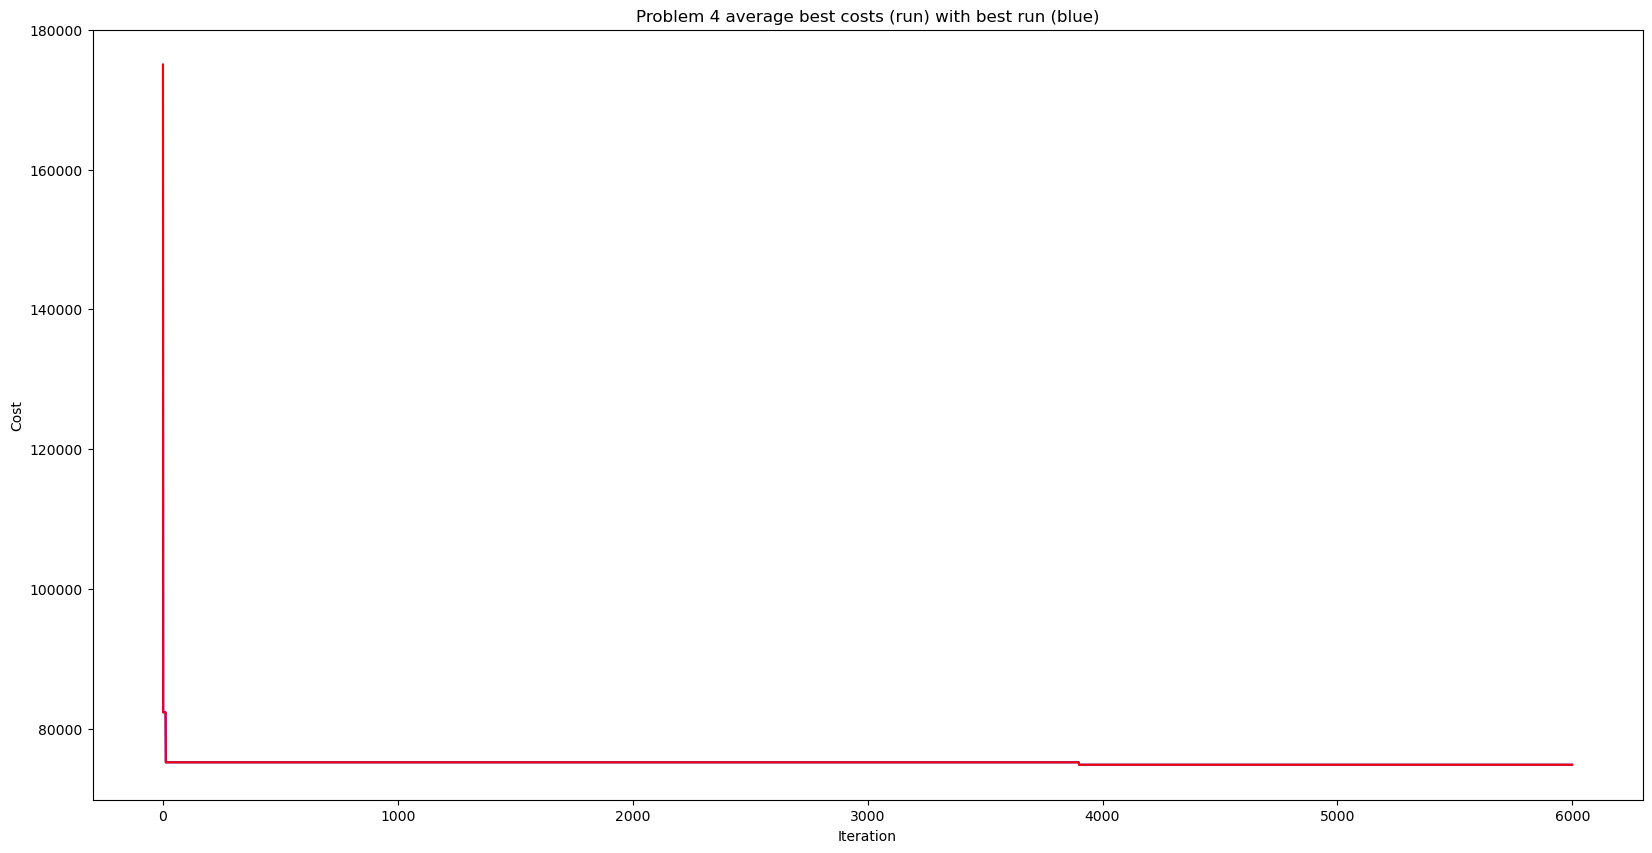



Problem 5
Average cost: 88770.52
Best cost: 88770.52
Final improvement: 5999.0
Average time: 131.60357284545898


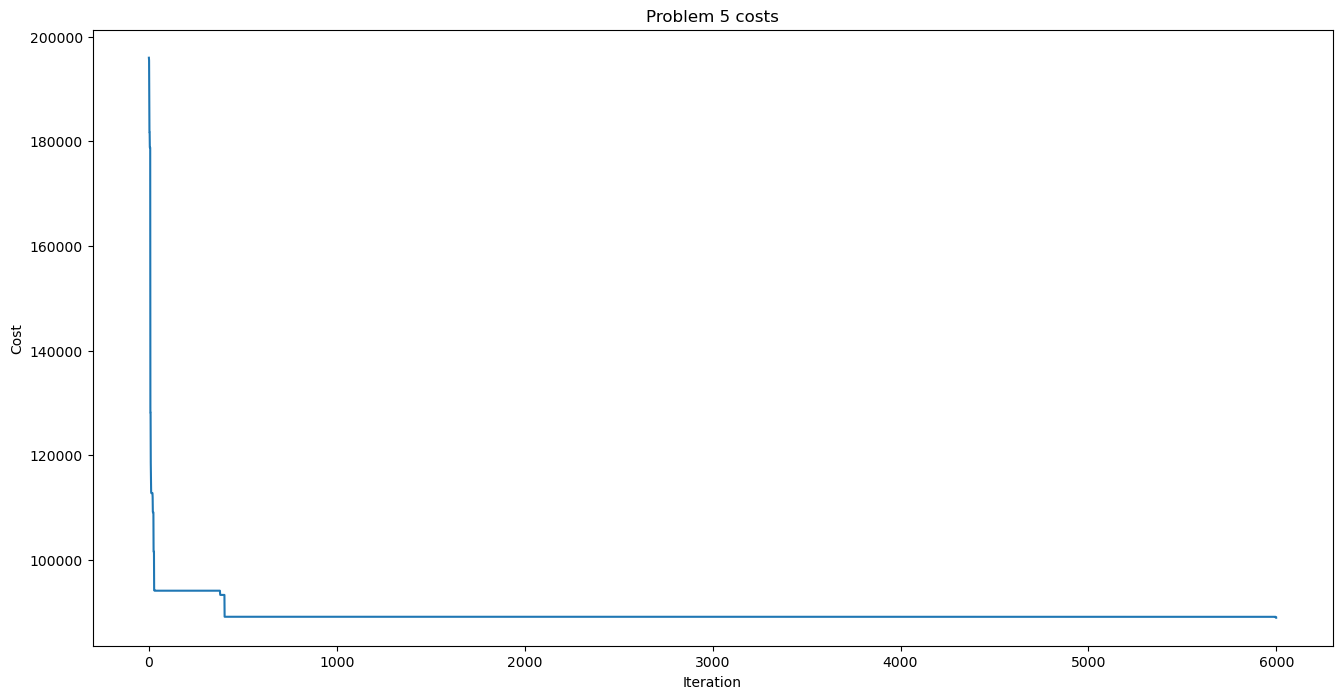



Problem 6
Average cost: 157229.58
Best cost: 157229.58
Final improvement: 899.0
Average time: 168.5901162624359


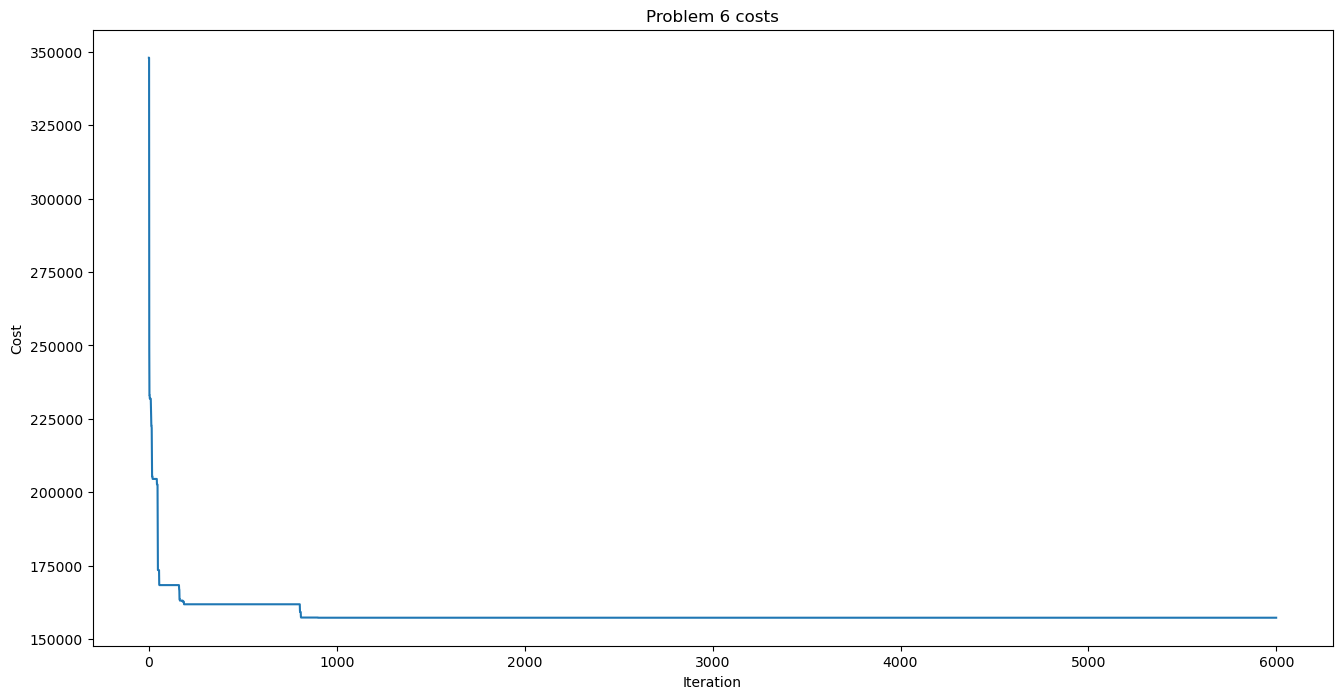



Problem 7
Average cost: 126855.10999999999
Best cost: 126855.10999999999
Final improvement: 555.0
Average time: 165.28311491012573


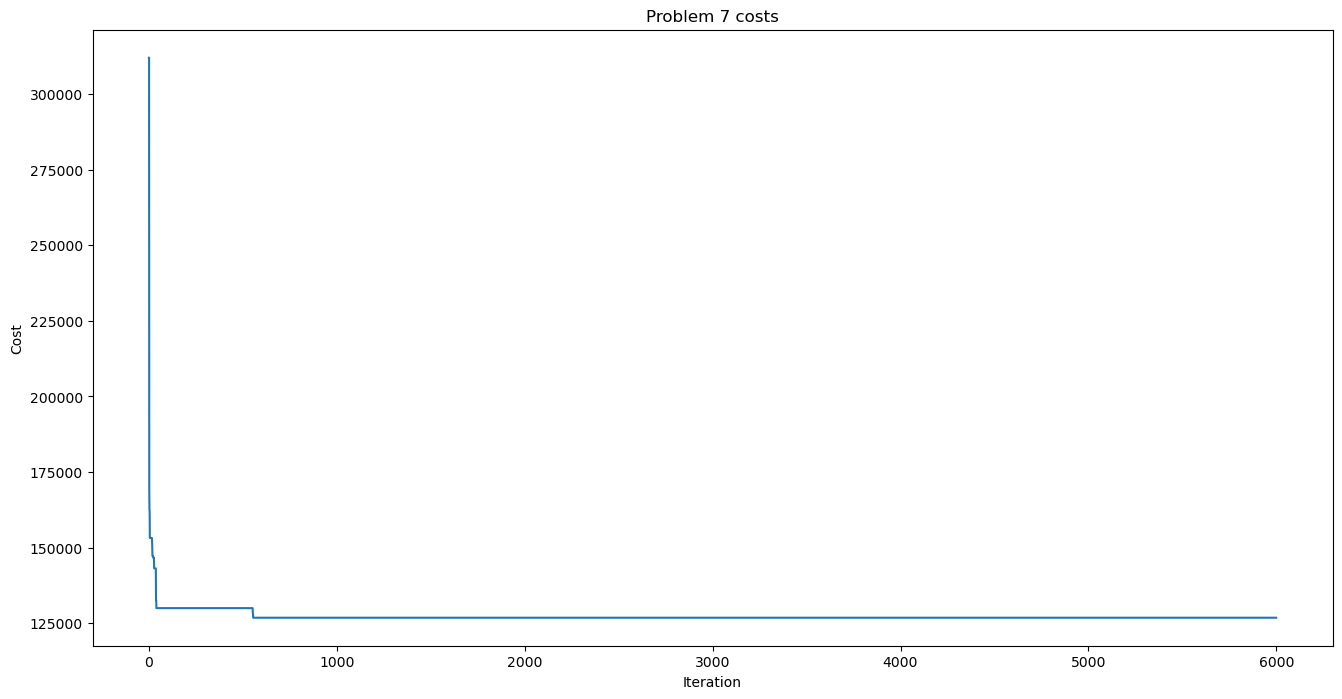

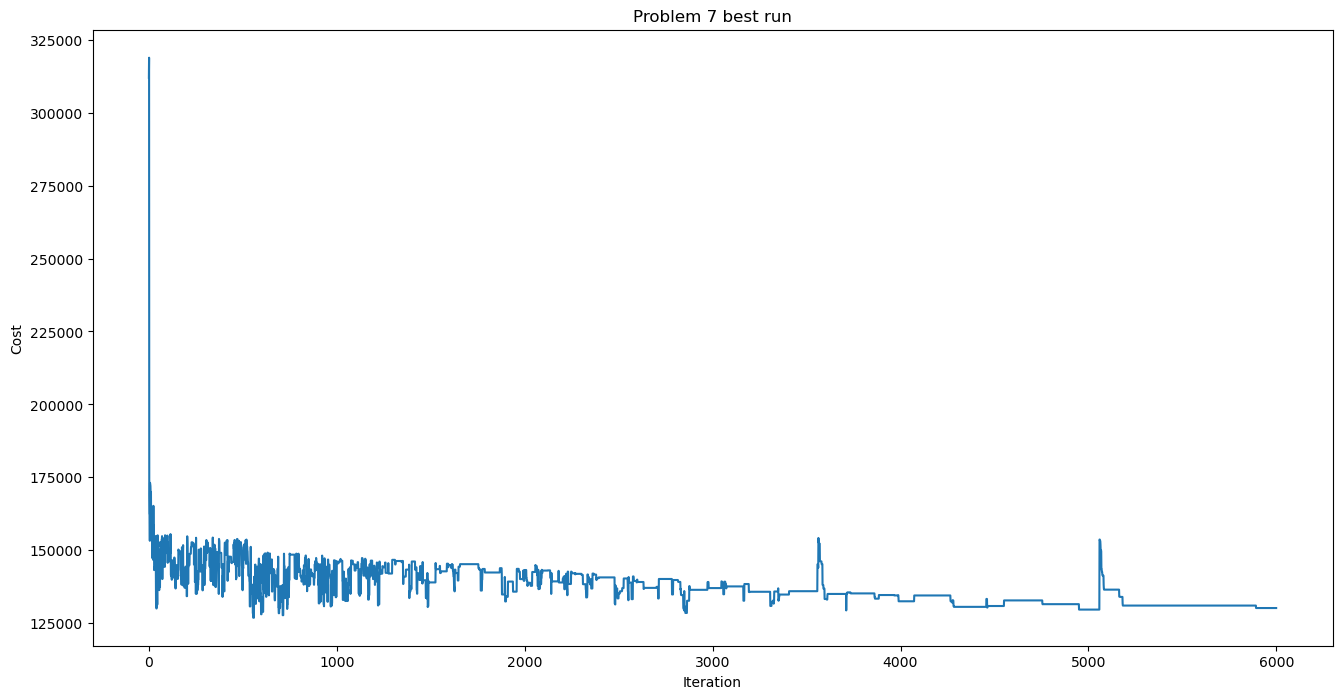



Problem 8
Average cost: 135837.09999999998
Best cost: 135837.09999999998
Final improvement: 2374.0
Average time: 169.4738519191742


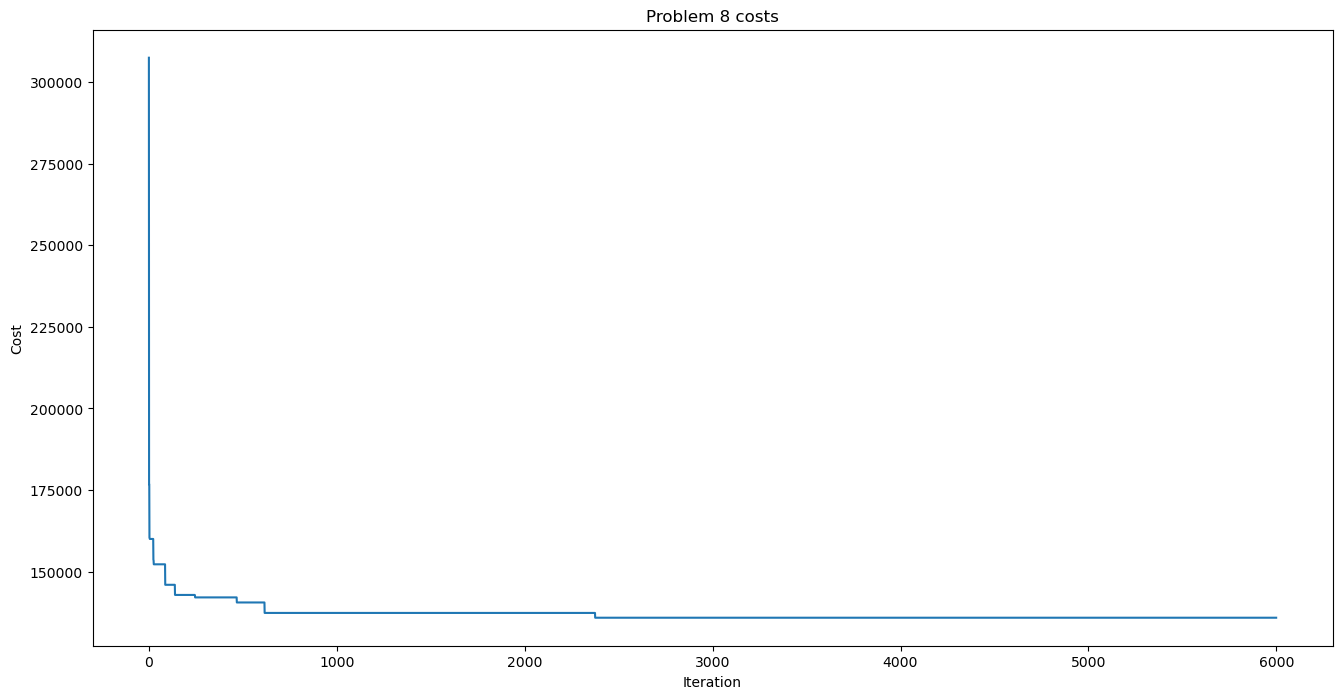

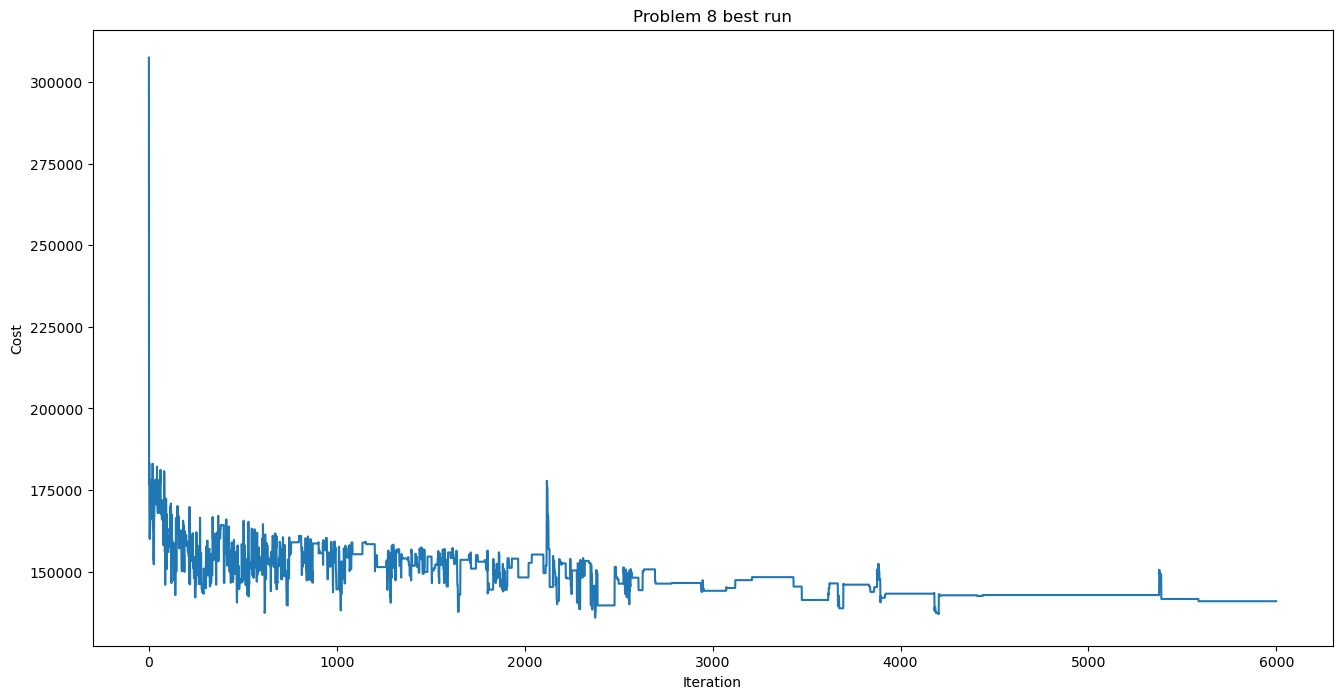

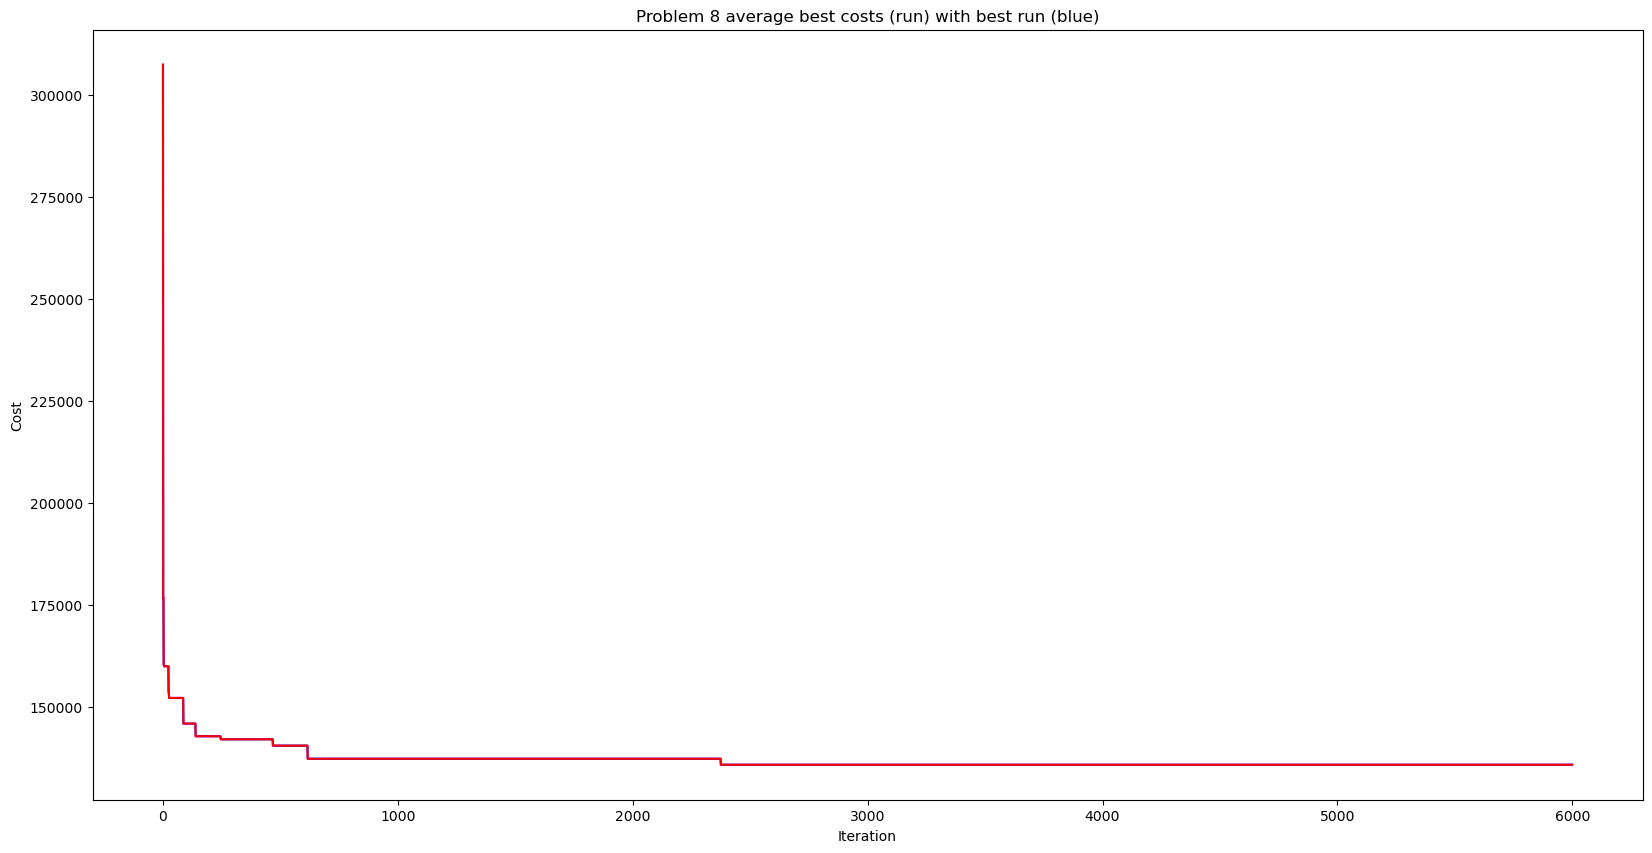



Problem 9
Average cost: 146776.925
Best cost: 146776.925
Final improvement: 408.0
Average time: 151.09456992149353


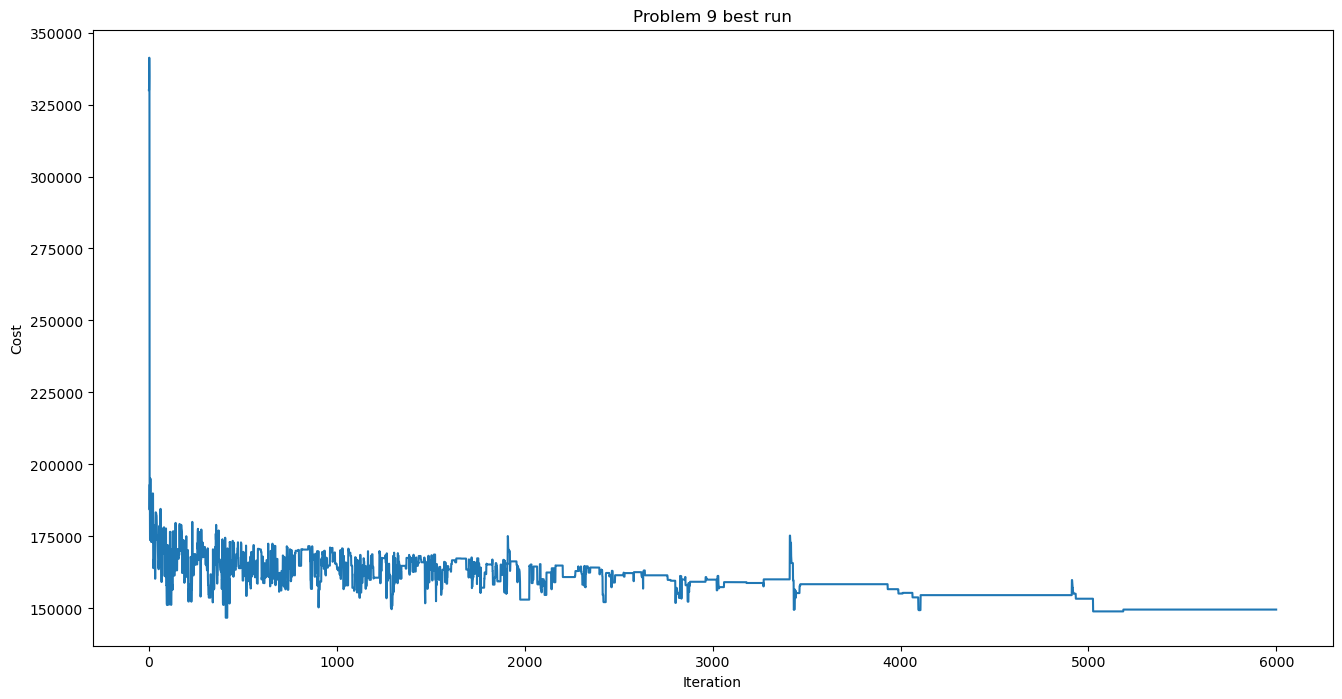

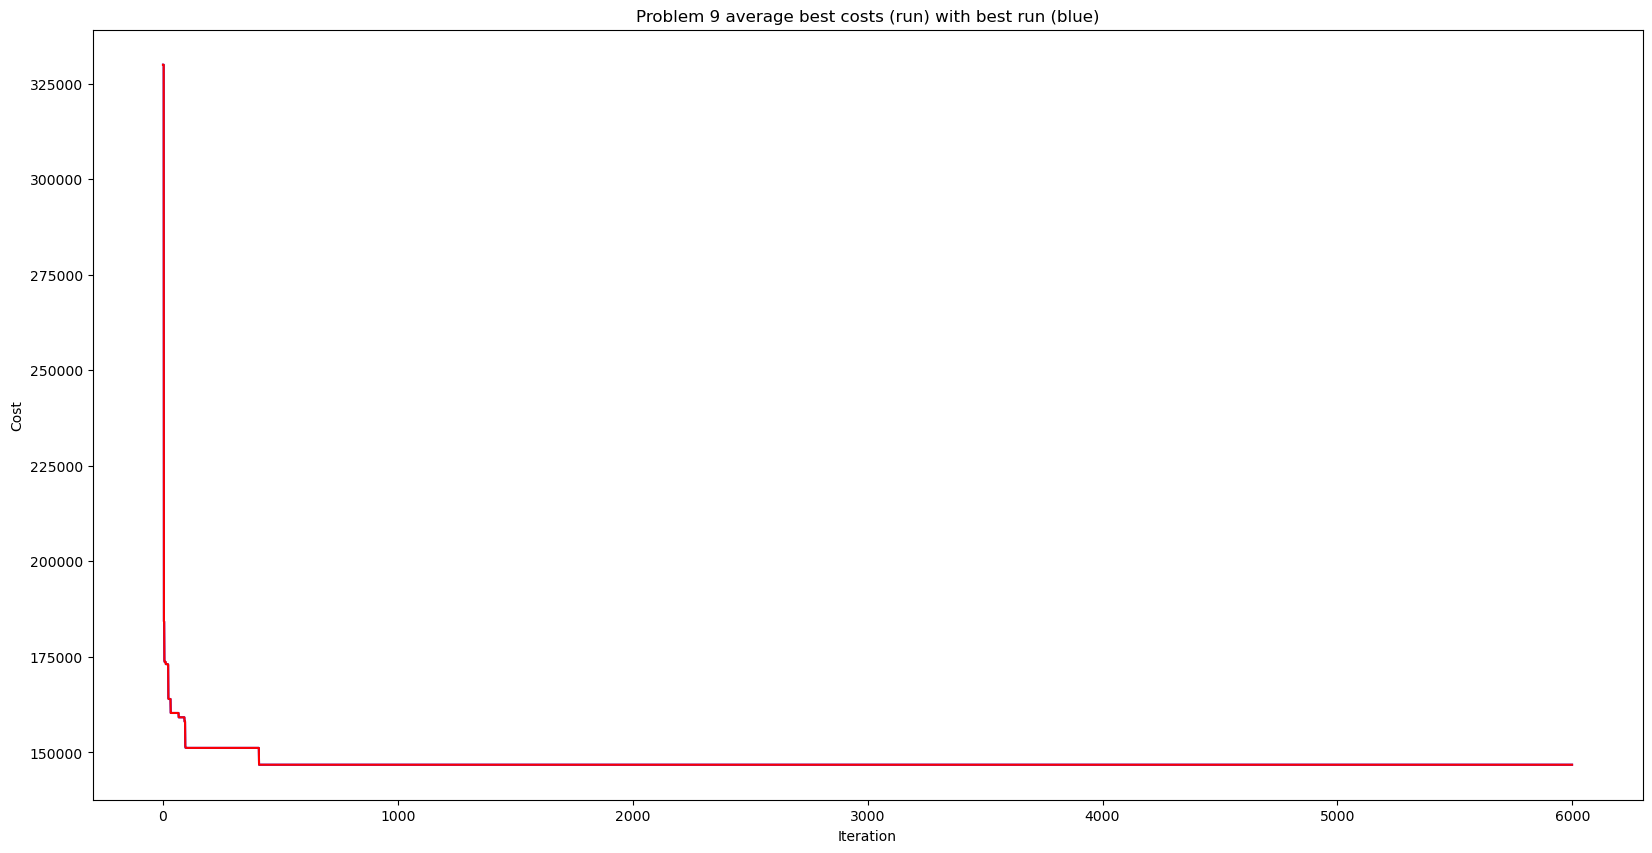



Problem 10
Average cost: 161456.23
Best cost: 161456.23
Final improvement: 246.0
Average time: 154.39761209487915


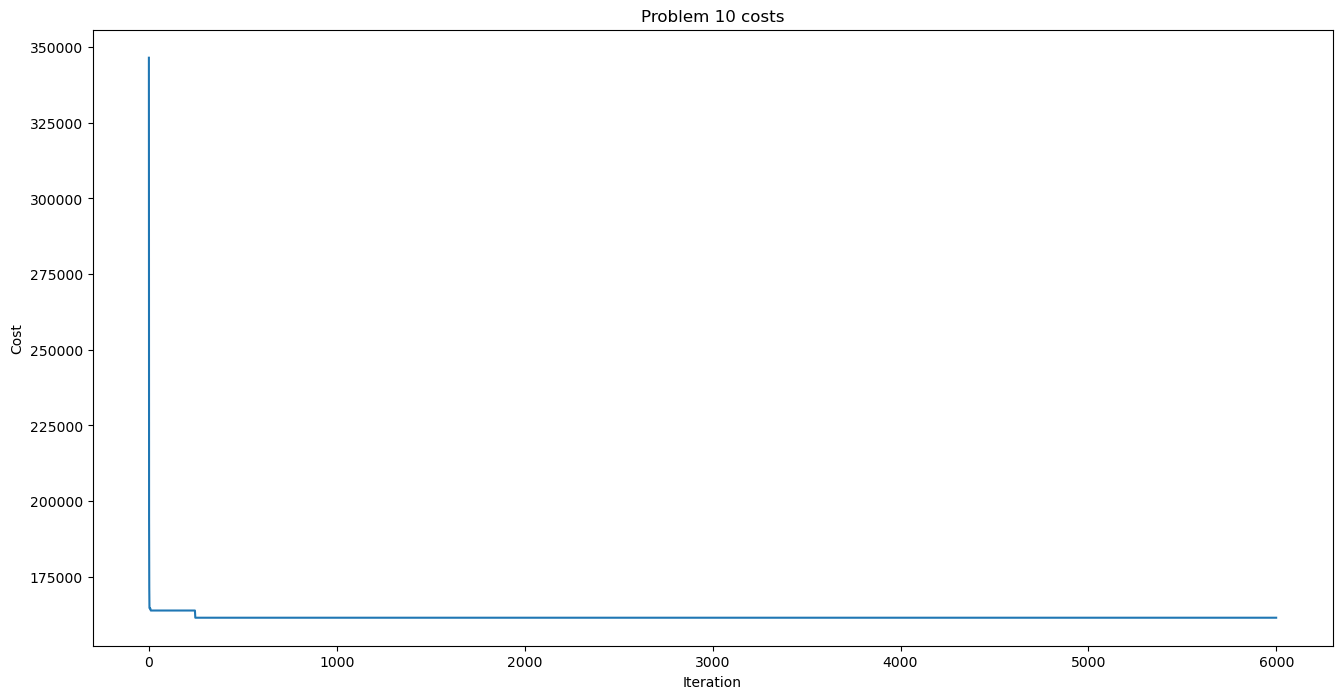

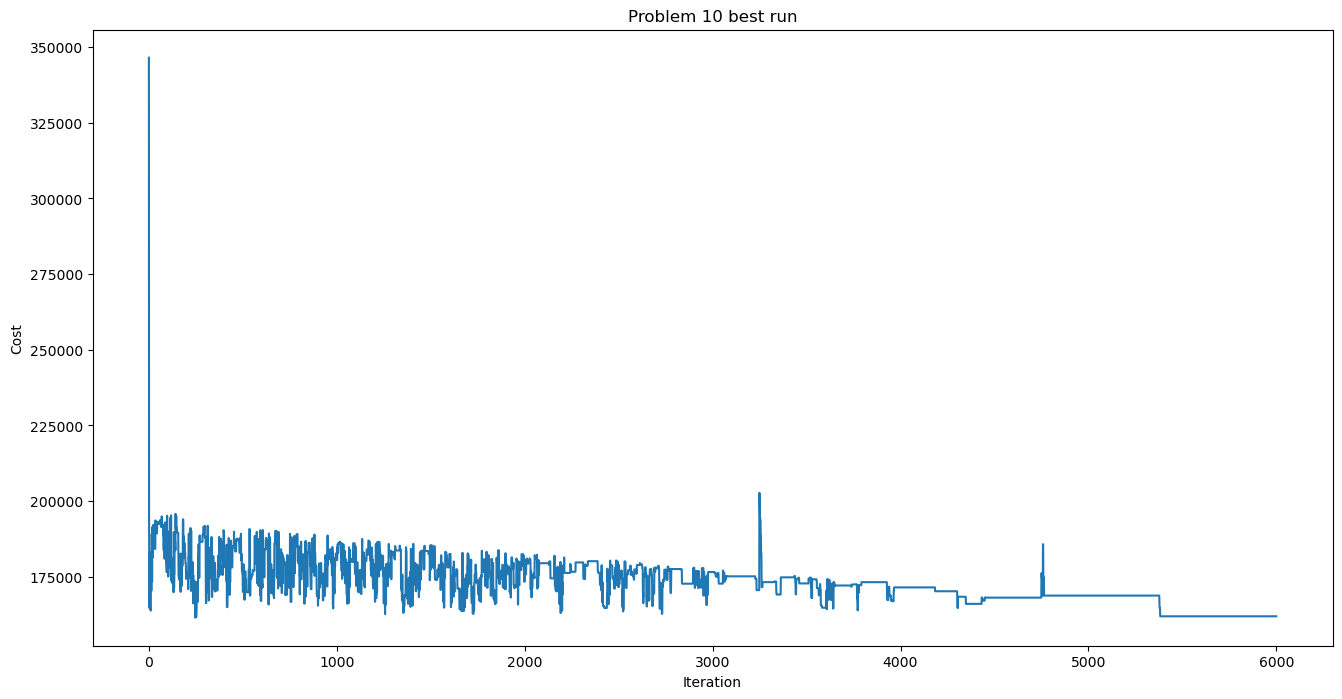

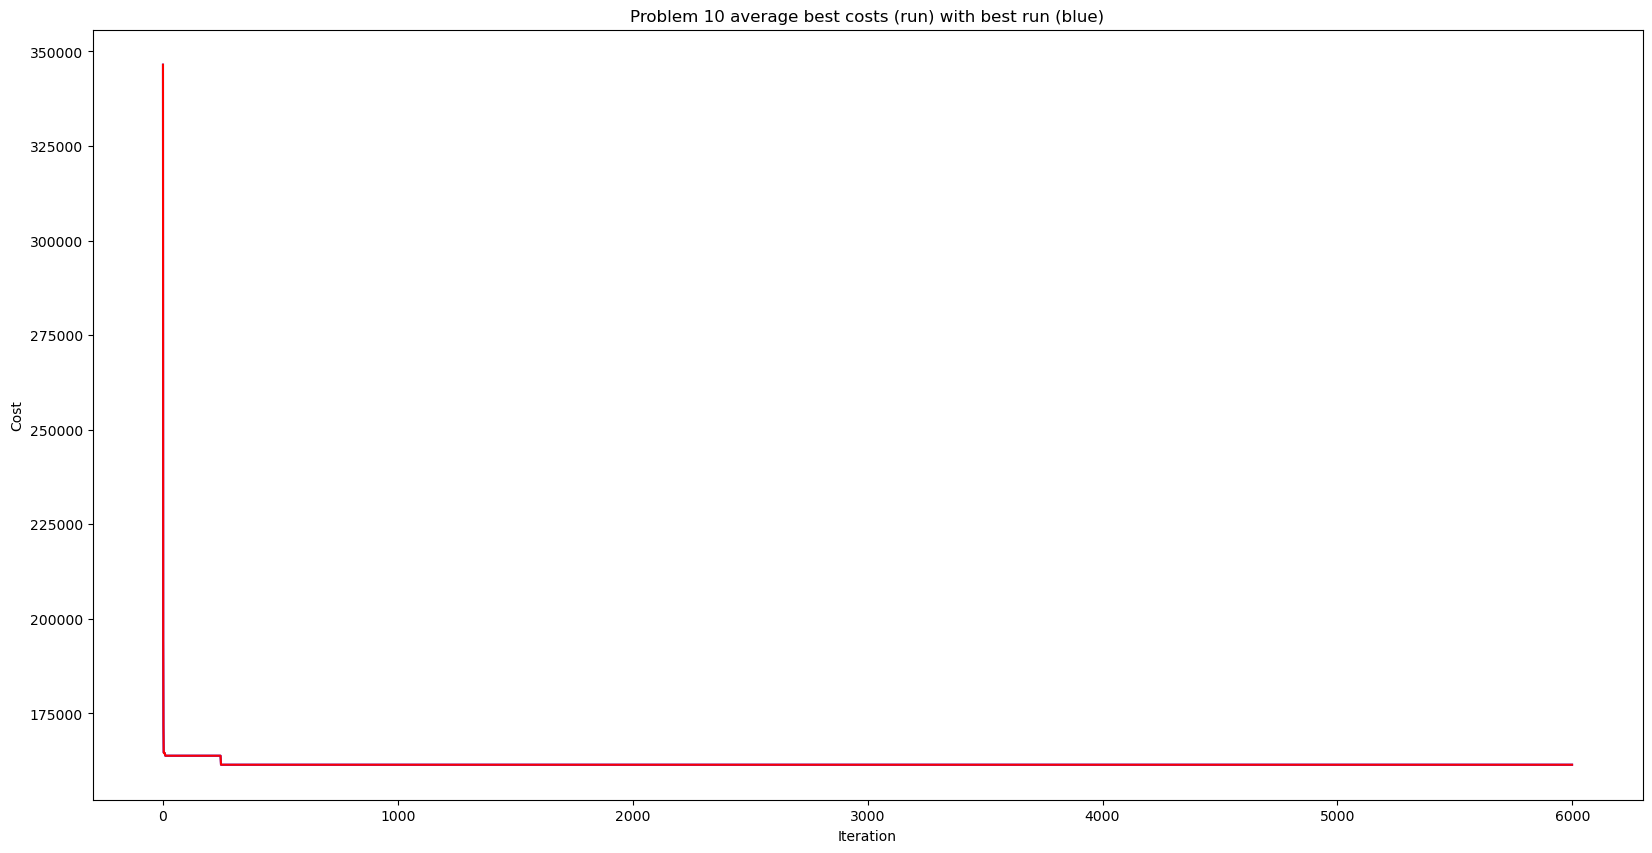



Problem 11
Average cost: 200722.98000000004
Best cost: 200722.98000000004
Final improvement: 1135.0
Average time: 188.05842113494873


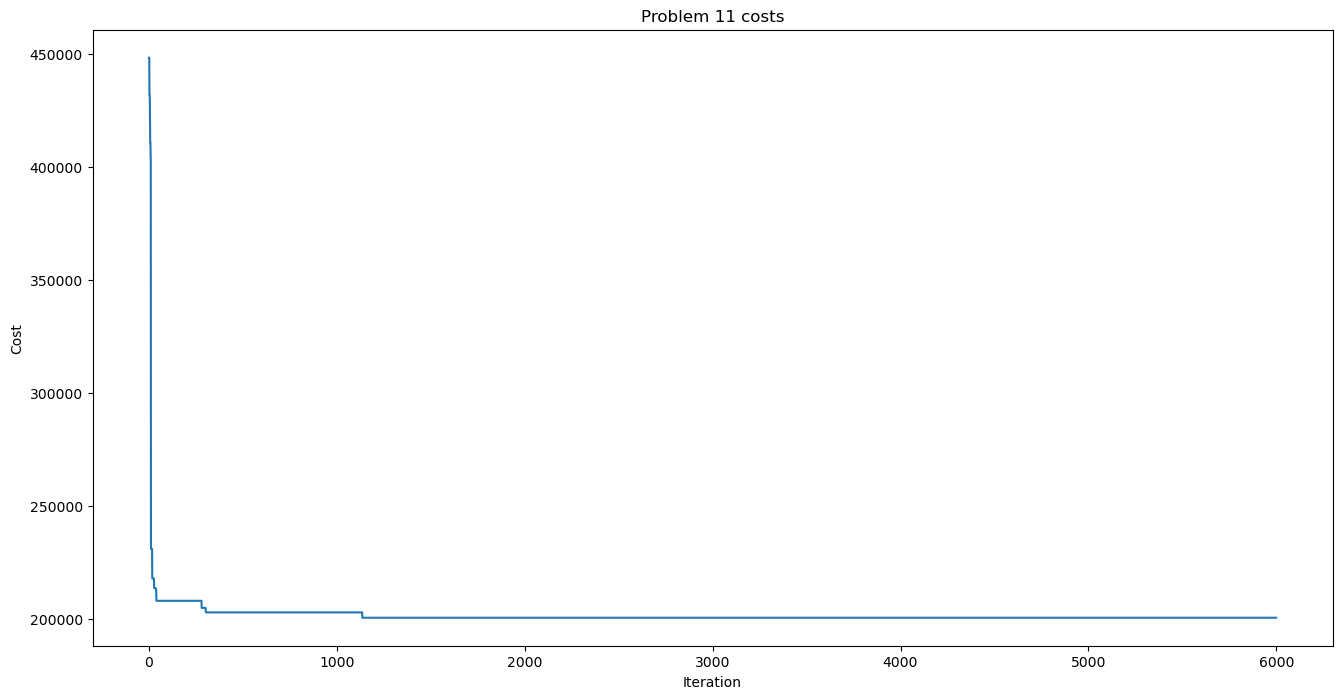

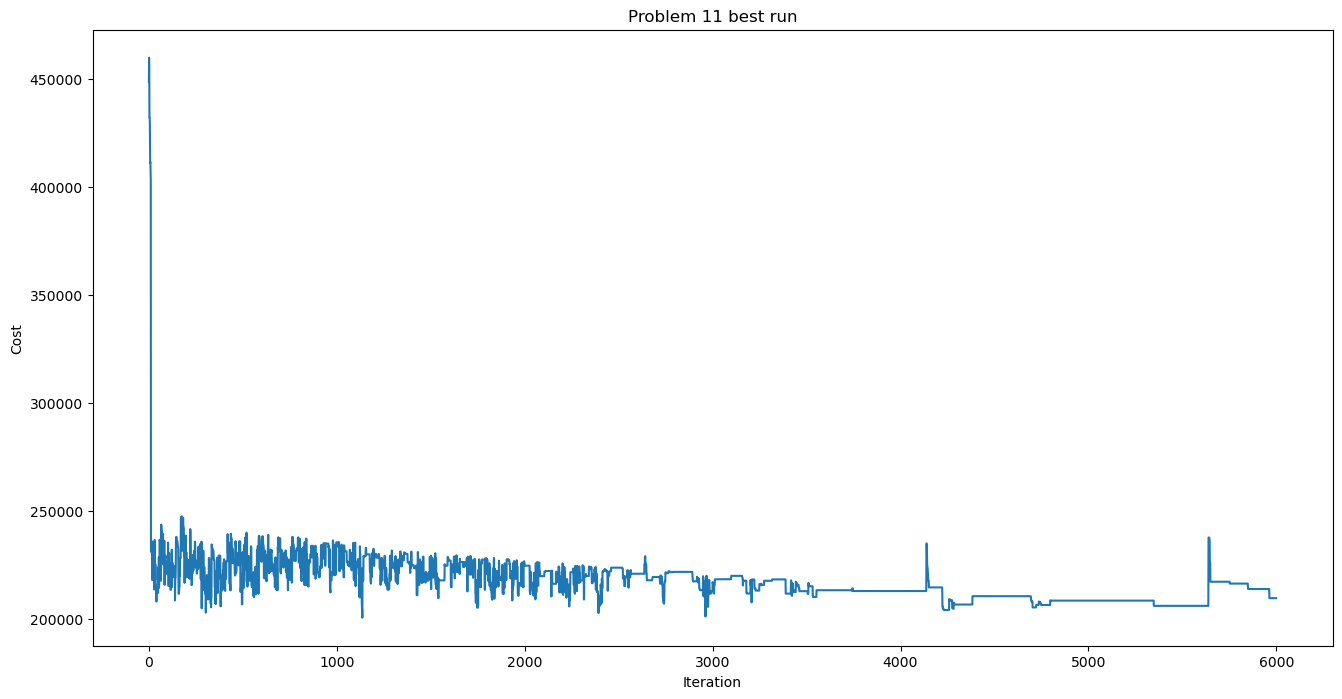

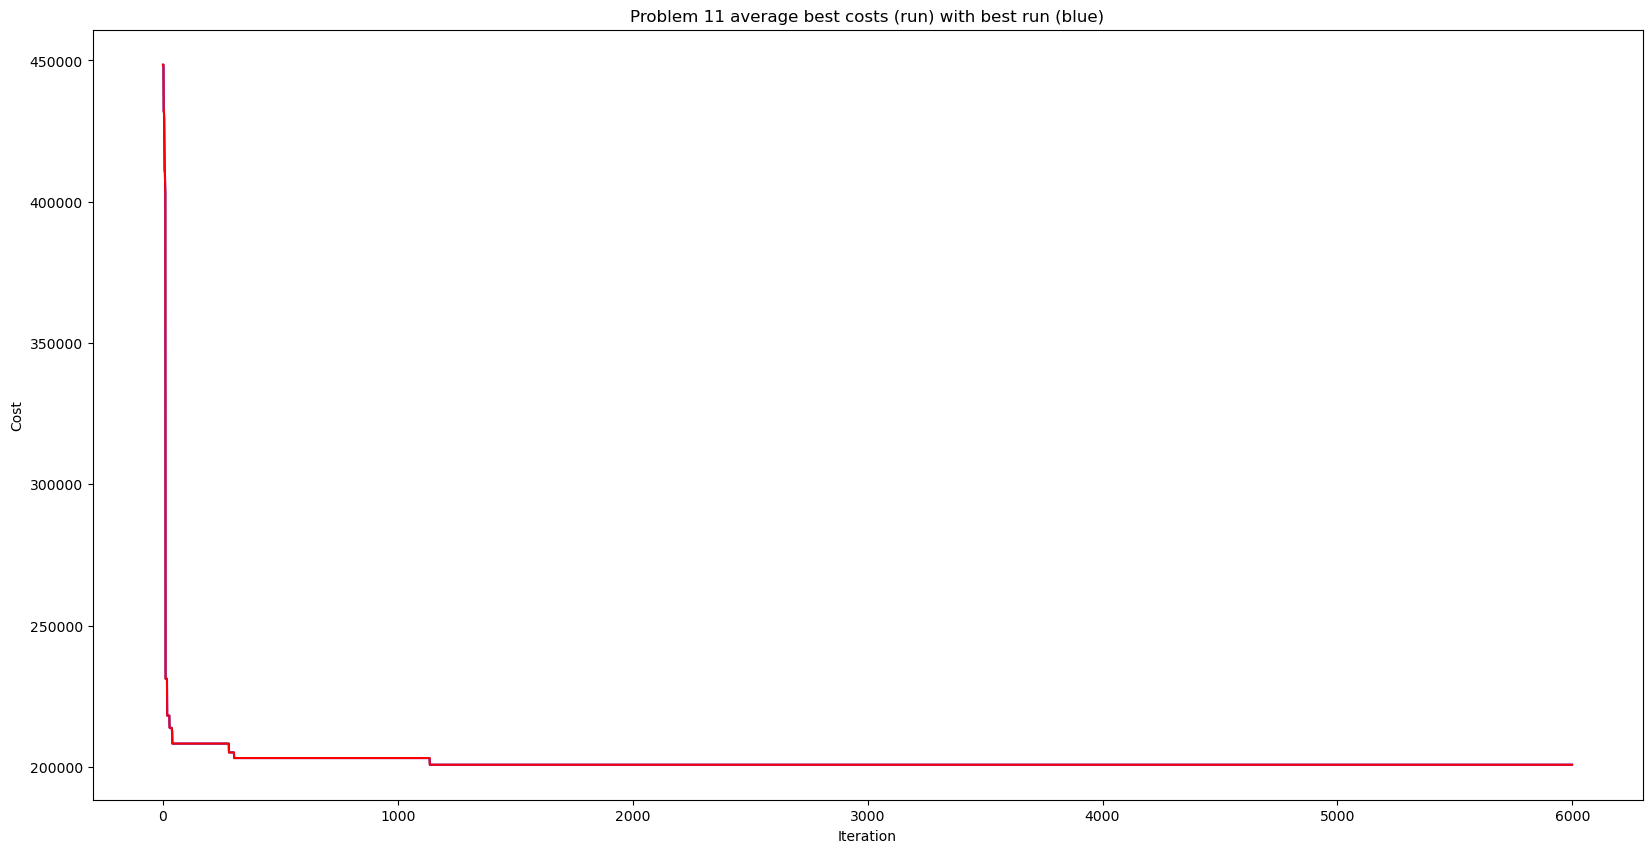



Problem 12
Average cost: 234699.76499999996
Best cost: 234699.76499999996
Final improvement: 2037.0
Average time: 174.41010928153992


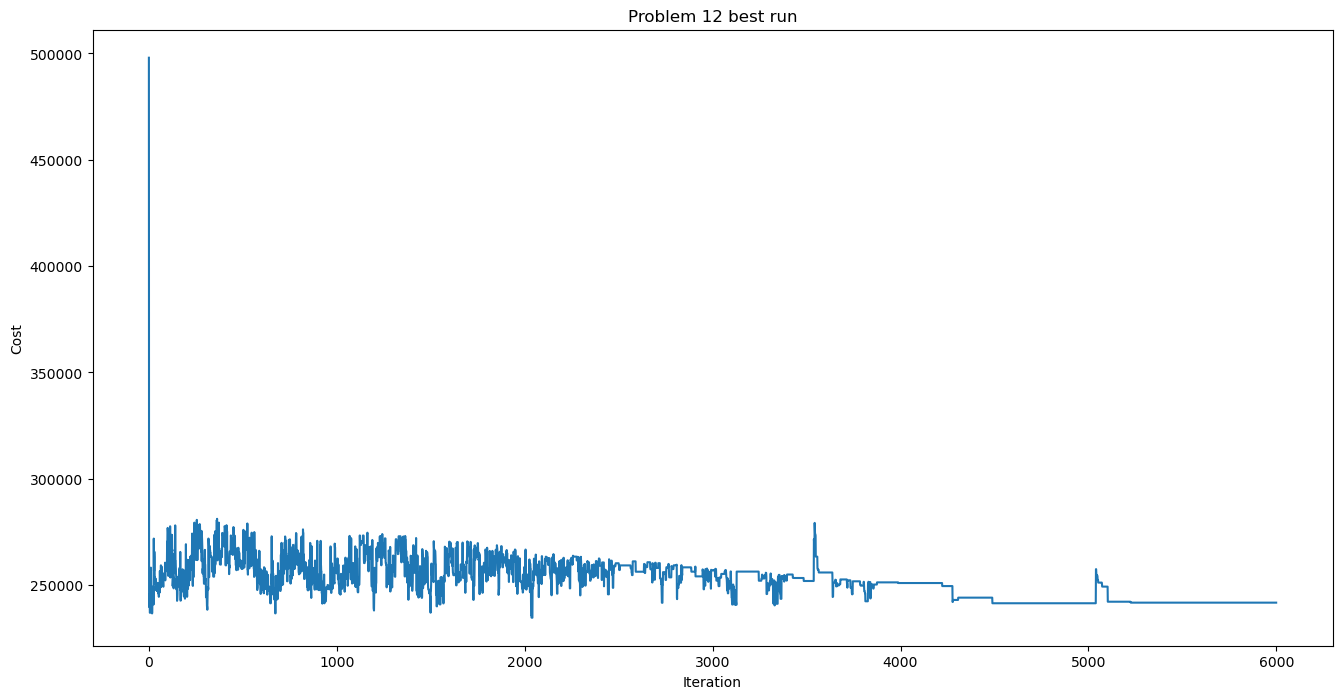

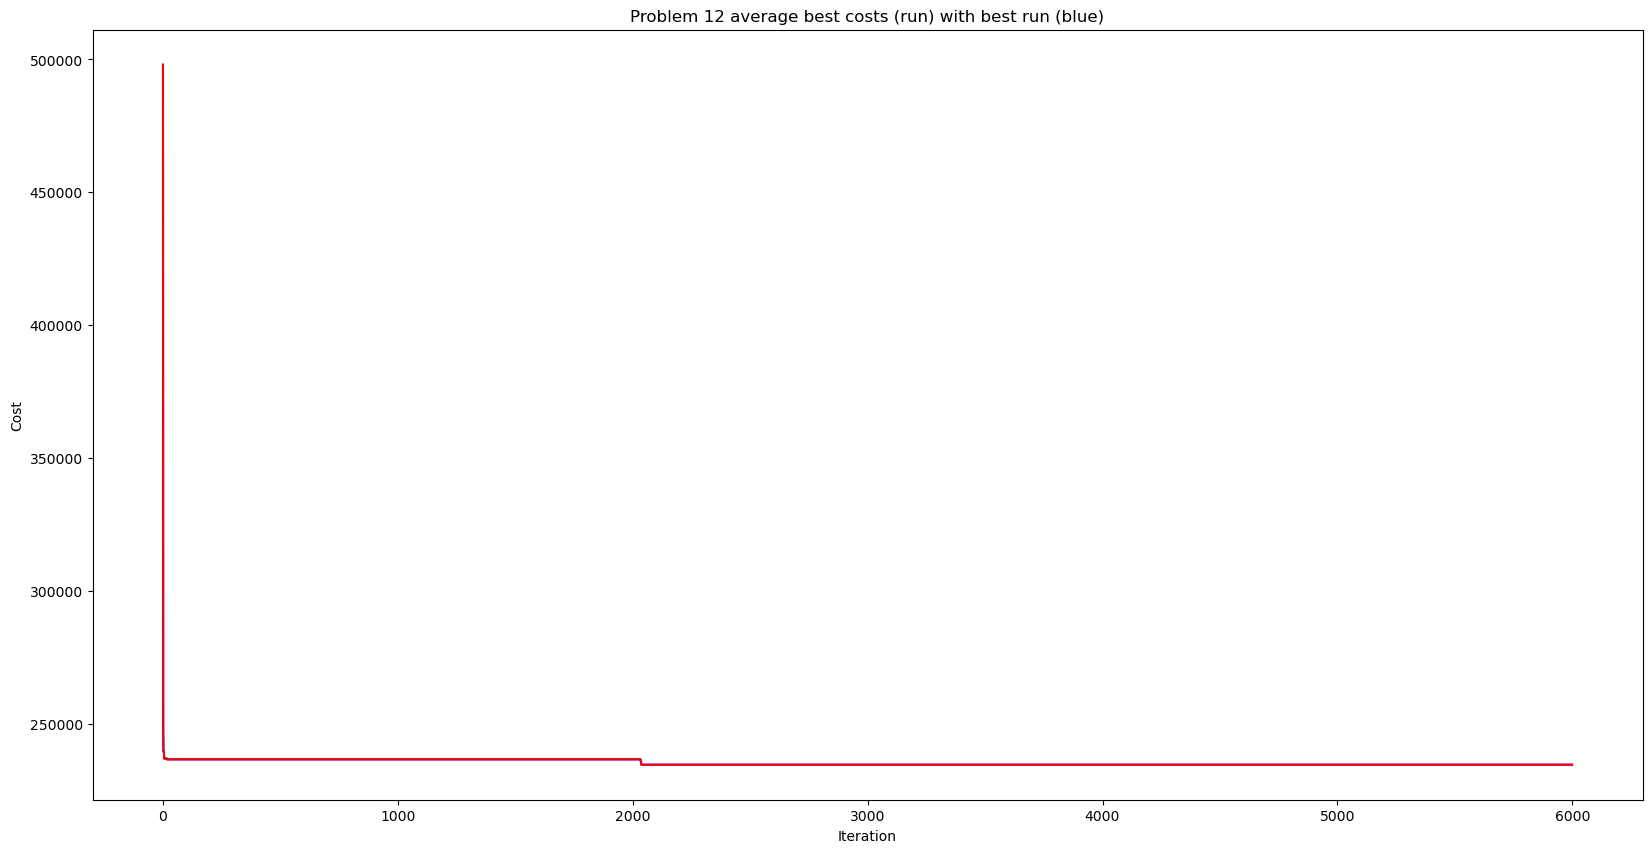



Problem 13
Average cost: 191197.23
Best cost: 191197.23
Final improvement: 1463.0
Average time: 194.14399480819702


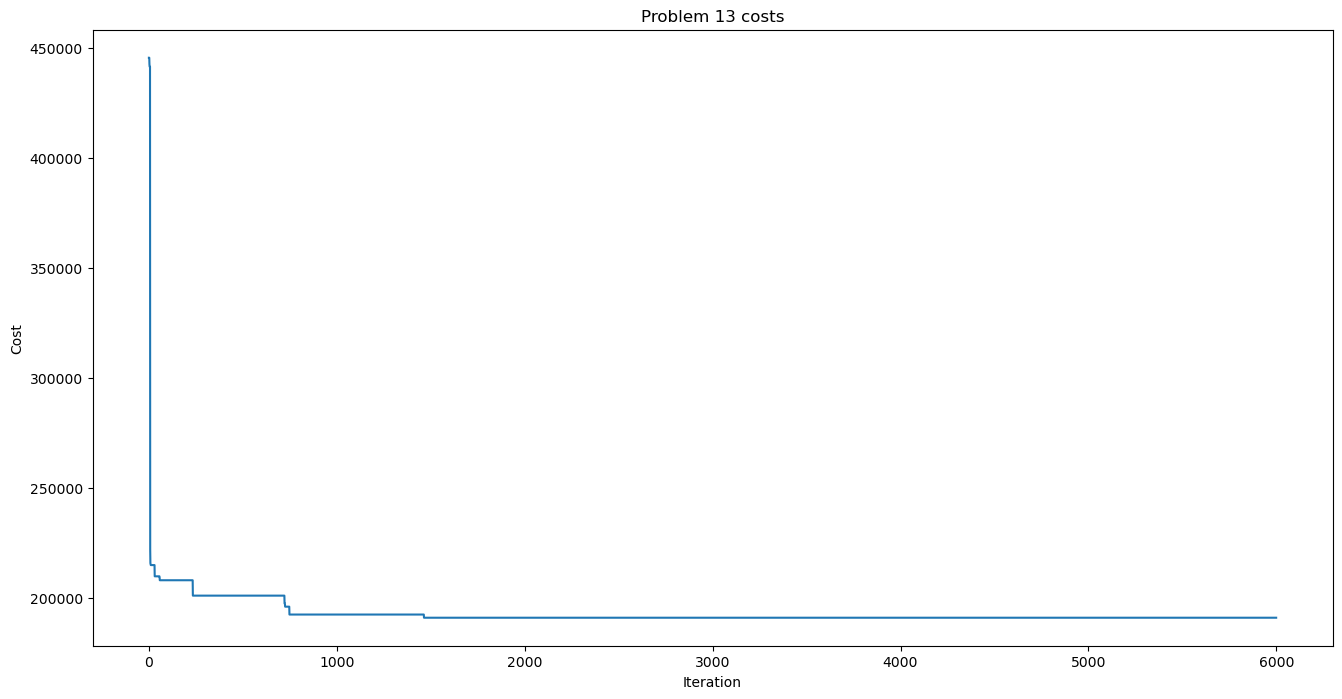

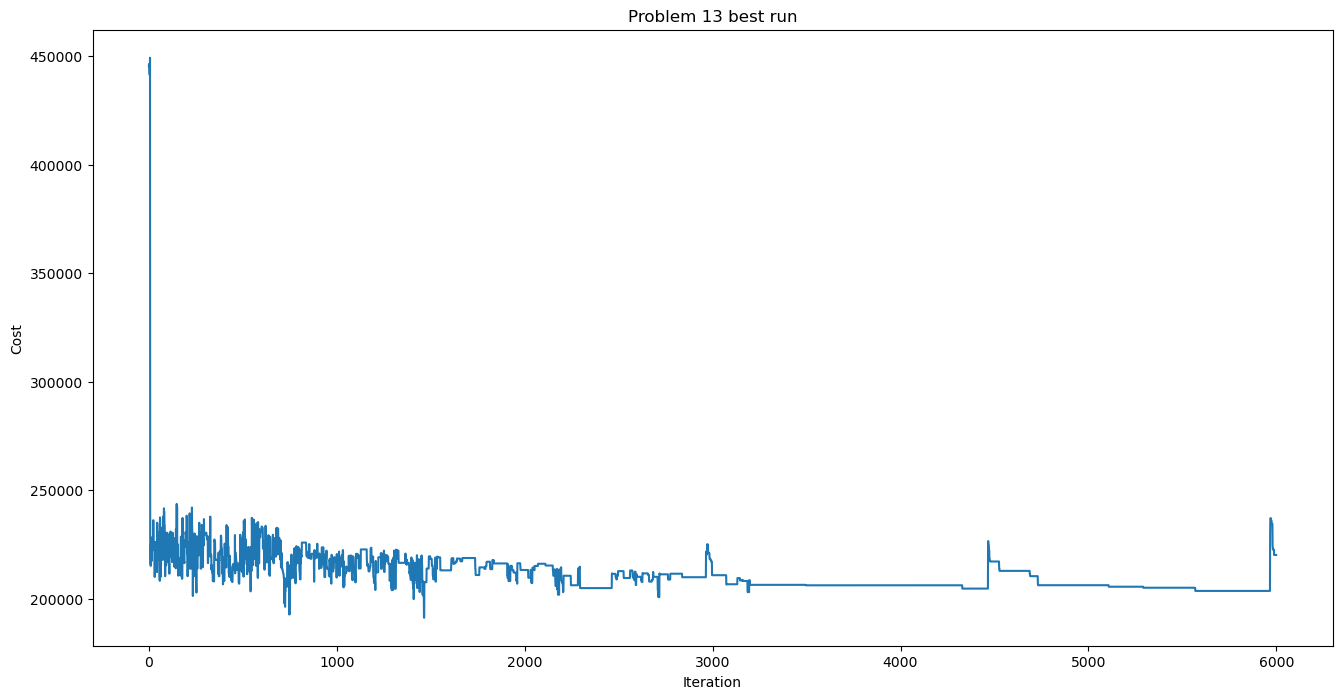

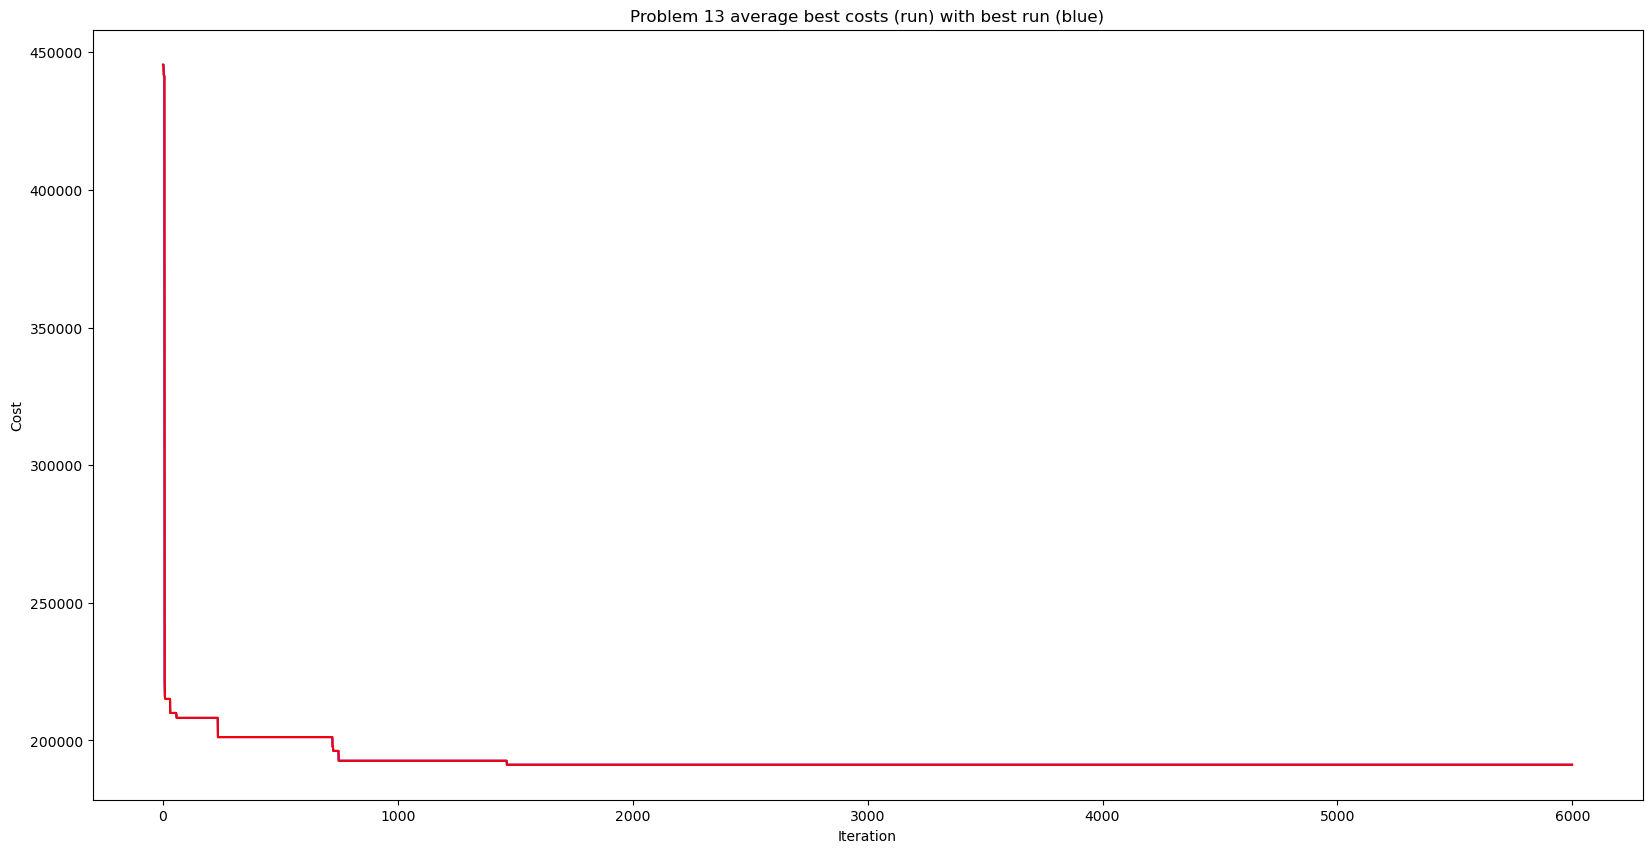



Problem 14
Average cost: 178539.37
Best cost: 178539.37
Final improvement: 4059.0
Average time: 204.21117305755615


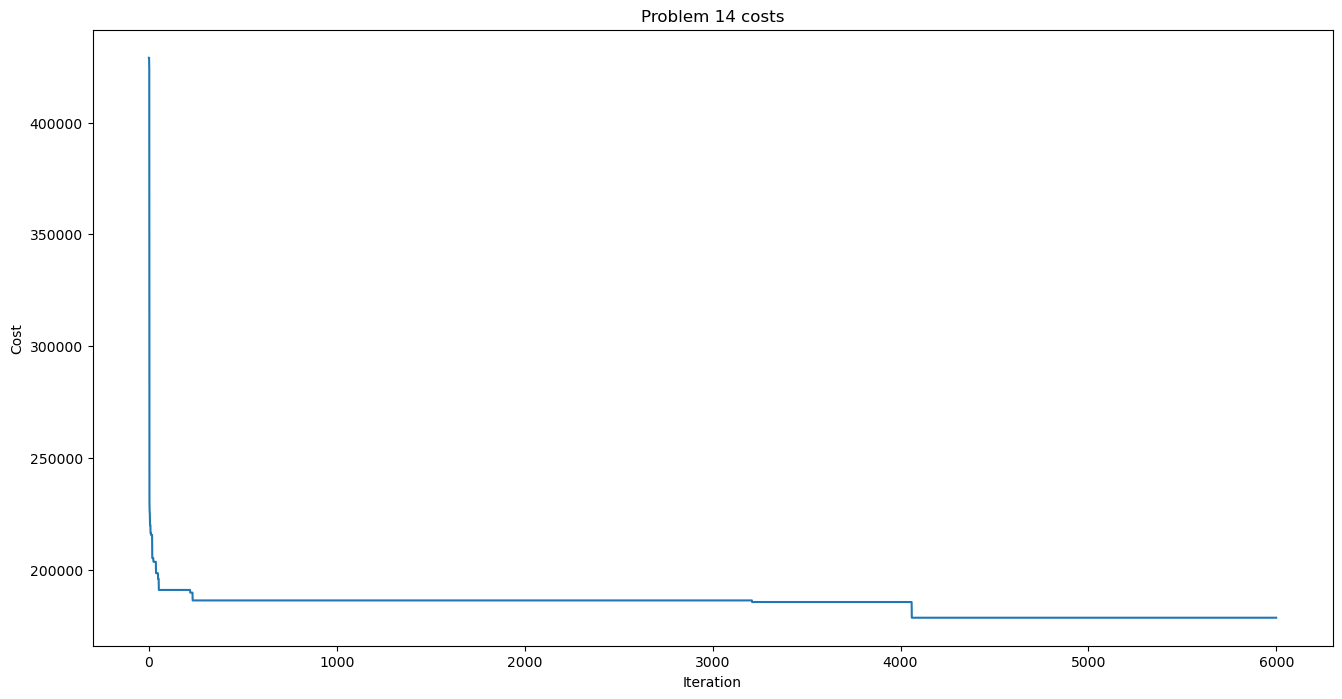

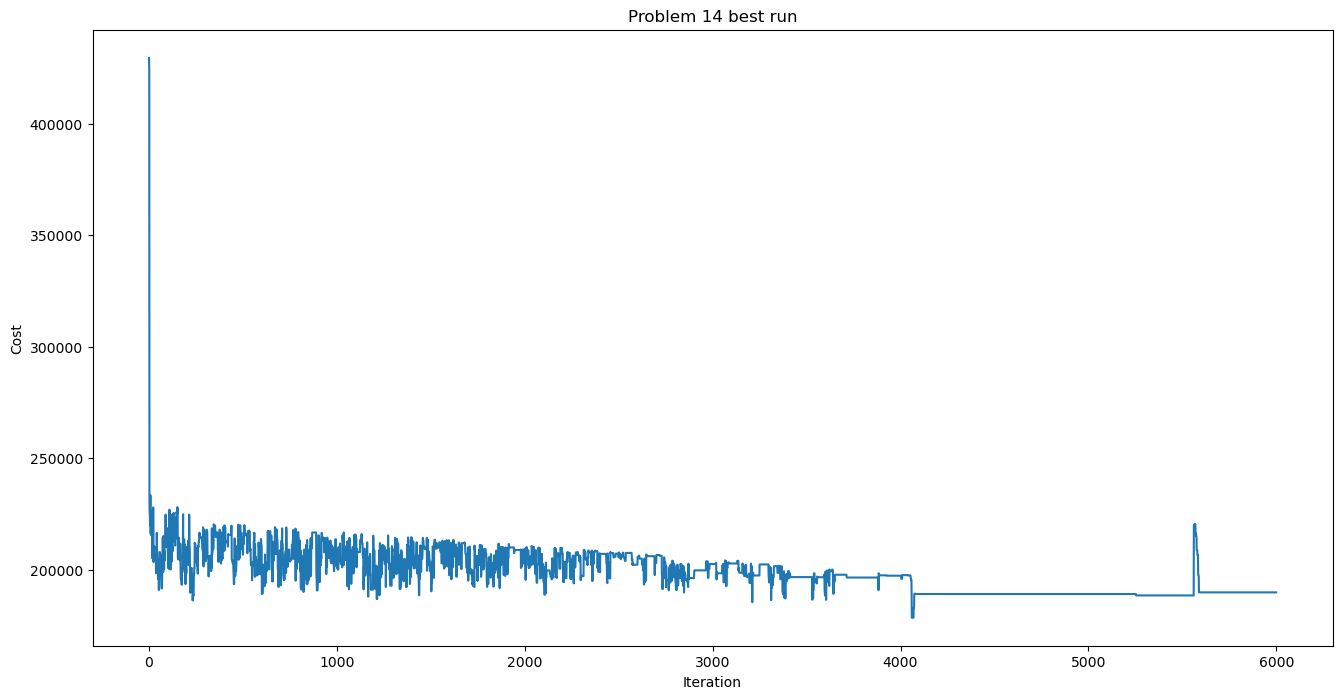

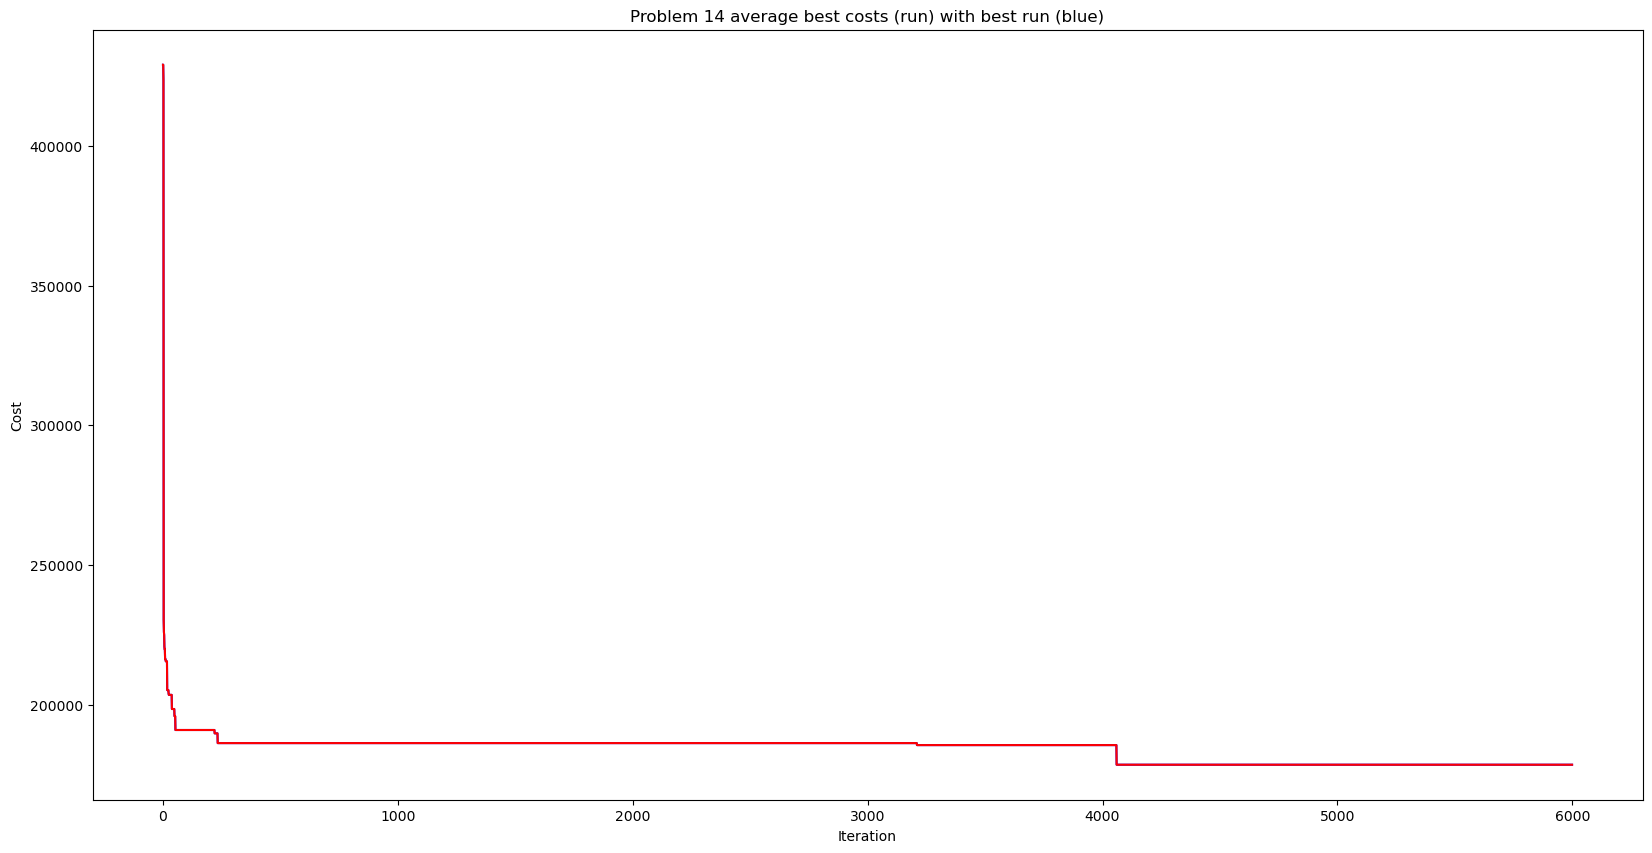



Problem 15
Average cost: 192323.245
Best cost: 192323.245
Final improvement: 109.0
Average time: 196.88065314292908


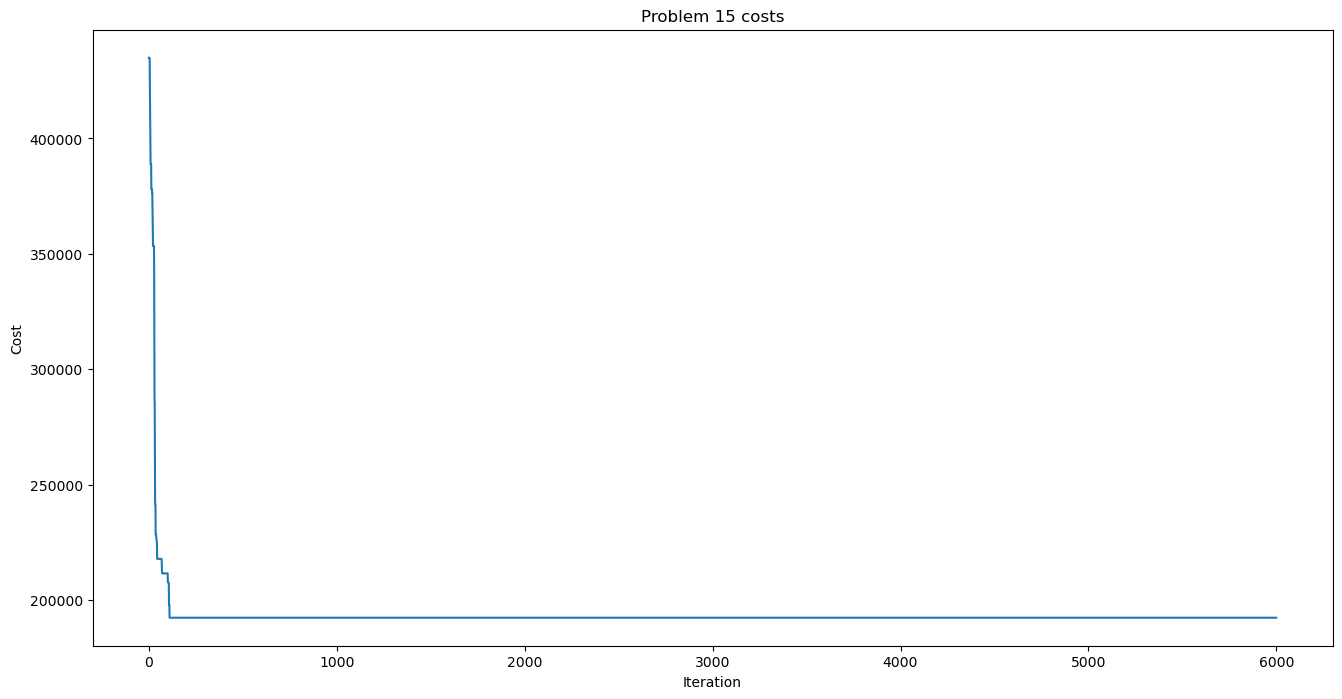

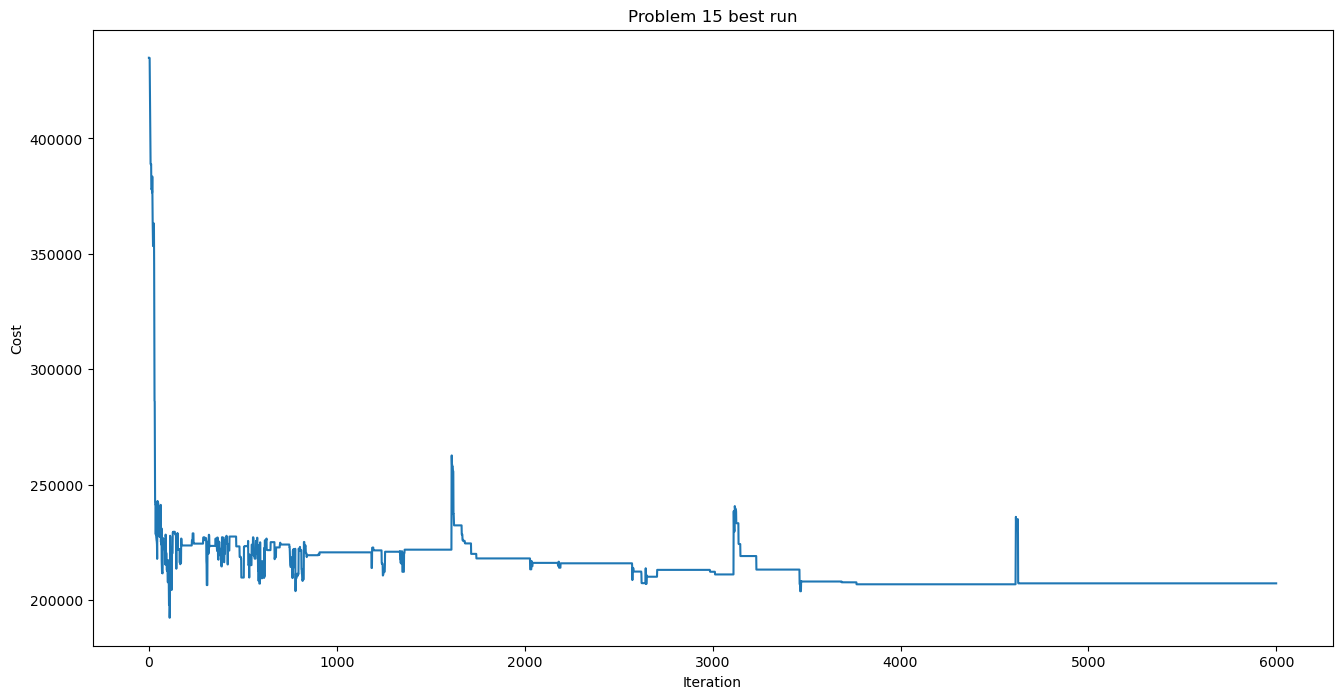

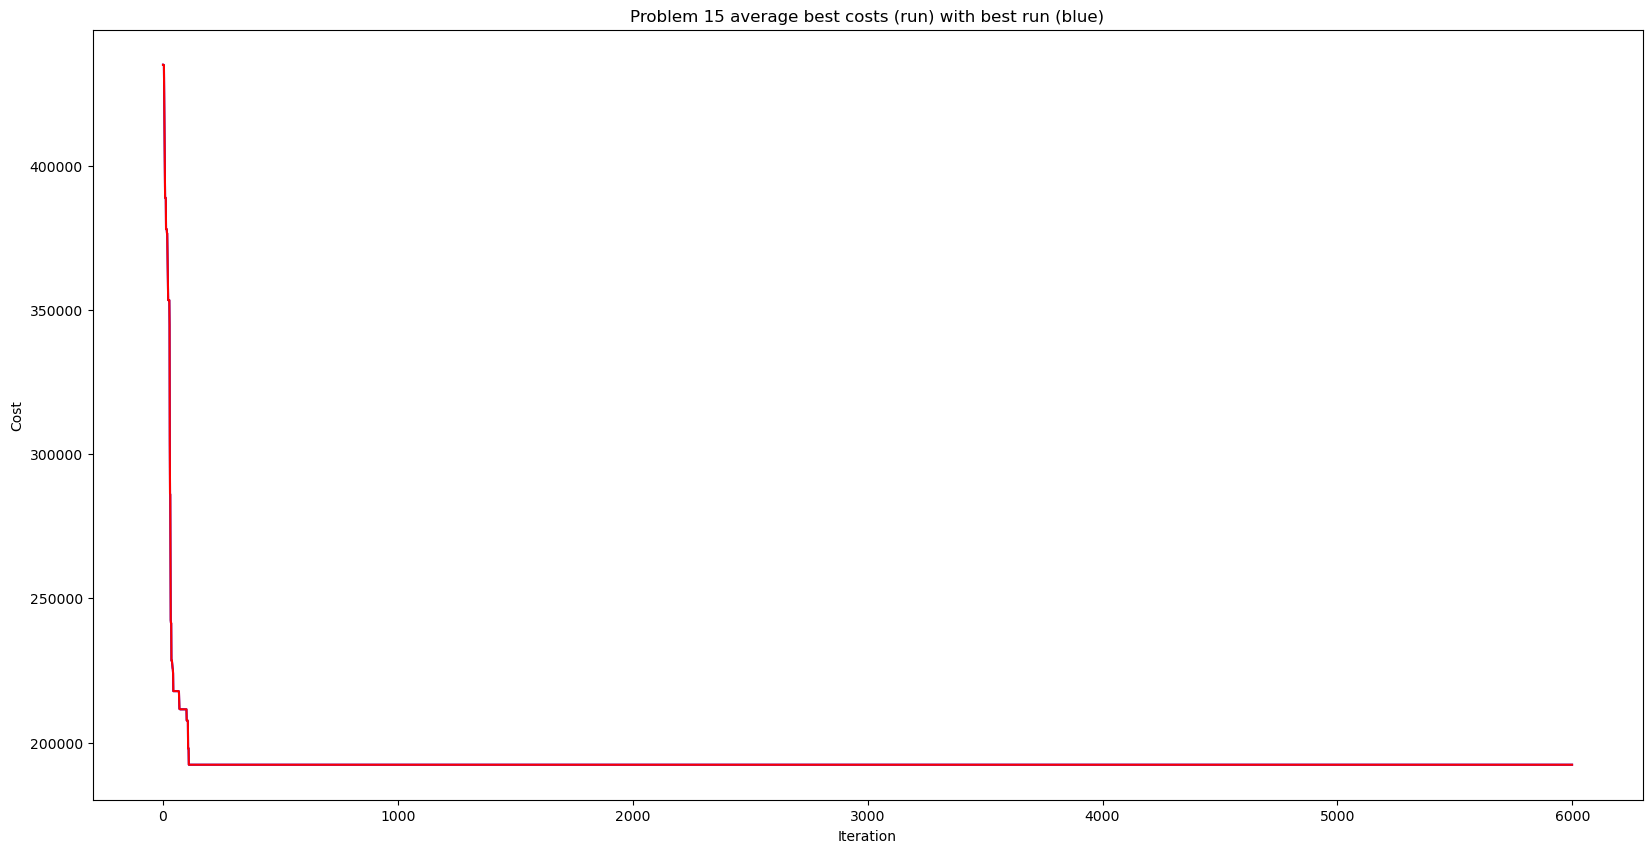



Problem 16
Average cost: 301033.895
Best cost: 301033.895
Final improvement: 569.0
Average time: 310.50392508506775


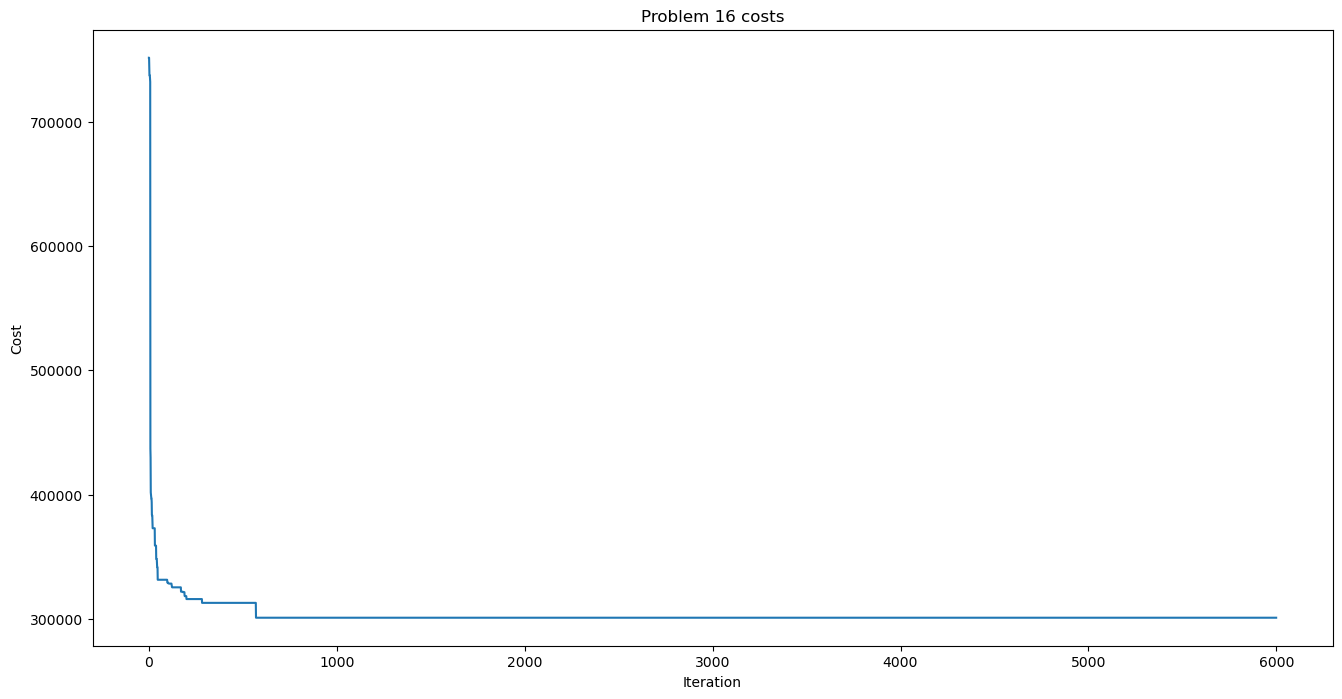

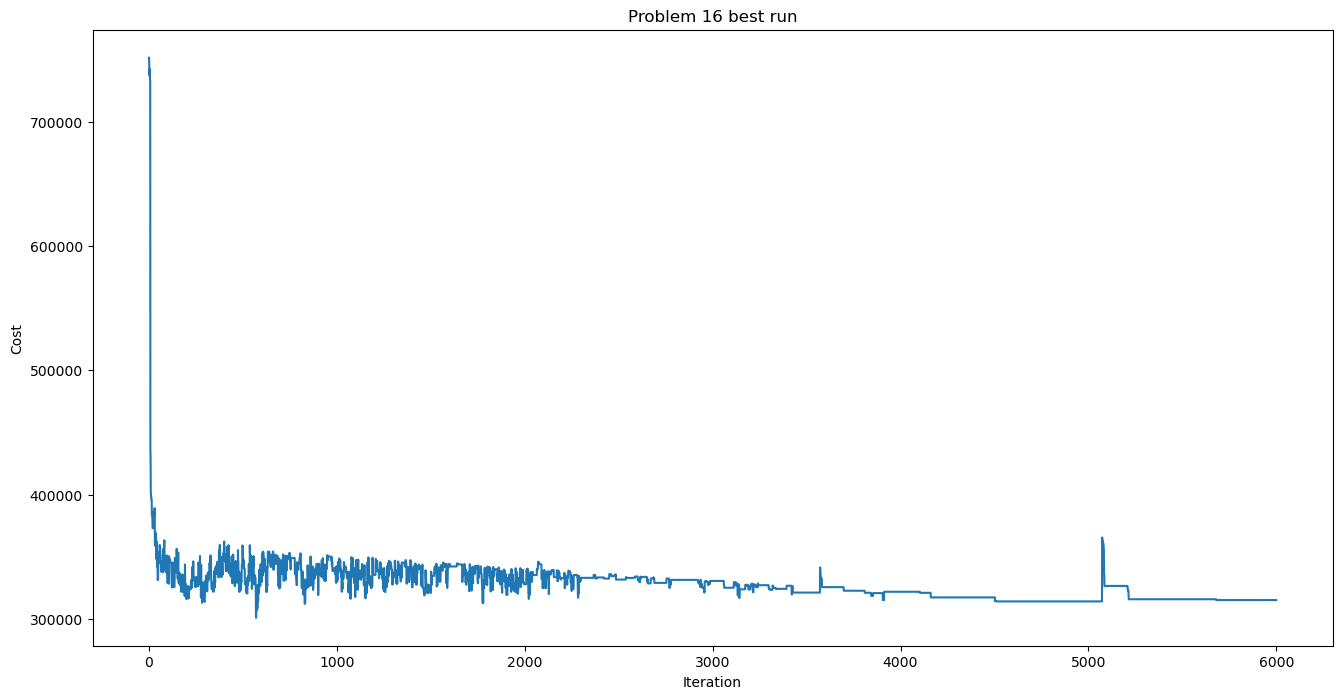

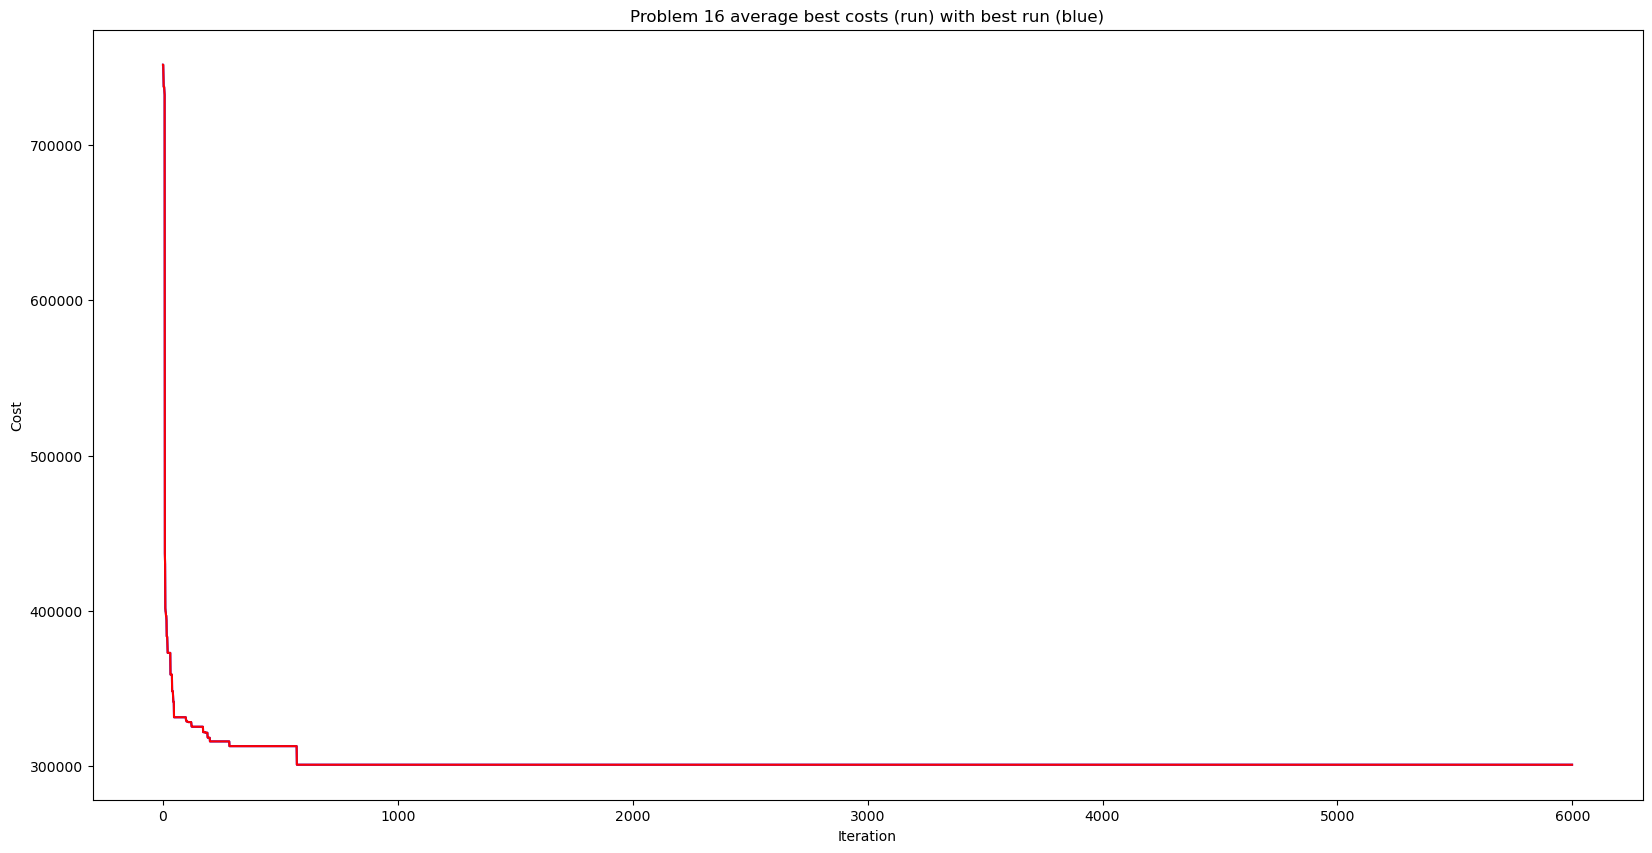



Problem 17
Average cost: 350770.28500000003
Best cost: 350770.28500000003
Final improvement: 972.0
Average time: 286.62758588790894


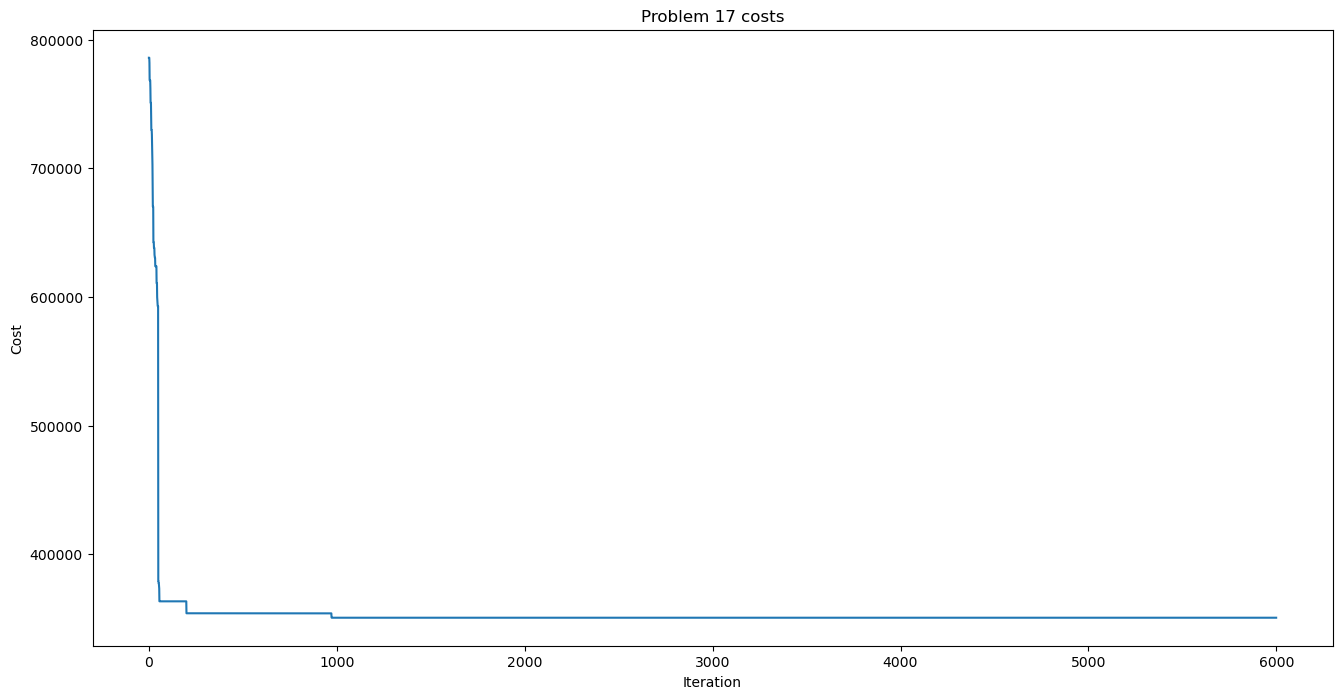

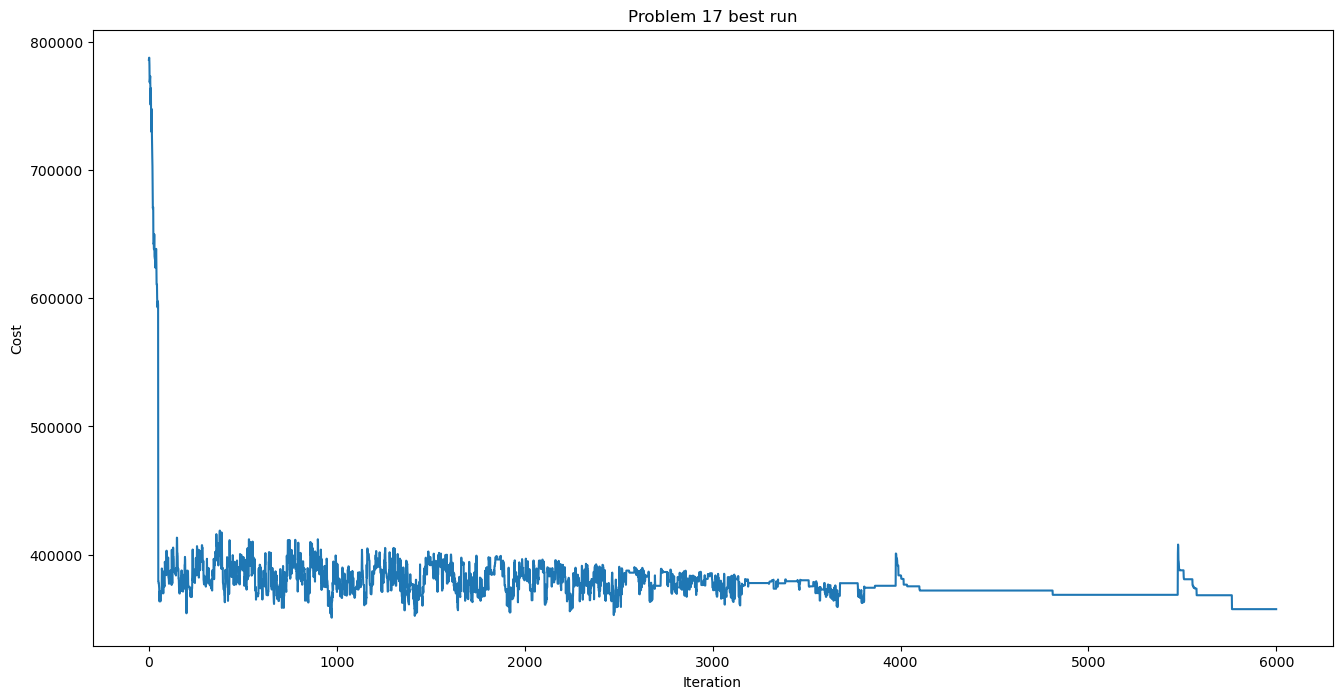

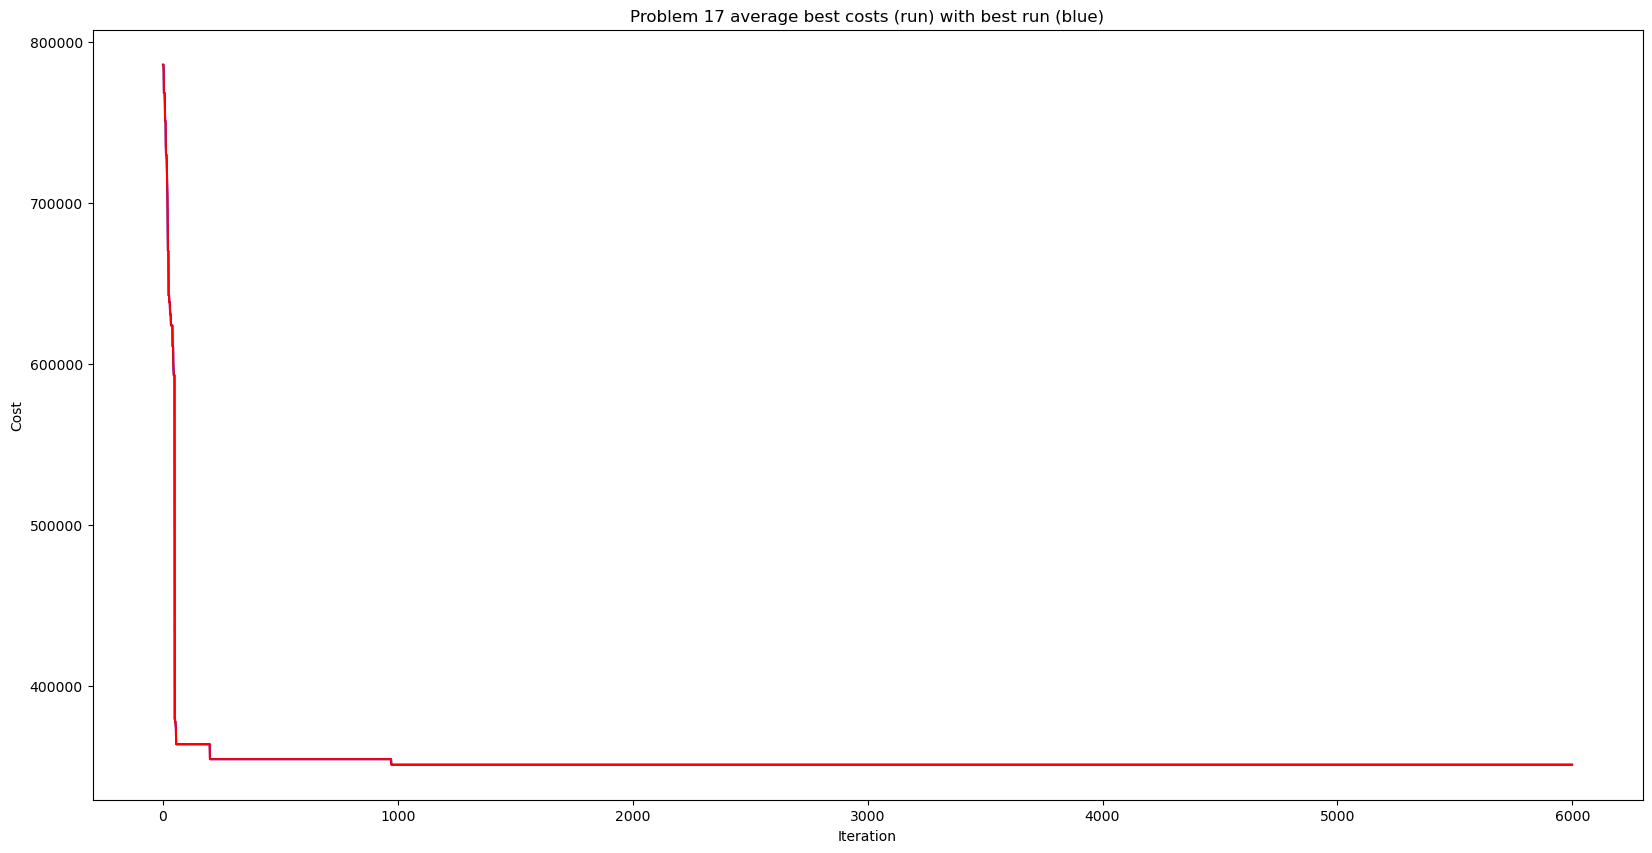



Problem 18
Average cost: 350808.92000000004
Best cost: 350808.92000000004
Final improvement: 539.0
Average time: 316.79810094833374


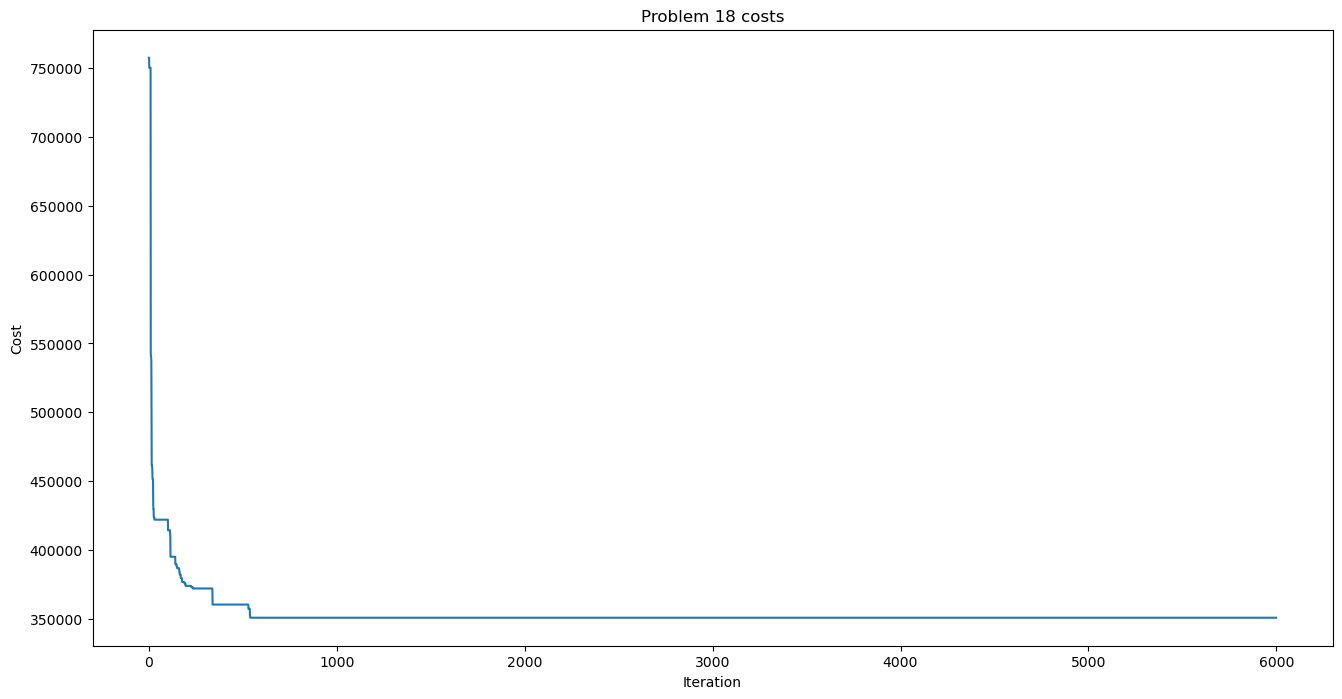

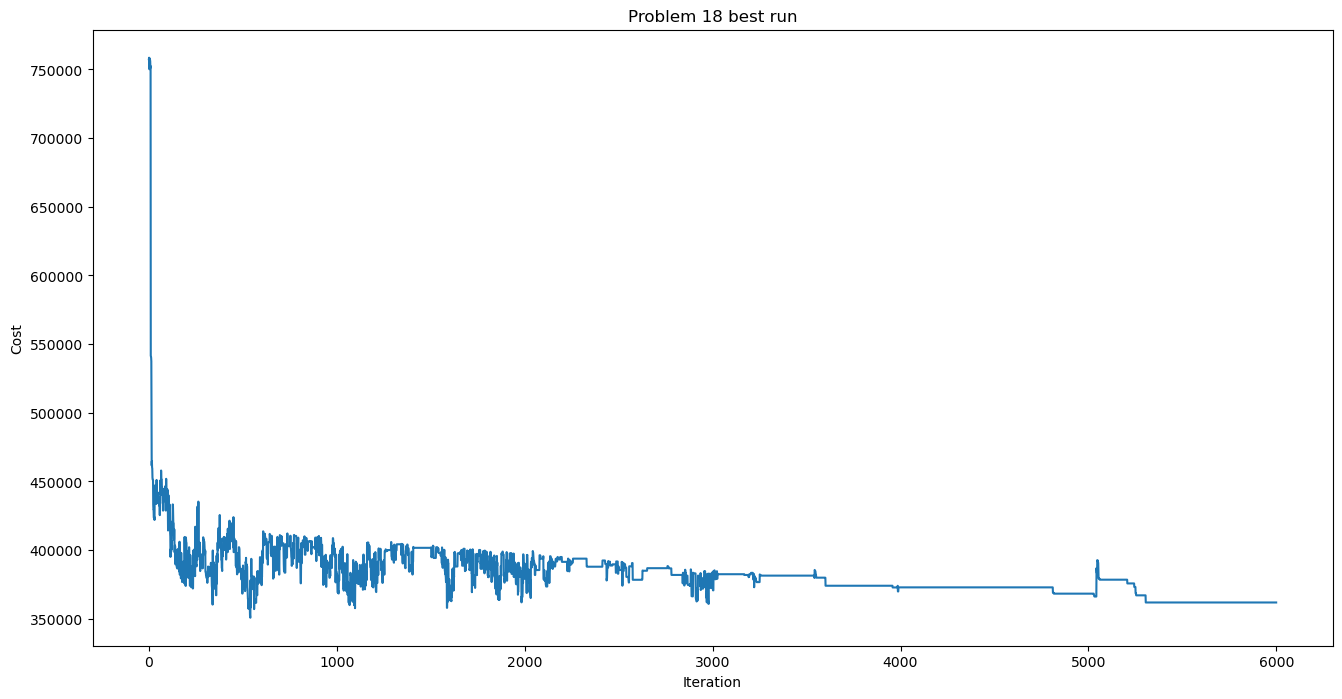

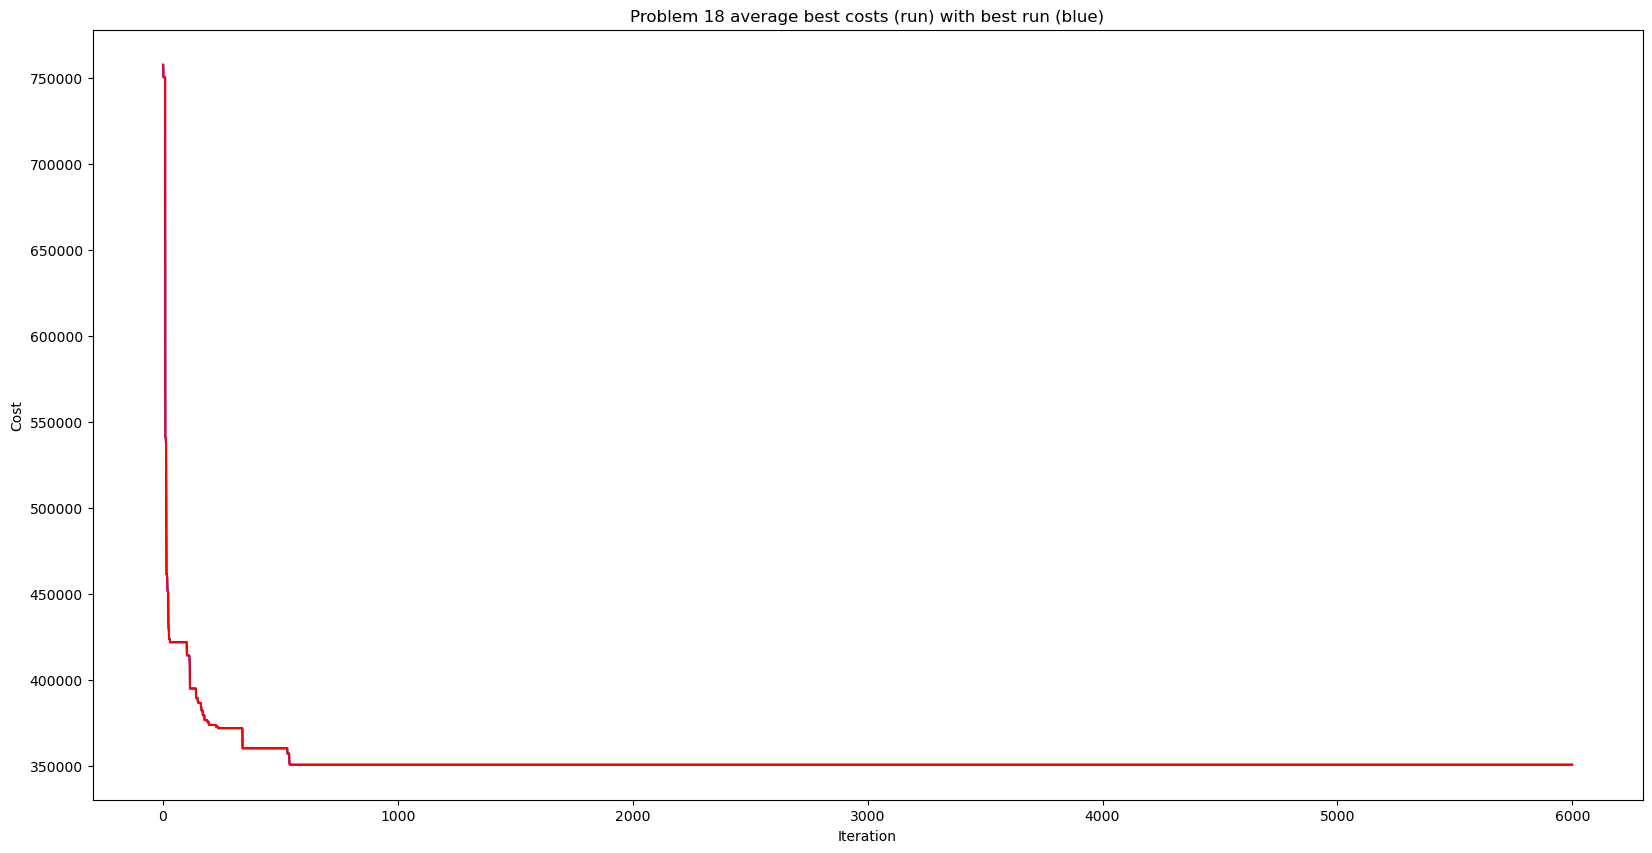



Problem 19
Average cost: 350913.68500000006
Best cost: 350913.68500000006
Final improvement: 2798.0
Average time: 286.46715211868286


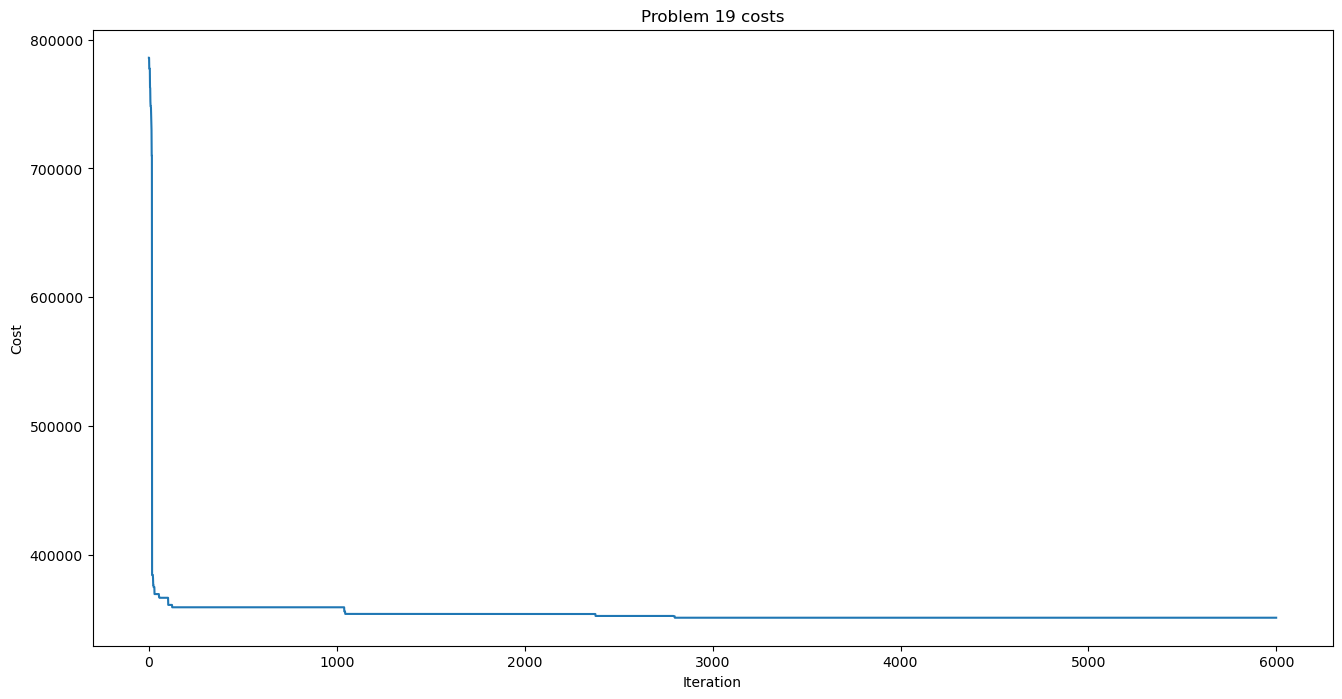

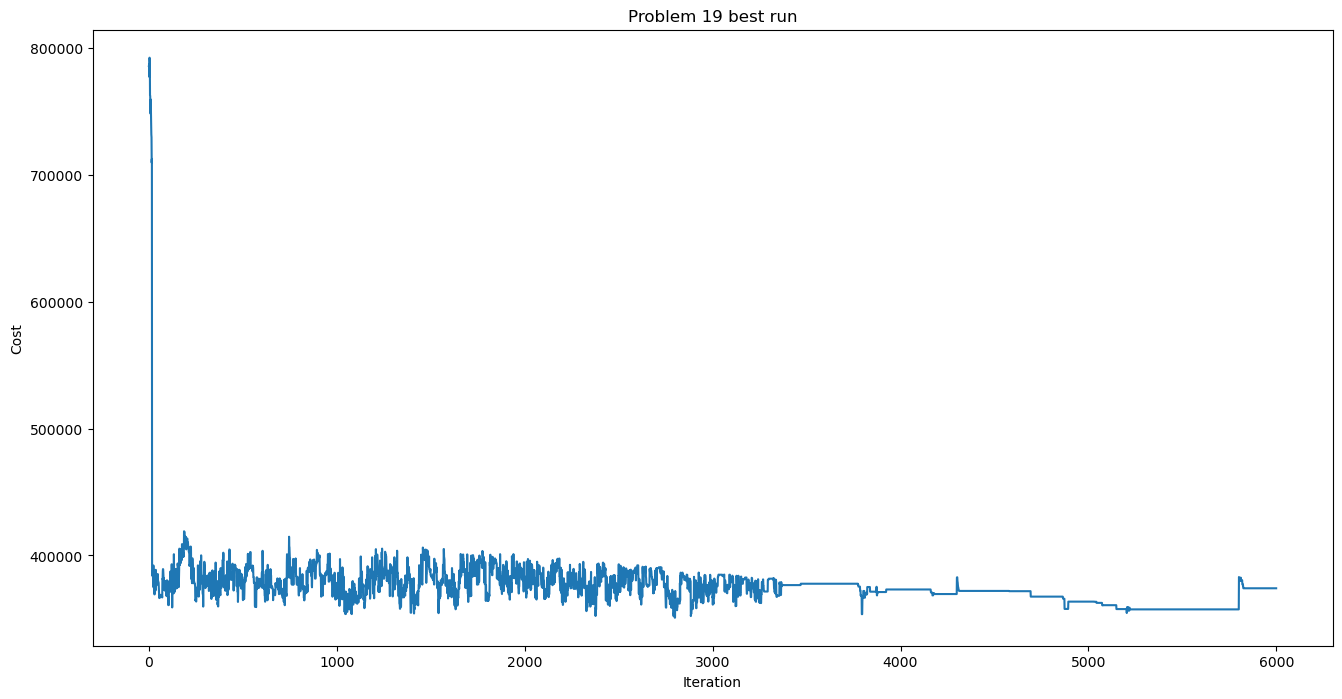

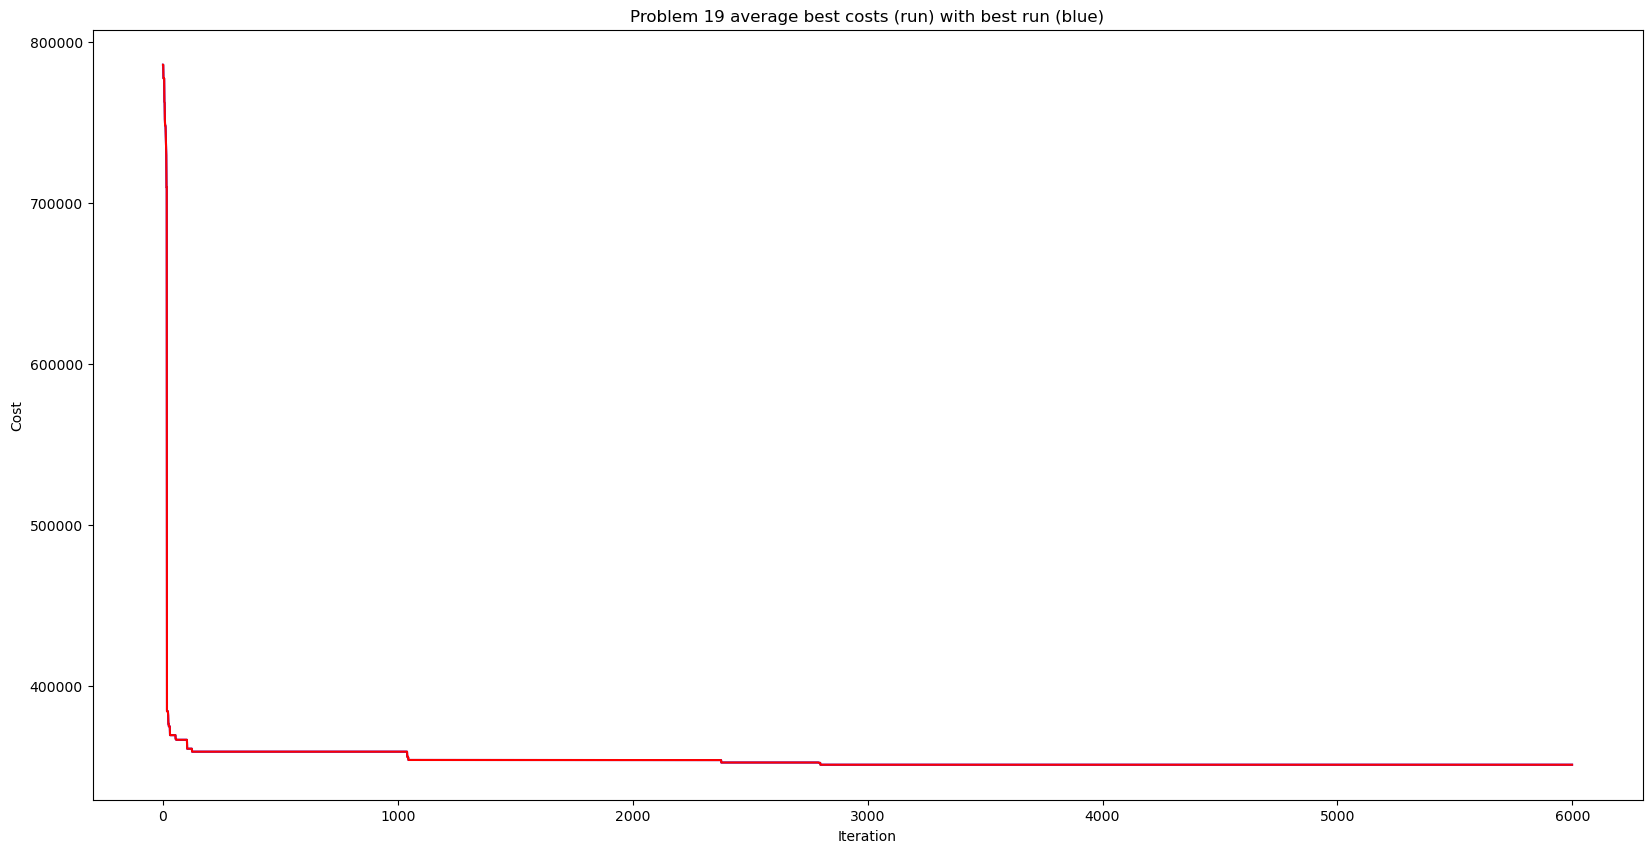



Problem 20
Average cost: 364371.99
Best cost: 364371.99
Final improvement: 2909.0
Average time: 278.0305562019348


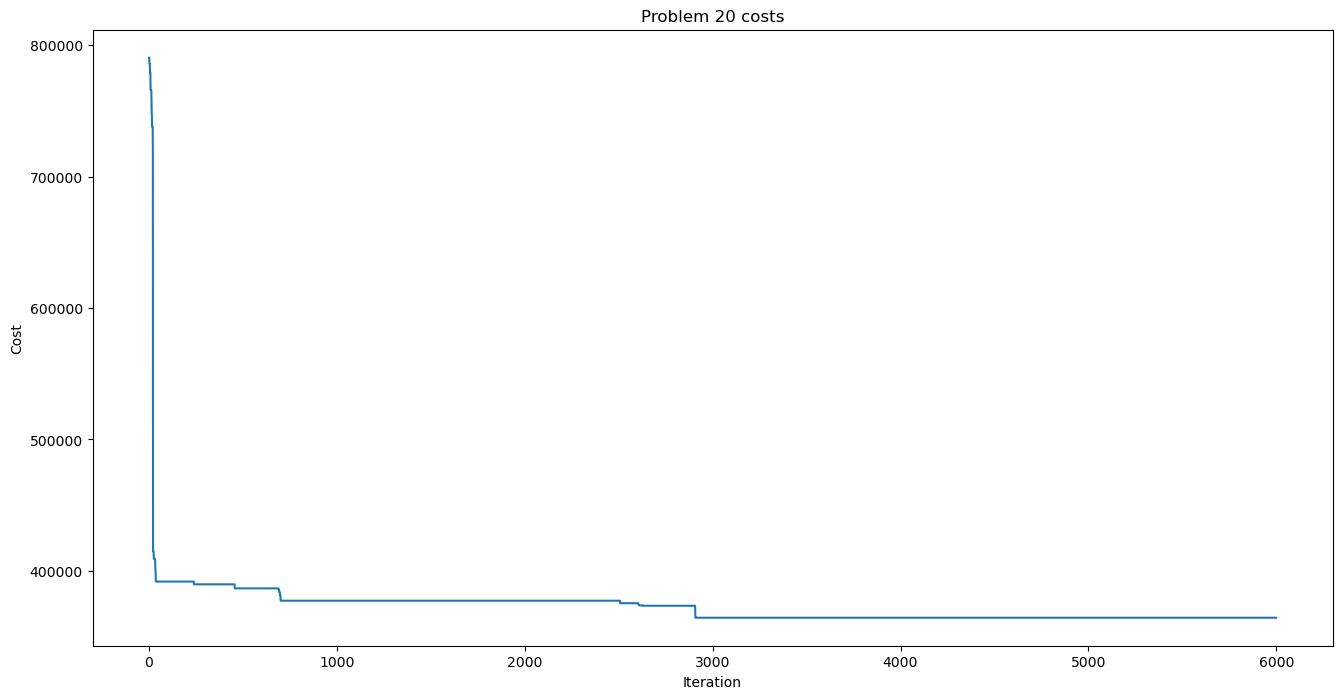

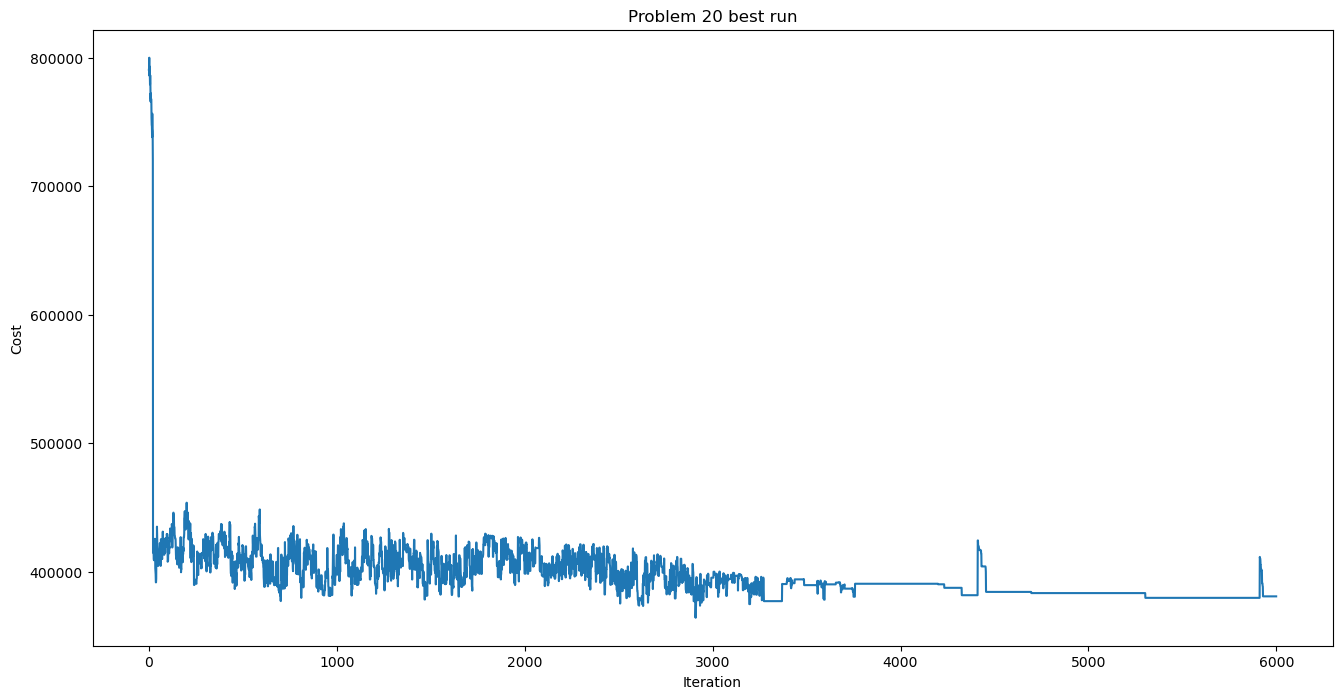

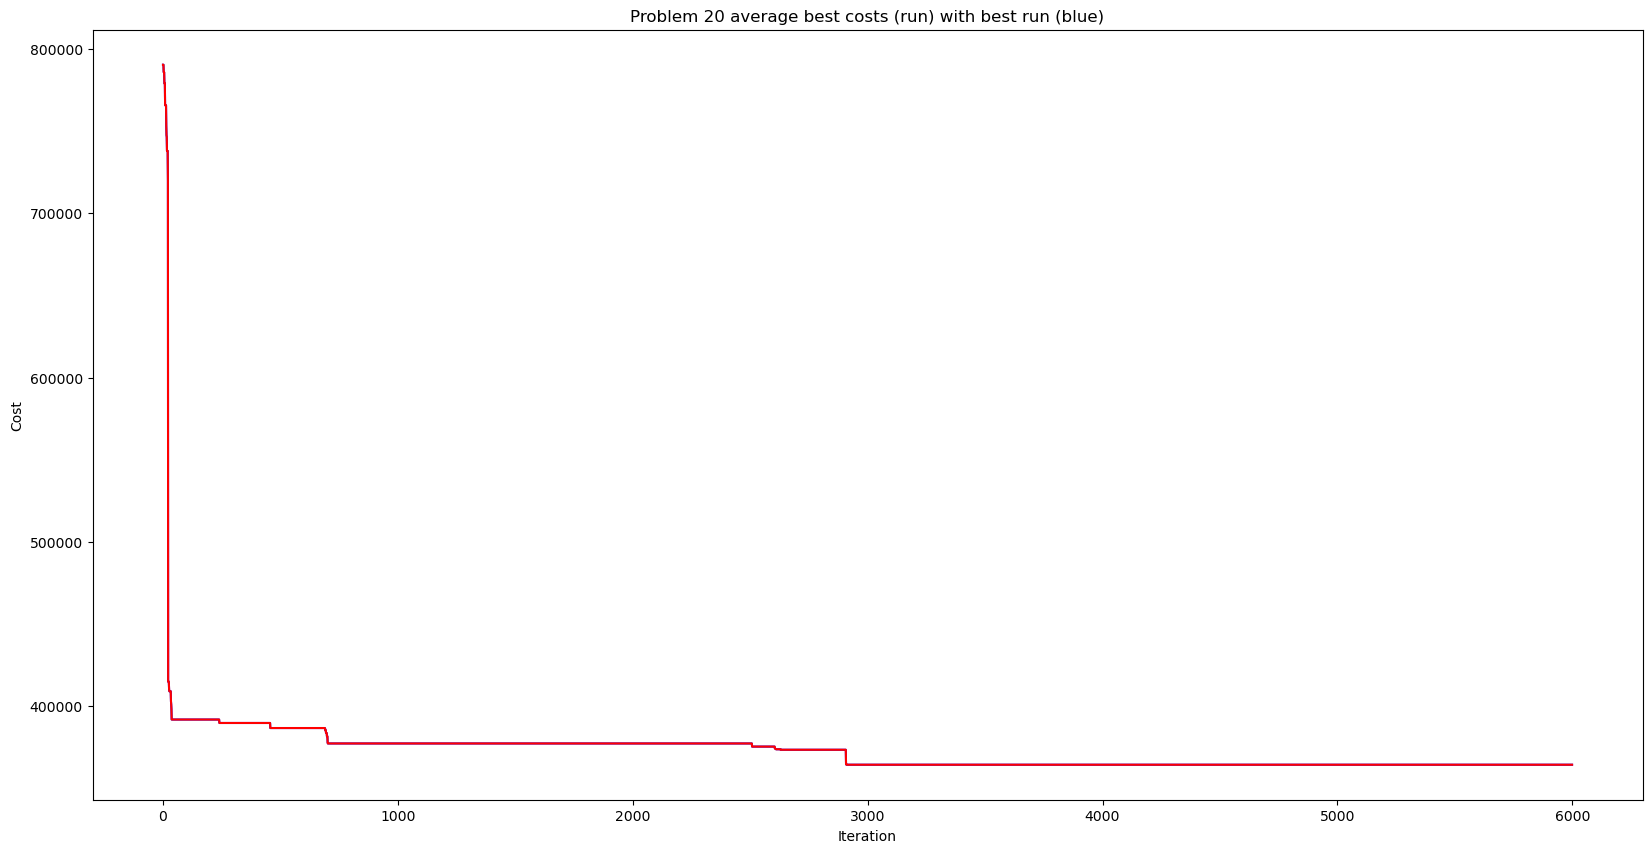



Problem 21
Average cost: 522160.54999999993
Best cost: 522160.54999999993
Final improvement: 8.0
Average time: 590.3576941490173


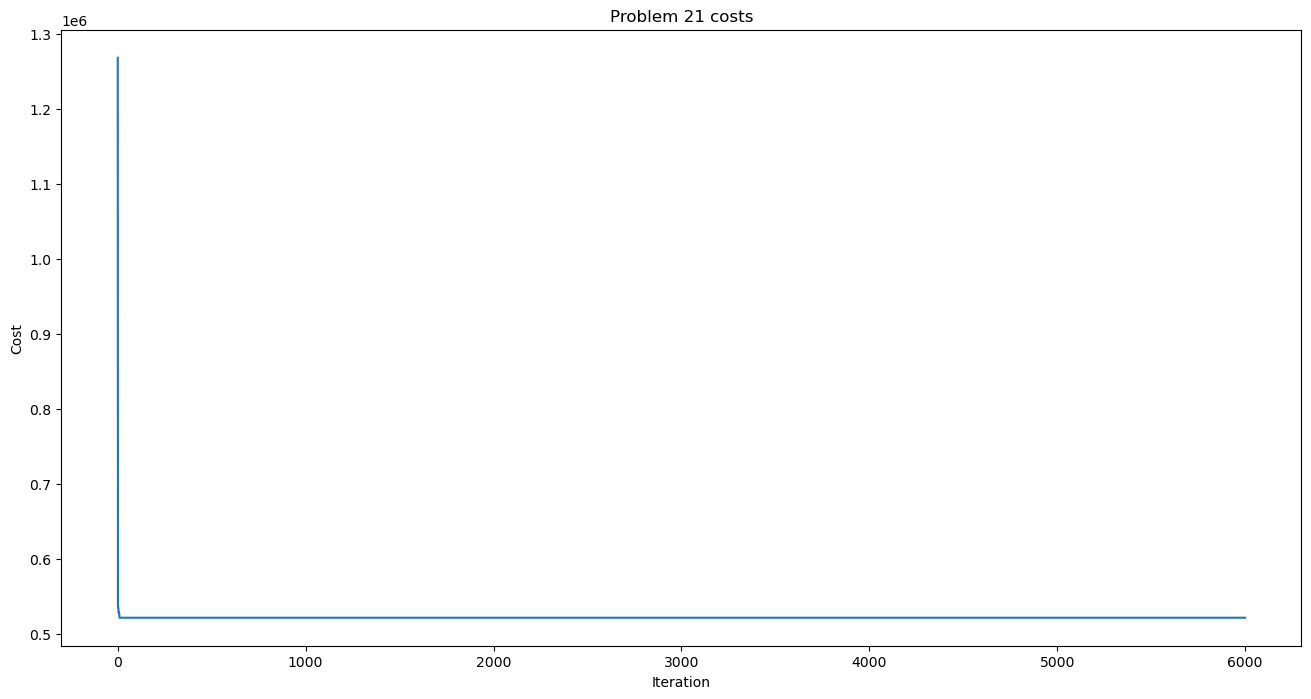

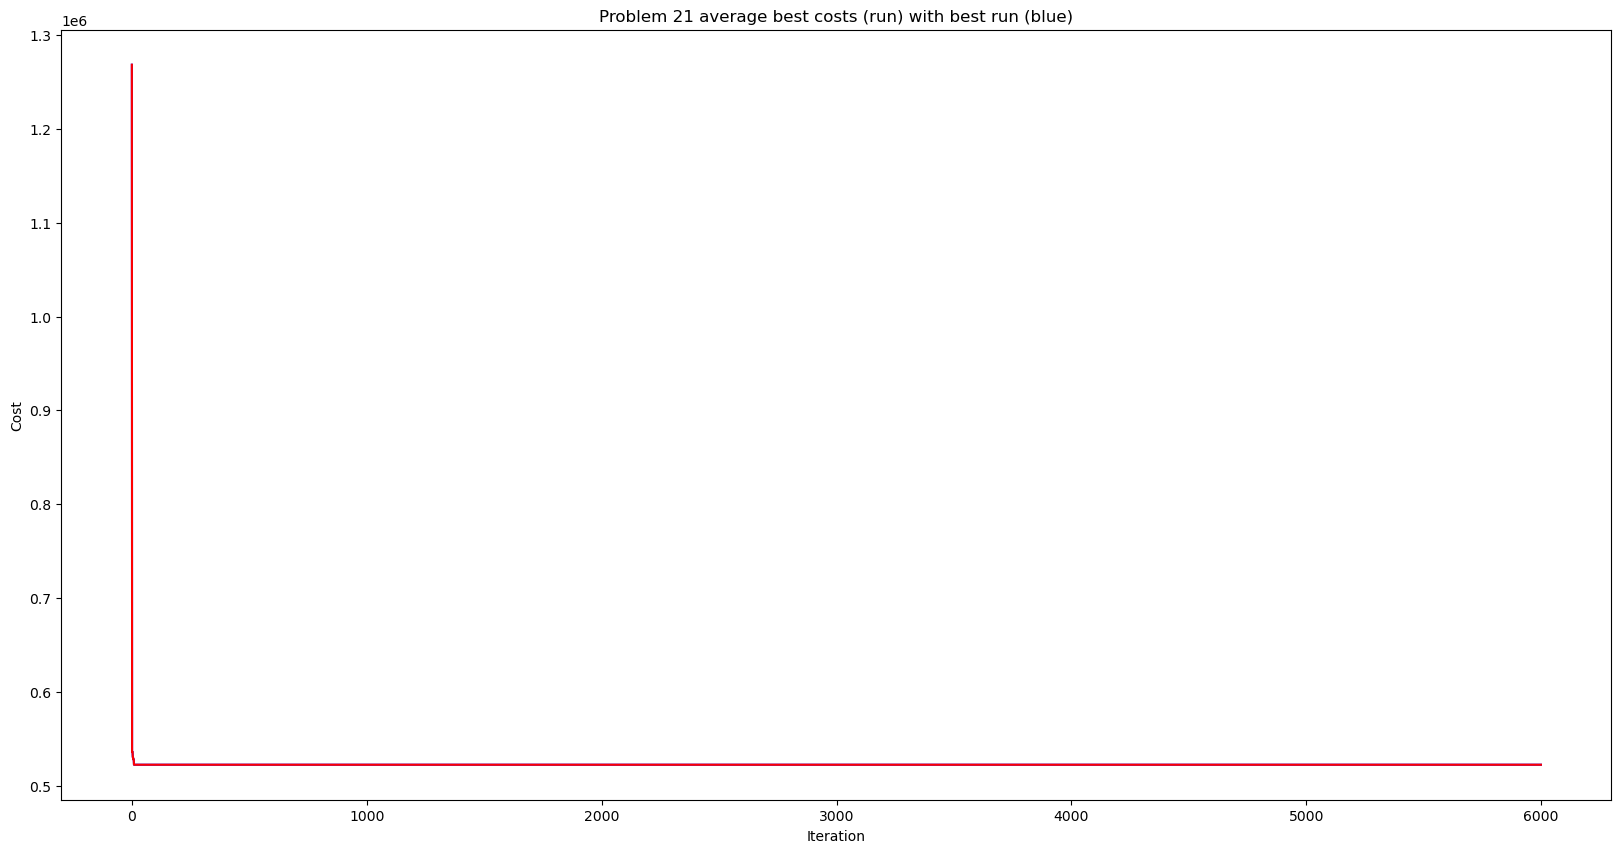



Problem 22
Average cost: 587338.7649999999
Best cost: 587338.7649999999
Final improvement: 3045.0
Average time: 562.209038734436


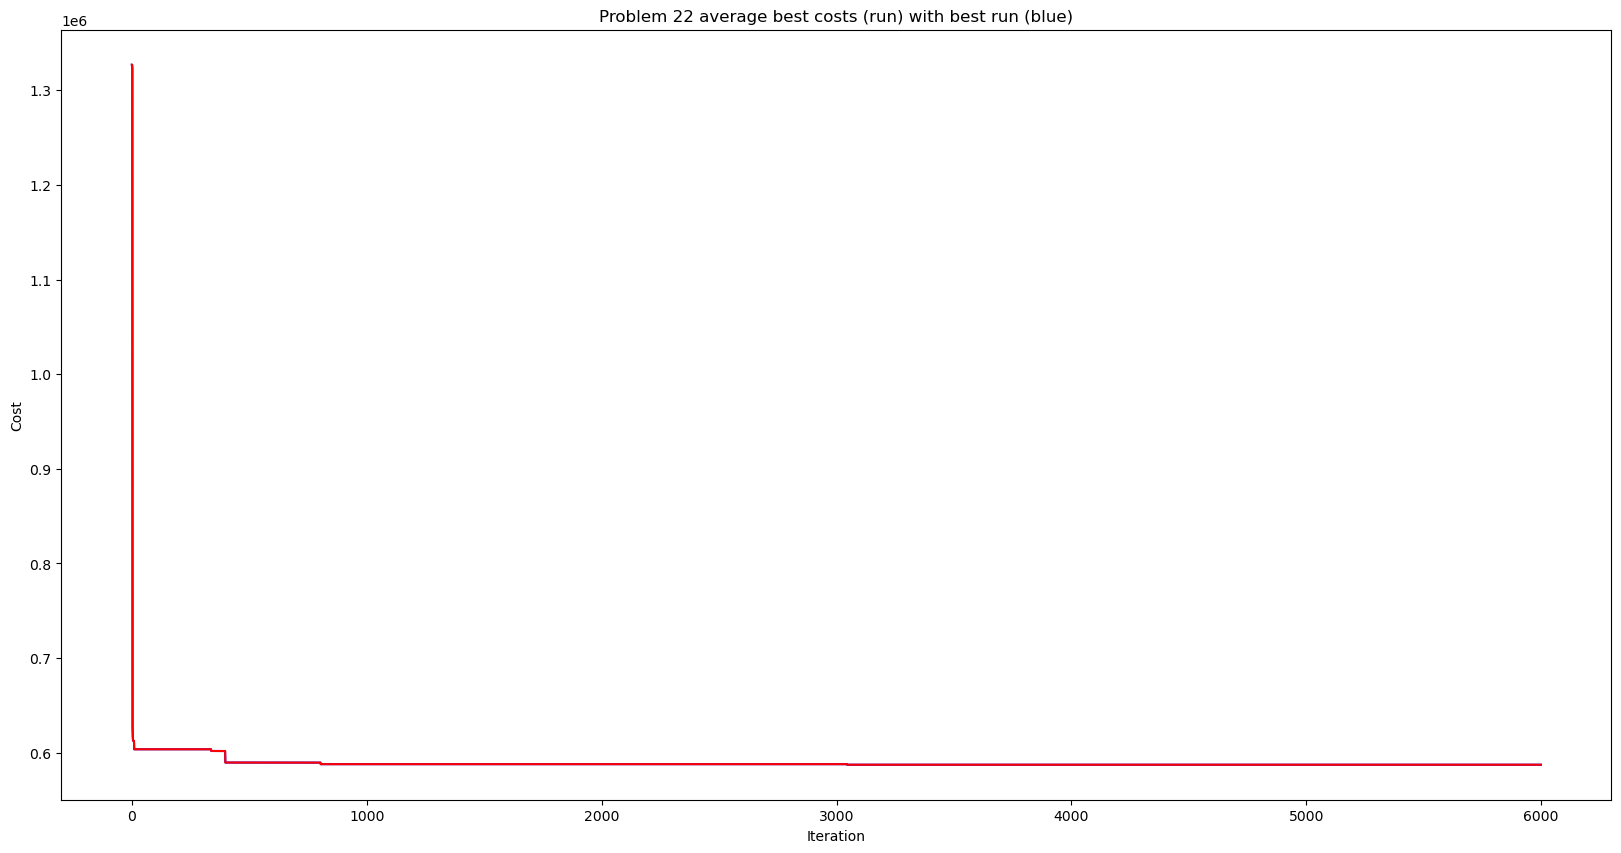



Problem 23
Average cost: 570080.08
Best cost: 570080.08
Final improvement: 269.0
Average time: 579.304221868515


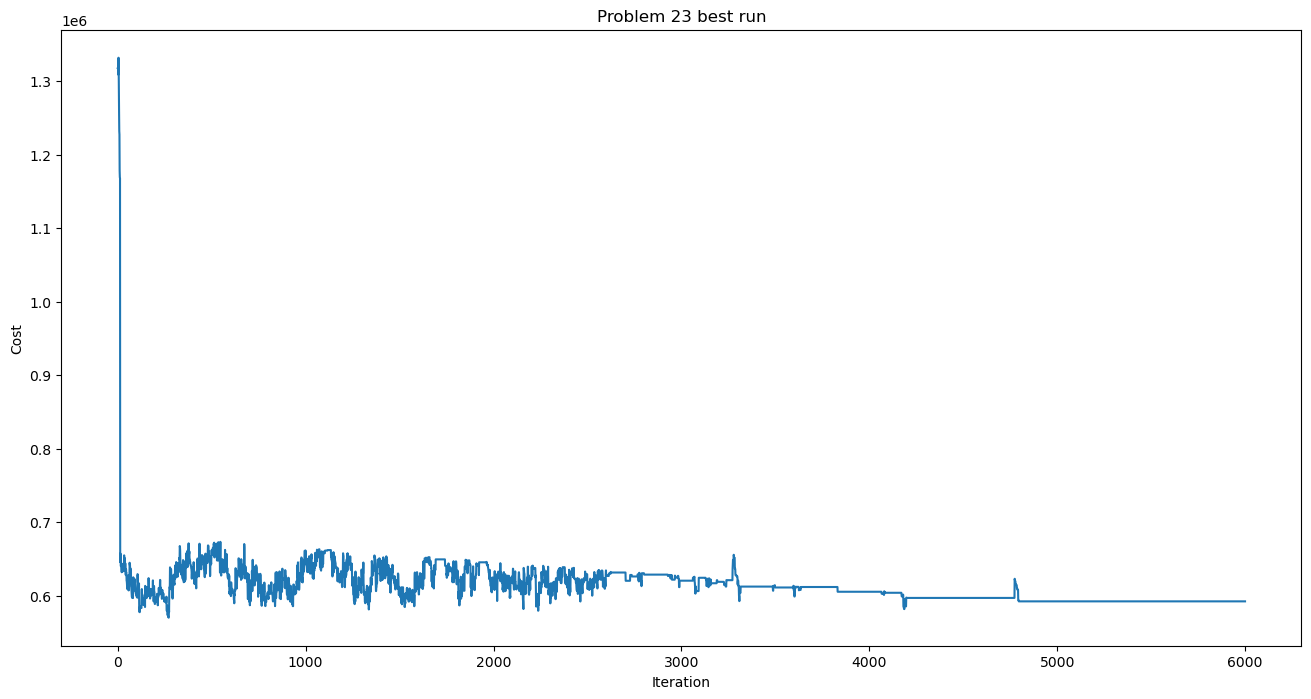



Problem 24
Average cost: 530907.0
Best cost: 530907.0
Final improvement: 1940.0
Average time: 589.1747770309448


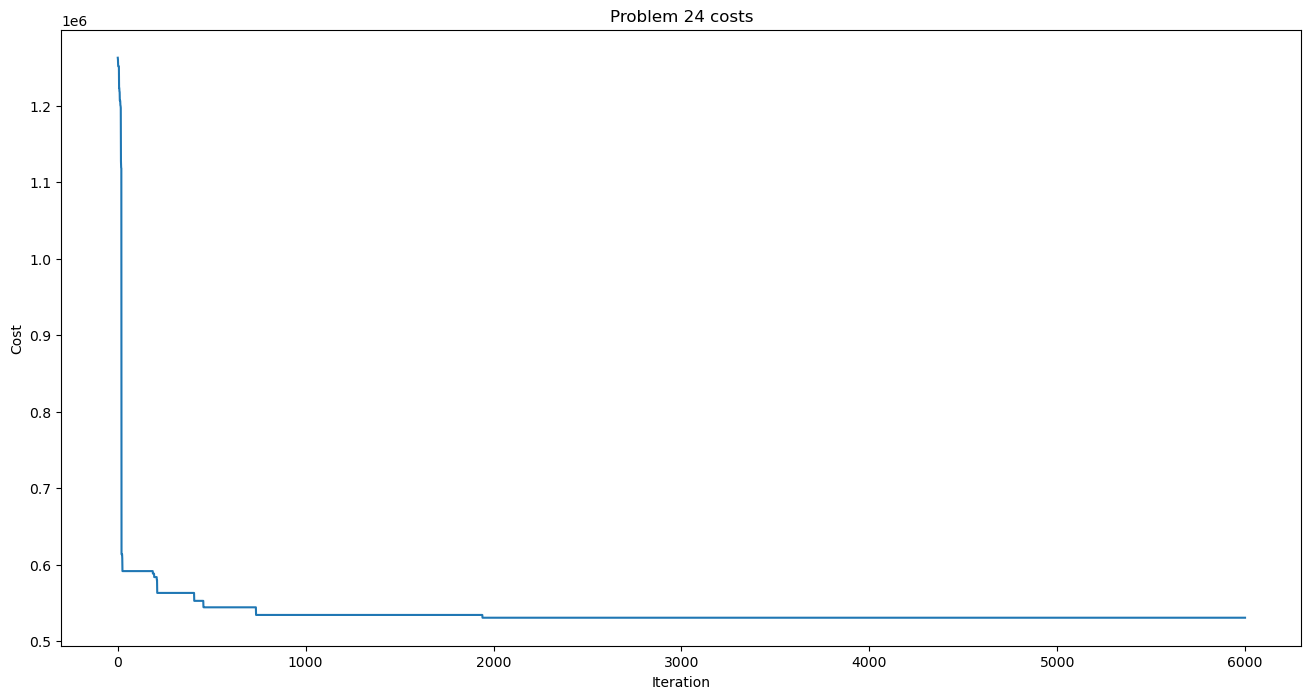

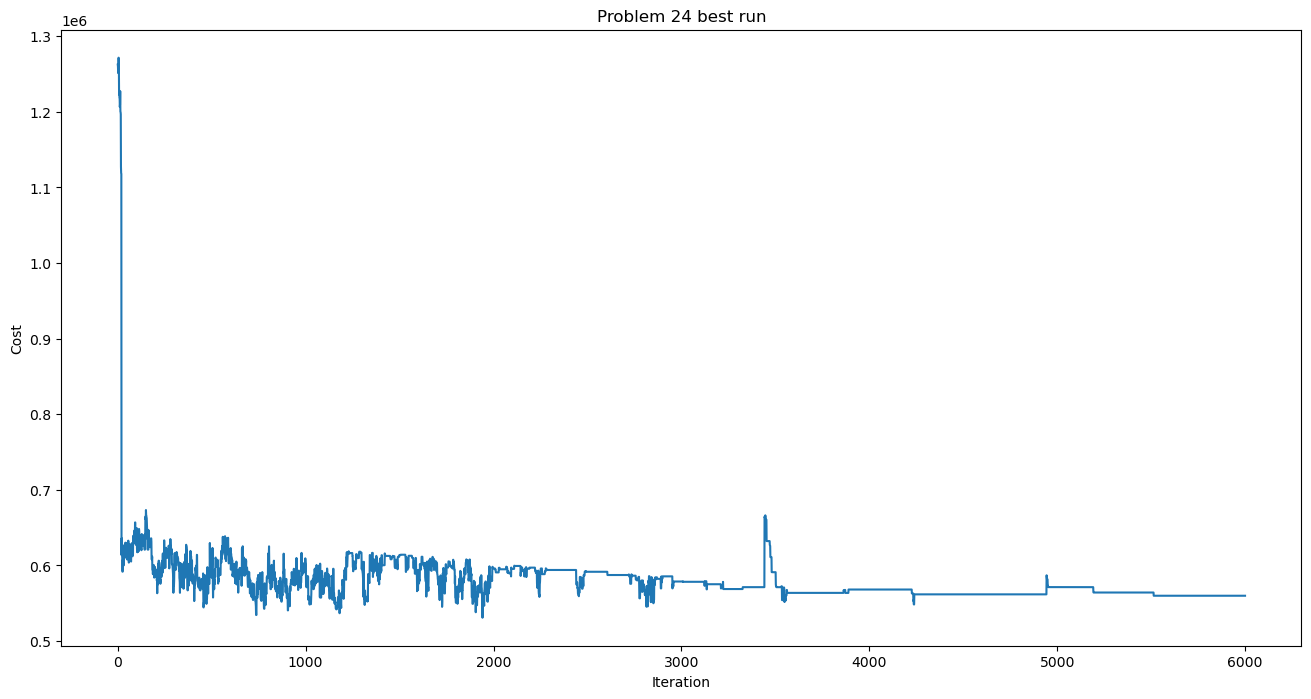

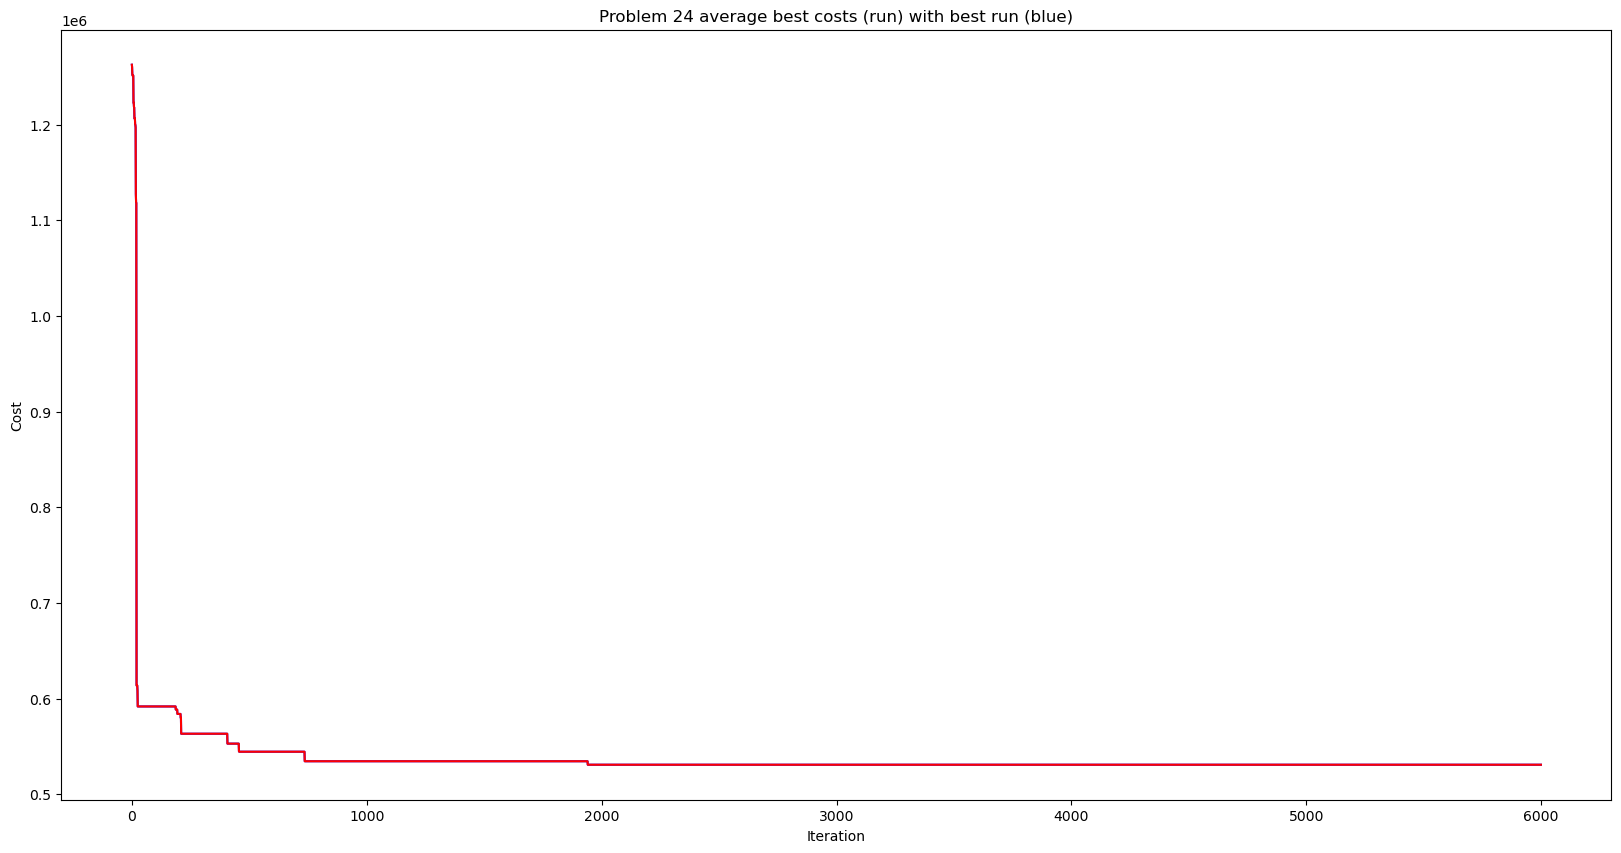



Problem 25
Average cost: 601344.4600000001
Best cost: 601344.4600000001
Final improvement: 76.0
Average time: 566.7610311508179


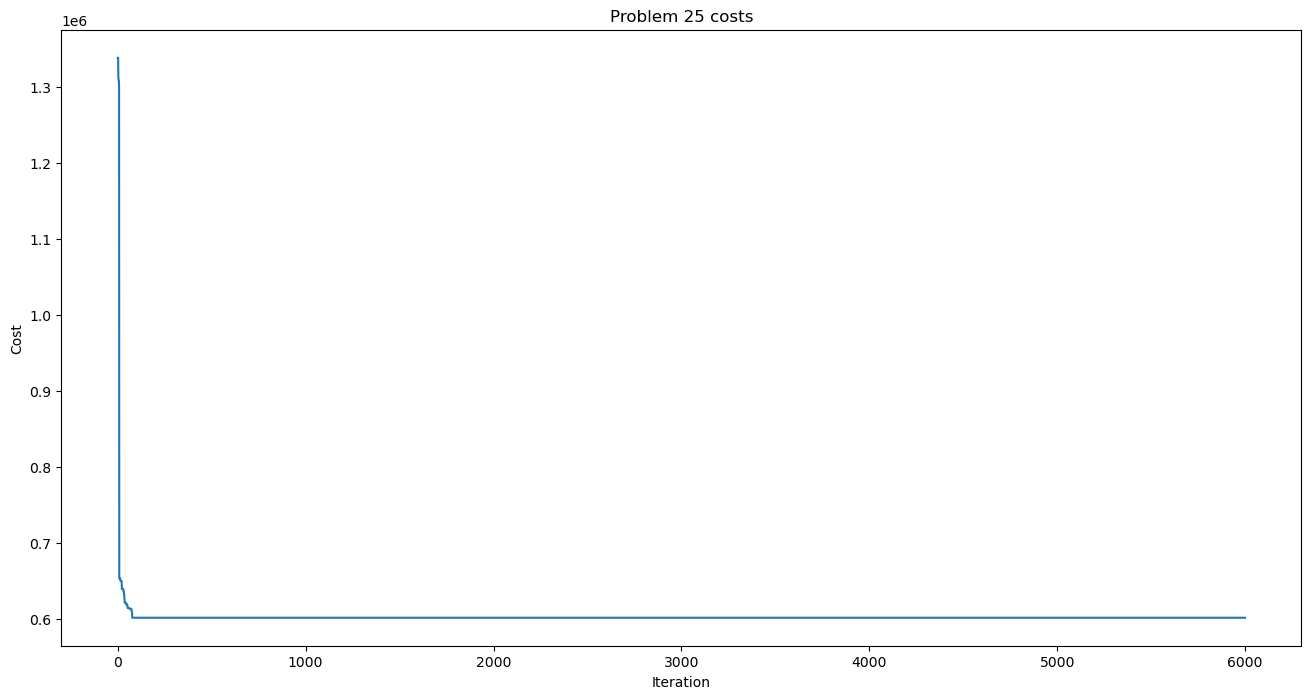

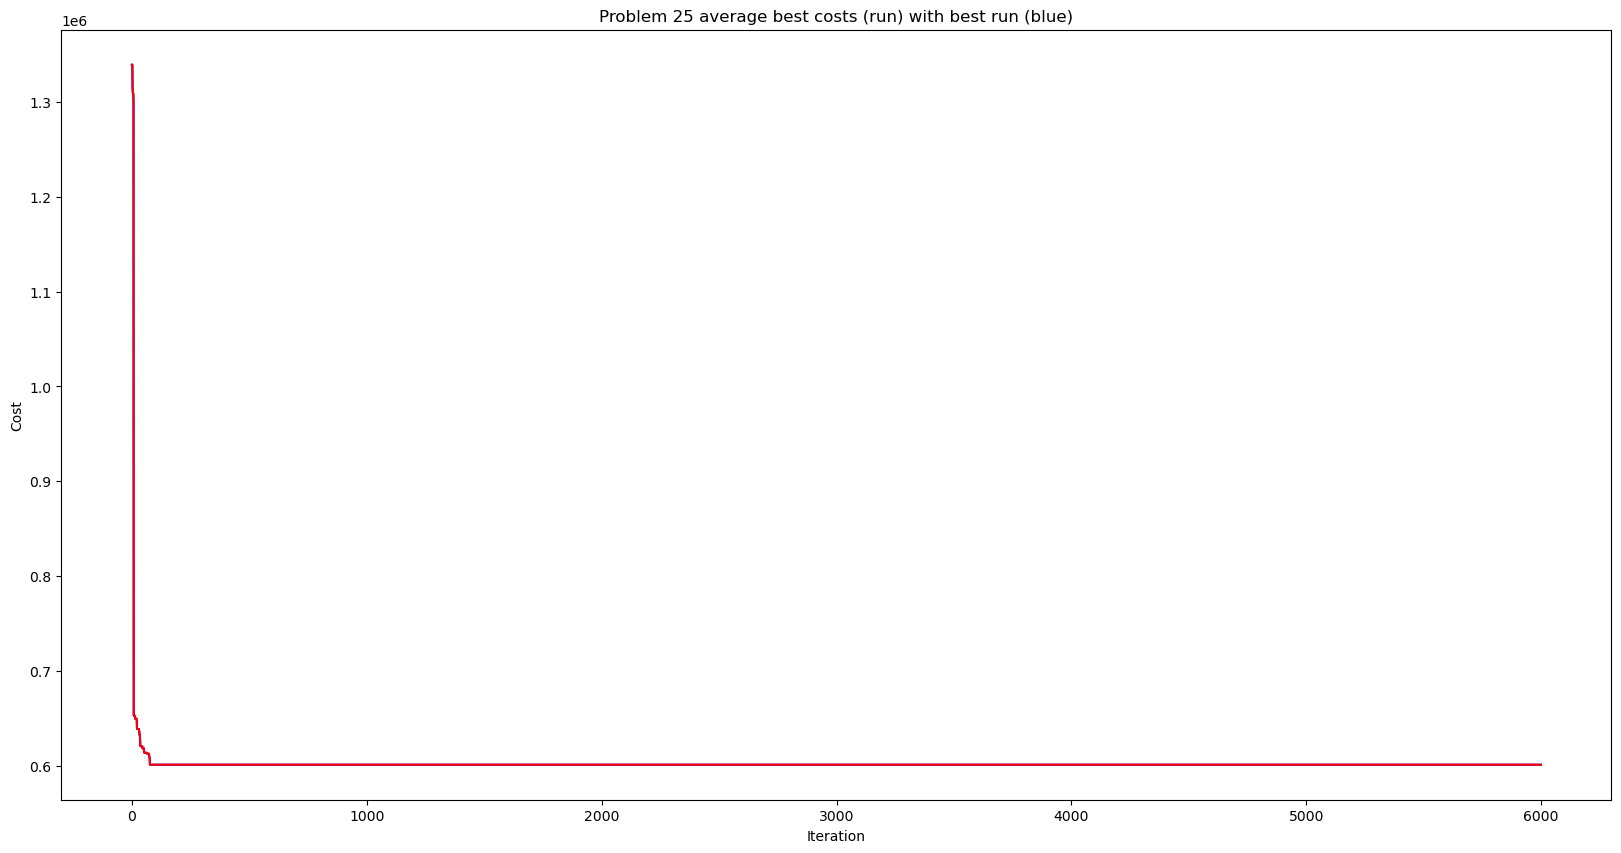



Problem 26
Average cost: 1459380.9650000003
Best cost: 1459380.9650000003
Final improvement: 44.0
Average time: 2078.6047871112823




Problem 27
Average cost: 1517514.17
Best cost: 1517514.17
Final improvement: 51.0
Average time: 2114.505768060684


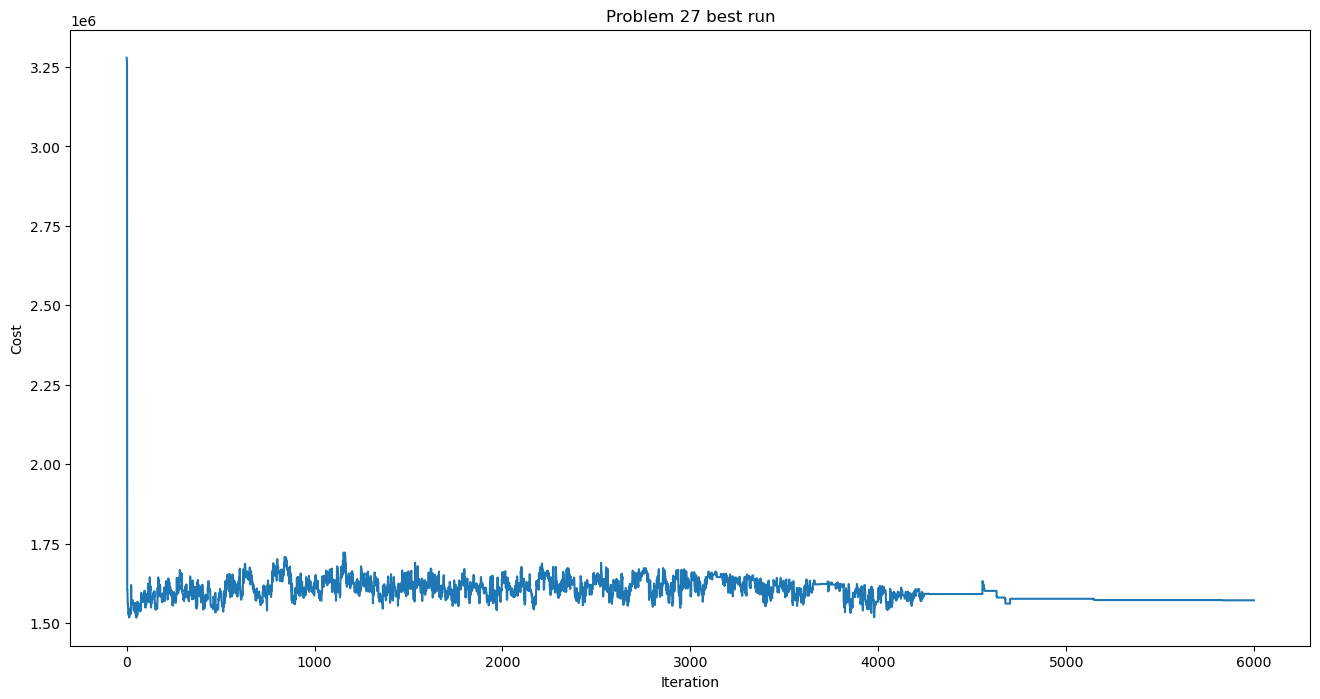



Problem 28
Average cost: 1491271.085
Best cost: 1491271.085
Final improvement: 2509.0
Average time: 2176.092545032501


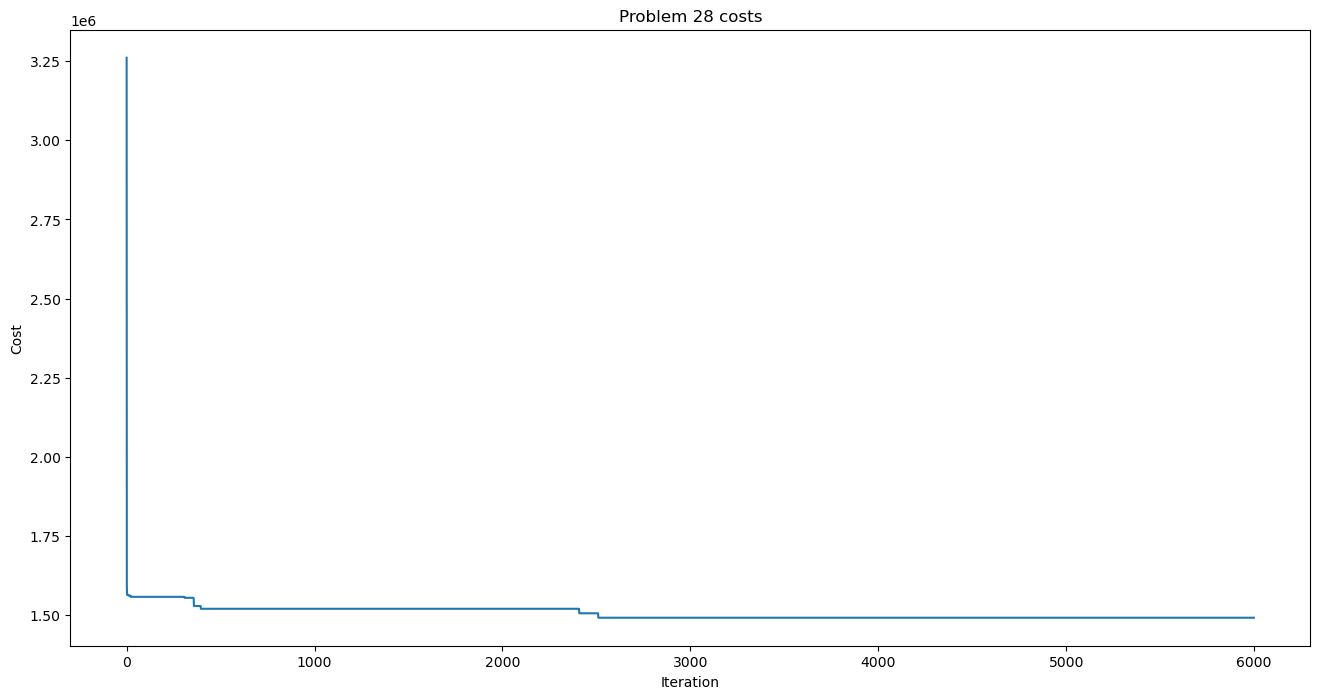

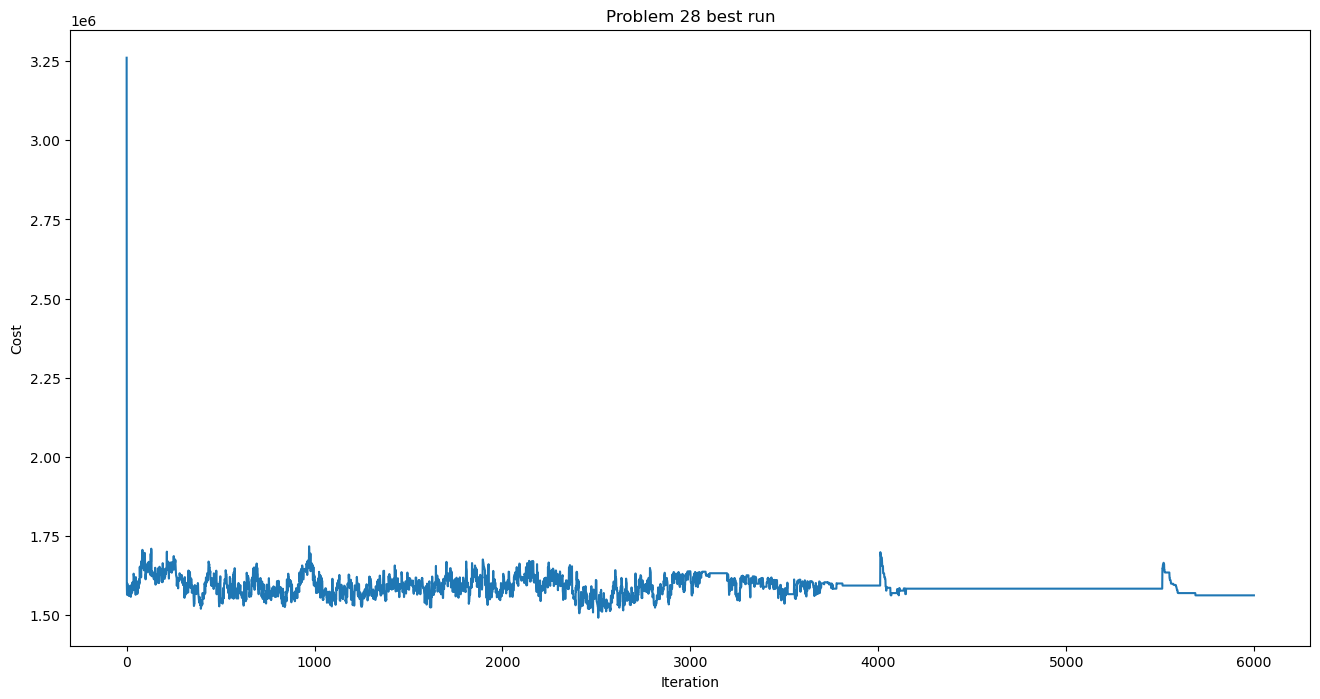

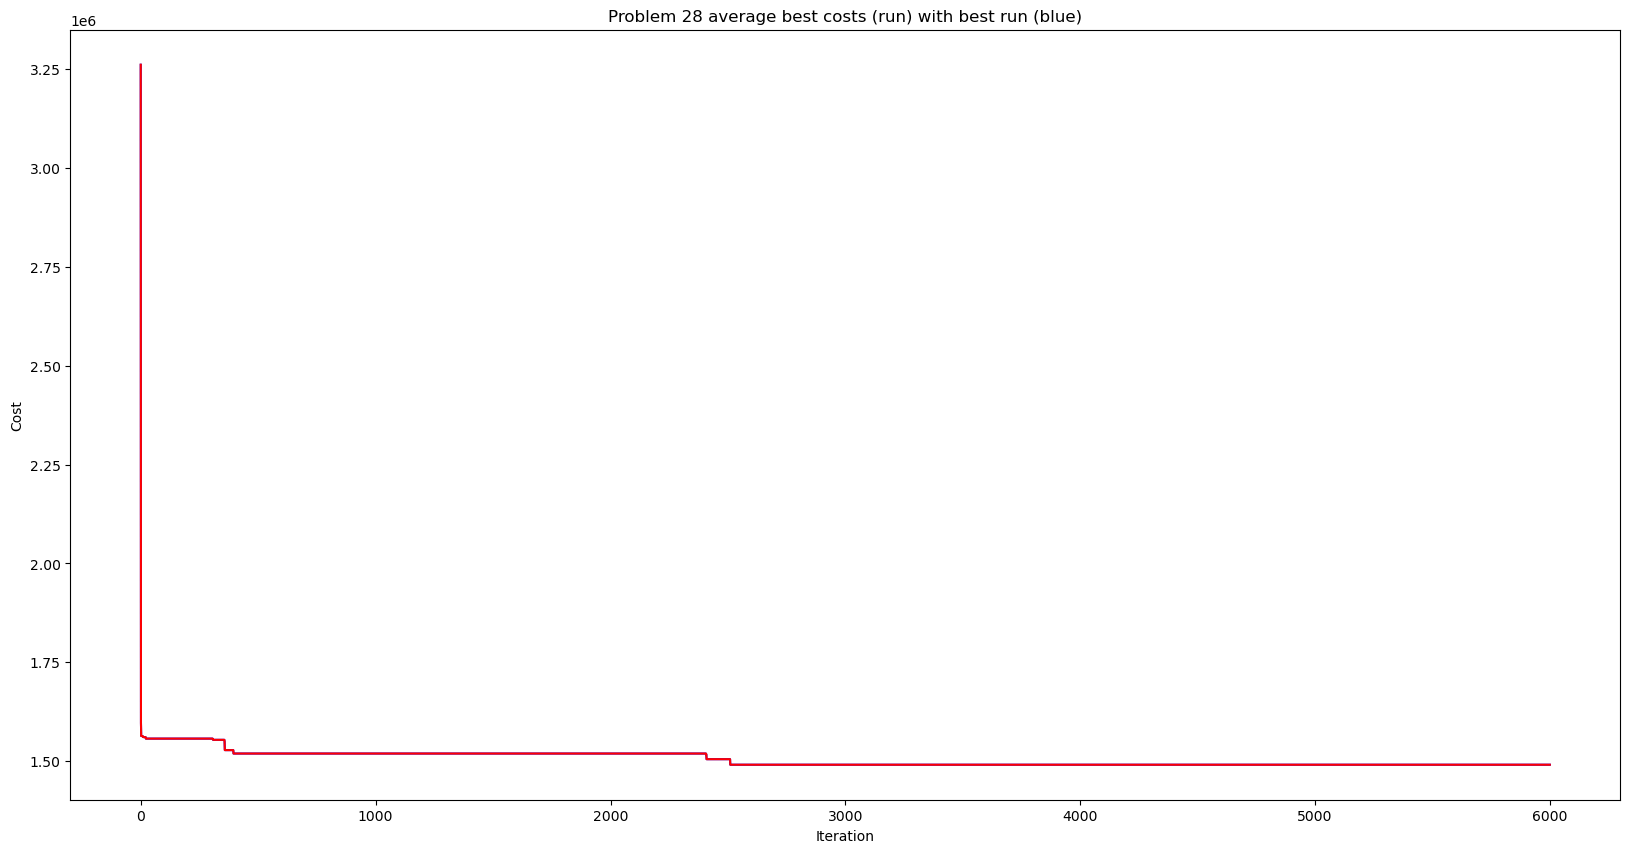



Problem 29
Average cost: 1482874.6950000003
Best cost: 1482874.6950000003
Final improvement: 1327.0
Average time: 2286.7190792560577


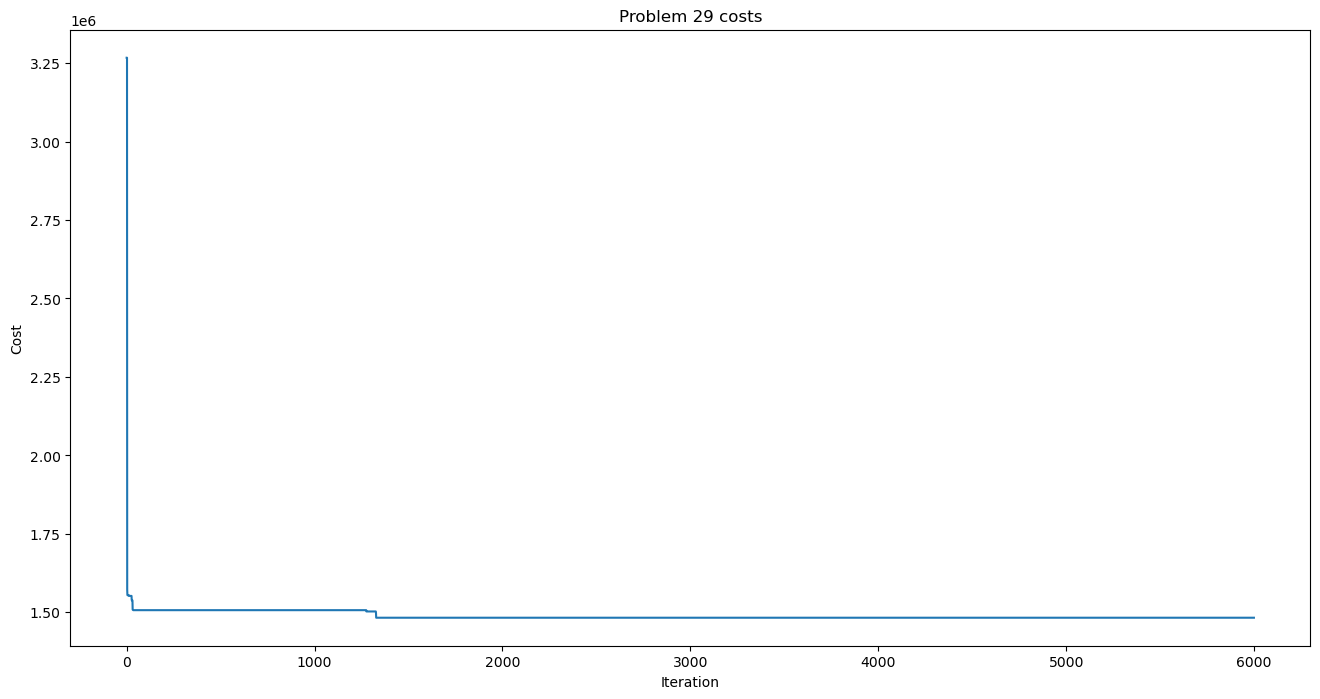

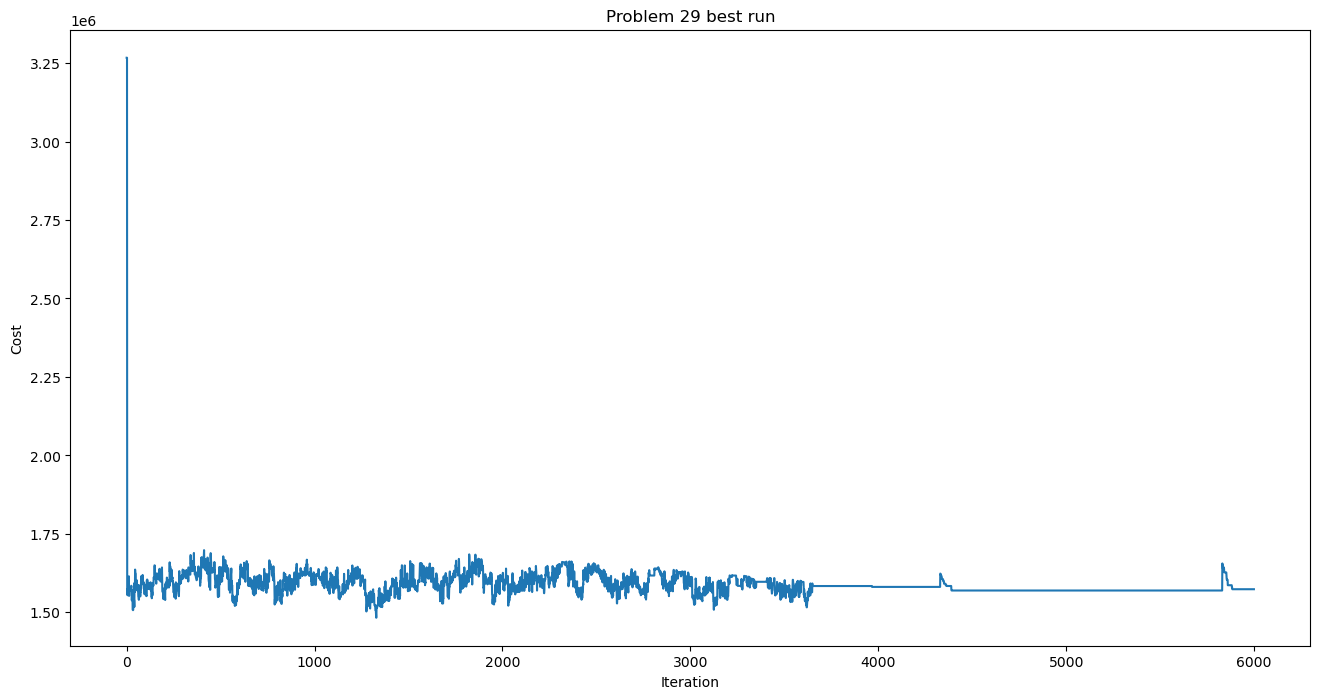

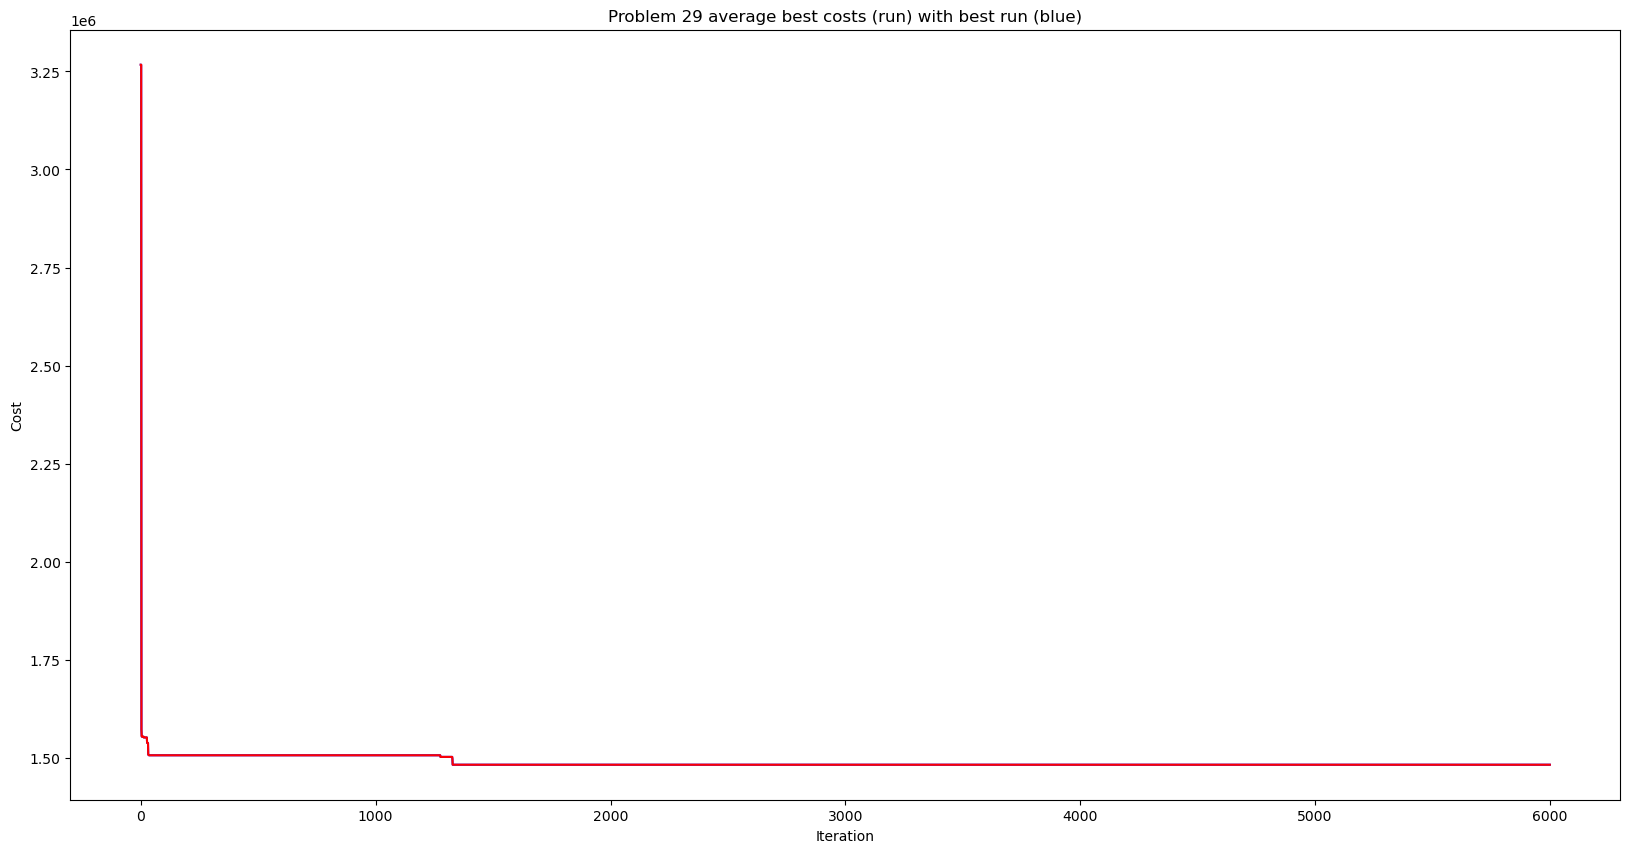



Problem 30
Average cost: 1408812.1500000004
Best cost: 1408812.1500000004
Final improvement: 268.0
Average time: 2233.75404214859


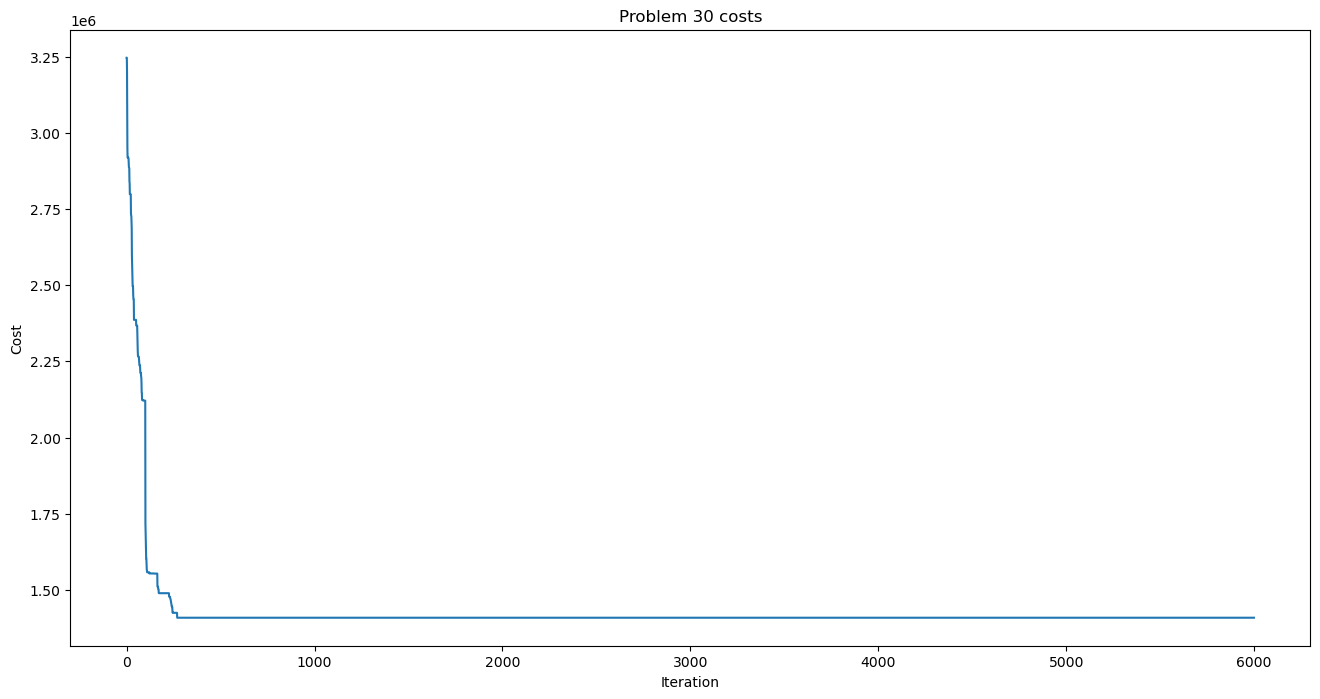

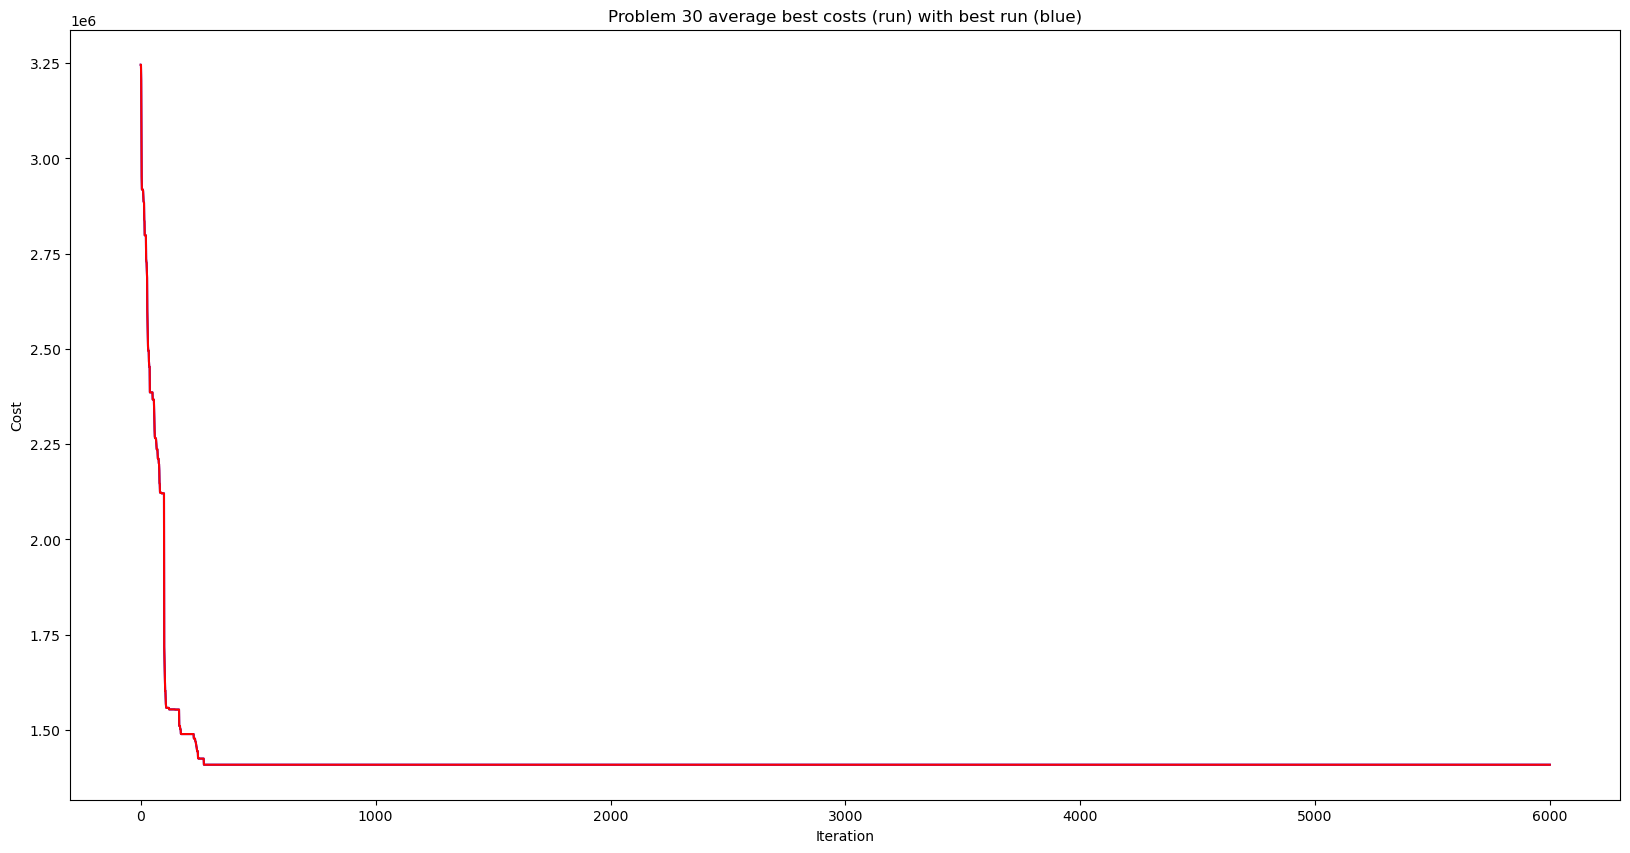

In [27]:
for key in keys:
    #results[i+1]=(best_solution,avg_cost,best_cost,best_run,best_run_best_costs,best_costs_lists,cost_lists,final_improve,time_per_run)
    print(f'Problem {key}')
    print(f'Average cost: {results[key][1]}')
    print(f'Best cost: {results[key][2]}')
    print(f'Final improvement: {results[key][7]}')
    print(f'Average time: {results[key][8]}')
    plot_costs(results[key][5],title=f'Problem {key} costs')
    plot_costs(results[key][3],title=f'Problem {key} best run')
    multiple_plots(results[key][4],results[key][5],title=f'Problem {key} average best costs (run) with best run (blue)')
    print('\n')

In [ ]:
def initial_costs(problems):
    i = 1
    costs = []
    for problem in problems:
        
        initial = initial_solution(problem,problem['N_trips'])
        cost = objective_function(initial,problem)
        costs.append(cost)
        print(f'Initial cost for problem {i} is {cost}')
        i+=1
        
    return costs

initial_costs(problems)

In [396]:
def calculate_improvement(problems, results):
    base_costs = initial_costs(problems)
    best_costs = [results[key][2] for key in results.keys()]
    improvements = []
    i=1
    for base_cost, best_cost in zip(base_costs, best_costs):
        improvement = ((base_cost - best_cost) / base_cost) * 100
        improvements.append(improvement)
        print(f"Improvement Problem {i}: {improvement:.2f}%")
        i+=1
    return improvements


In [399]:
[results[key][2] for key in results.keys()]

[64953.985,
 146294.05,
 189416.65499999997,
 293277.765,
 508575.71499999997,
 1406740.7950000006]

In [397]:
calculate_improvement(problems,results)

Initial Solution:           [(0, 0), (0, 0), (0, 0), (0, 0), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1)]
Initial cost for problem 1 is 167500
Initial Solution:           [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1), (21, 0), (21, 1), (22, 0), (22, 1), (23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1), (29, 0), (29, 1), (30, 0), (30, 1), (31, 0), (31, 1), (32, 0), (32, 1), (33, 0), (33, 1), (34, 0), (34, 1), (35, 0), (35, 1)]
Initial

[61.221501492537314,
 57.96147988505748,
 57.76663210702342,
 60.974349301397204,
 59.90731454473788,
 57.19638536436938]

In [4]:
def ExperimentI(problem,trip_range):
    
    charge_lists = []
    n_vessels = []
    best_costs = []
    
    
    operators = [random_remove_greedy_insert,largest_trip_remove_greedy_insert,similarity_removal_greedy_insert]
    
    for i in trip_range:
        print(f'Starting iteration with {i} Vessels')
        inital = initial_solution(problem,n_trips=i)
        _,processed_best,best_cost,_,_,_,_,_,_,_ = ALNS(inital,problem,operators)
        charging = processed_best[2]
        charging_amount = sum(len(sublist) for sublist in charging)
        best_costs.append(best_cost)
        charge_lists.append(charging_amount)
        n_vessels.append(i)
        
    return n_vessels,charge_lists,best_costs

In [46]:


# Create the scatterplot
plt.scatter(n_vessels, chargelist)


# Add labels and title
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Charging done by number of vessels')

xticks = np.arange(min(n_vessels), max(n_vessels)+1, step=1)  # change step value as needed
yticks = np.arange(min(chargelist), max(chargelist)+1, step=1)  # change step value as needed
plt.xticks(xticks)
plt.yticks(yticks)

coefficients = np.polyfit(n_vessels, chargelist, 1)
line = np.poly1d(coefficients)
plt.plot(n_vessels, line(n_vessels), 'r-')
# Create the equation string
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'

# Add the equation to the plot
plt.text(max(n_vessels)-3, line(max(n_vessels))*1.05, equation, fontsize=7,color = 'red', verticalalignment='top')
plt.plot(n_vessels, line(n_vessels), 'r-')

# Display the plot
plt.show()


In [45]:
# Create the scatterplot
plt.plot(n_vessels, best_costs)

# Add labels and title
plt.xlabel('Number of Vessels')
plt.ylabel('Best Objective Value')
plt.title('Best cost for number of vessels')

xticks = np.arange(min(n_vessels), max(n_vessels)+1, step=1)  # change step value as needed

plt.xticks(xticks)

coefficients = np.polyfit(n_vessels, best_costs, 1)

line = np.poly1d(coefficients)
# Create the equation string
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.0f}'

# Add the equation to the plot
plt.text(max(n_vessels)-5, line(max(n_vessels))*0.99, equation, fontsize=7,color = 'red', verticalalignment='top')
plt.plot(n_vessels, line(n_vessels), 'r-')

# Display the plot
plt.show()